# Machine Learning / Aprendizagem Automática 2024/2025

## Group 24:
* ### Daniel Ribeiro, nº 64476
* ### Manuel Gonçalves, nº 58555
* ### Pedro Costa, nº 54954

# AA Project  - Learning about Pet Adoption using PetFinder.my Dataset

## Project Goal and Dataset
For this project, our goal is to analyse a dataset called **`PetFinder_dataset.csv`** and see how far can we go in predicting and understanding PetFinder.my adoptions.

### About the Dataset:
The dataset to be analysed is **`PetFinder_dataset.csv`**, made avaliable together with this project description. This dataset, downloaded from [Kaggle](https://www.kaggle.com), contains selected and modified data from the following competition: [PetFinder.my Adoption Prediction](https://www.kaggle.com/c/petfinder-adoption-prediction/). 

PetFinder.my has been Malaysia’s leading animal welfare platform since 2008, with a database of more than 150,000 animals. PetFinder collaborates closely with animal lovers, media, corporations, and global organizations to improve animal welfare. Animal adoption rates are strongly correlated to the metadata associated with their online profiles, such as descriptive text and photo characteristics. As one example, PetFinder is currently experimenting with a simple AI tool called the Cuteness Meter, which ranks how cute a pet is based on qualities present in their photos. In this competition data scientists are supposed to develop machine learning approaches to predict the adoptability of pets - specifically, how quickly is a pet adopted? If successful, they will be adapted into AI tools that will guide shelters and rescuers around the world on improving their pet profiles' appeal, reducing animal suffering and euthanization.
**In this project, your team is supposed to use only tabular data (not Images or Image Metadata) and see how far you can go in predicting and understanding PetFinder.my adoptions. You should use both supervised and unsupervised learning to tackle 2 tasks:**

### Tasks:

For this project, we will use **supervised** and **unsupervised** learning to tackle 2 tasks:
1. **Task 1 (Supervised Learning) - Predicting Adoption and Adoption Speed**
2. **Task 2 (Unsupervised Learning) - Charactering Pets and their Adoption Speed**

The **`PetFinder_dataset.csv`** our machine learning algorithms should learn from has **14.993 instances** described by **24 data fields**. **The target in the original Kaggle challenge is `Adoption Speed`.**

### File Descriptions

* **PetFinder_dataset.csv** - Tabular/text data for machine learning.
* **breed_labels.csv** - Contains Type and BreedName for each BreedID. Type 1 is dog, 2 is cat.
* **color_labels.csv** - Contains ColorName for each ColorID.
* **state_labels.csv** - Contains StateName for each StateID.

### Data Fields

* **PetID** - Unique hash ID of pet profile
* **Type** - Type of animal (1 = Dog, 2 = Cat)
* **AdoptionSpeed - Categorical speed of adoption. Lower is faster.** This is the value to predict in the competition. See section below for more info.
* **Name** - Name of pet (Empty if not named)
* **Age** - Age of pet when listed, in months
* **Breed1** - Primary breed of pet (see `BreedLabels.csv` for details)
* **Breed2** - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
* **Gender** - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
* **Color1** - Color 1 of pet (see `ColorLabel.csv` for details)
* **Color2** - Color 2 of pet (see `ColorLabel.csv` for details)
* **Color3** - Color 3 of pet (see `ColorLabel.csv` for details)
* **MaturitySize** - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
* **FurLength** - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
* **Vaccinated** - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
* **Dewormed** - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
* **Sterilized** - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
* **Health** - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
* **Quantity** - Number of pets represented in profile
* **Fee** - Adoption fee (0 = Free)
* **State** - State location in Malaysia (Refer to StateLabels dictionary)
* **RescuerID** - Unique hash ID of rescuer
* **VideoAmt** - Total uploaded videos for this pet
* **PhotoAmt** - Total uploaded photos for this pet
* **Description** - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

### AdoptionSpeed

The value of `AdoptionSpeed` describes how quickly, if at all, a pet is adopted:
* 0 - Pet was adopted on the same day as it was listed. 
* 1 - Pet was adopted between 1 and 7 days (1st week) after being listed. 
* 2 - Pet was adopted between 8 and 30 days (1st month) after being listed. 
* 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
* 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).
 dataset that waited between 90 and 100 days).

## Task 0 (Know your Data) - Exploratory Data Analysis

## 0.1. Loading Data

First of all, let's import all the libraries that we are going to use. This way, we can divide our notebook into several blocks without repeated code and make it more organized

In [30]:
#Standard libraries
import pandas as pd
import numpy as np
import pydot

#Visualize plots
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Next thing, we load our data. We can use the function **"load_data"** from the practical classes, which will be usefull also to future changes:

In [9]:
def load_data(fname):
    """Load CSV file with any number of consecutive features, starting in column 0, where last column is tha class"""
    df = pd.read_csv(fname)
    nc = df.shape[1] # number of columns
    matrix = df.values # Convert dataframe to darray
    table_X = matrix [:, 0:nc-1] # get features 
    table_y = matrix [:, nc-1] # get class (last columns)           
    features = df.columns.values[0:nc-1] #get features names
    target = df.columns.values[nc-1] #get target name
    return df, table_X, table_y, features, target

Then, we assign the variables:

In [12]:
df, table_X, table_y, features, target_name = load_data("PetFinder_dataset.csv")

What we got is this:
* **df** - the complete dataframe;
* **table_X** - an array with lists containing the values of all the features;
* **table_y** - an array with the values of the classes;
* **features** - an array with the name of the features;
* **target_name** - a string with the target name;

Lets take a look of each one of this variables:

In [15]:
df

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,...,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,5,6,7,3,...,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4


In [17]:
table_X

array([[2, 'Nibble', 3, ...,
        "Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.",
        '86e1089a3', 1.0],
       [2, 'No Name Yet', 1, ...,
        'I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.',
        '6296e909a', 2.0],
       [1, 'Brisco', 1, ...,
        'Their pregnant mother was dumped by her irresponsible owner at the roadside near some shops in Subang Jaya. Gave birth to them at the roadside. They are all healthy and adorable puppies. Already dewormed, vaccinated and ready to go to a home. No tying or caging for long hours as guard dogs. However, it is acceptable to cage or tie for precaut

In [19]:
table_y

array([2, 0, 3, ..., 3, 4, 3], dtype=object)

In [21]:
features

array(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1',
       'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated',
       'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State',
       'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt'],
      dtype=object)

In [23]:
target_name

'AdoptionSpeed'

## 0.2. Understanding Data

For this part, we'll try to look more deeply into the data we got, so we can understand it, see the distribution of the values, errors, etc. so we can also plan how we're going to preprocess the data.

First, let's see what is the distribution of our target: the **Adoption Speed**:

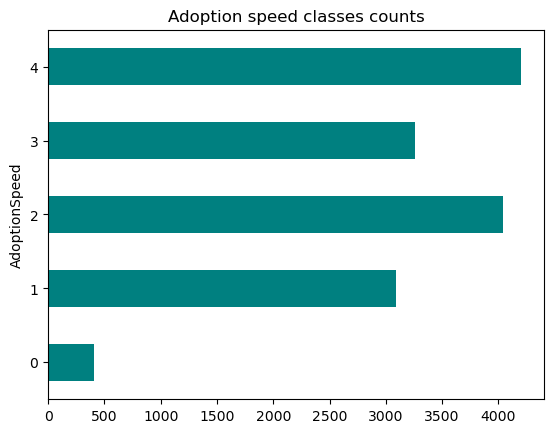

In [32]:
df['AdoptionSpeed'].value_counts().sort_index().plot(kind= 'barh', color='teal');
plt.title('Adoption speed classes counts');

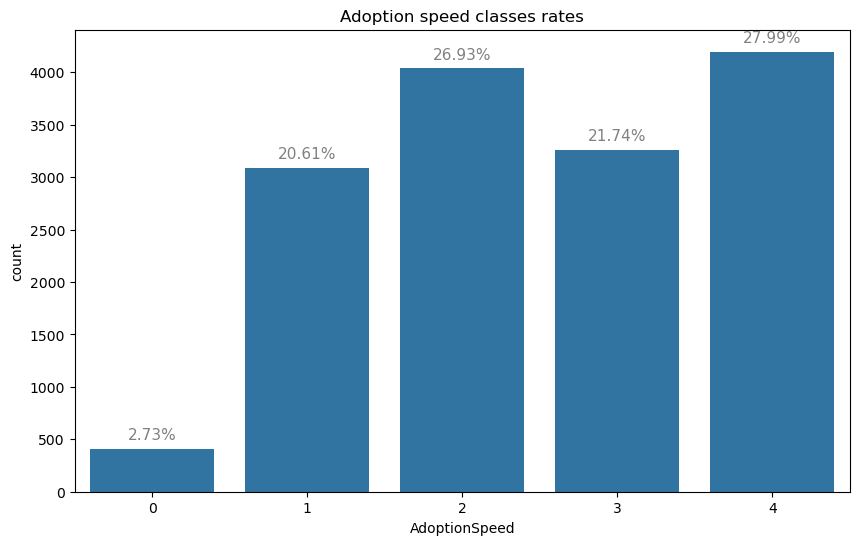

In [34]:
plt.figure(figsize=(10, 6));
g = sns.countplot(x='AdoptionSpeed', data=df)
plt.title('Adoption speed classes rates');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

We can see that just a few part of our animals are adopted day one. Most of them are adopted between 8 days and 30 days **(AdoptionSpeed = 2)**, but the majority of the animals are not adopted past 100 days **(AdoptionSpeed = 4)**. Even if we combine the any of the Adoption Speeds 1 or 3 with the 0, it still be below the majority of animals. Even so, despite the ones on the 0 label, we can say that we got a 

But we can see even more our data. Lets see about their **Type** (`Dog` or `Cat`) ratio:

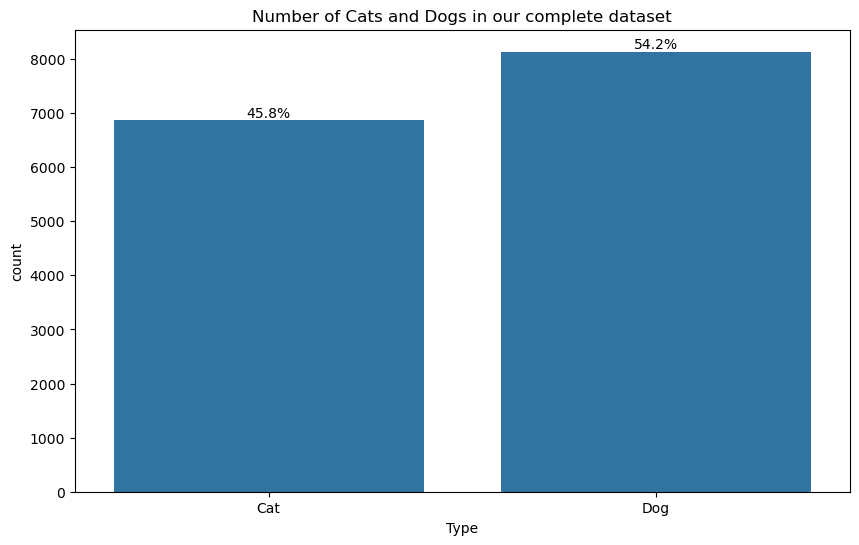

In [38]:
type_column = df['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')
plt.figure(figsize=(10, 6))
g = sns.countplot(x=type_column)
total = len(type_column)
for patch in g.patches:
    height = patch.get_height()
    percentage = f'{(height / total * 100):.1f}%'
    g.annotate(percentage, 
               (patch.get_x() + patch.get_width() / 2, height), 
               ha='center', va='bottom', fontsize=10)

plt.title('Number of Cats and Dogs in our complete dataset')
ax = g.axes


Here, we can see that on this dataset, we got almost the exact number of Cats and Dogs in it, having Dogs being the majority, but for very little. 

But the animal's `Type` is categorical - we got 1 if the animal is a `Dog` and 0 if it is a `Cat`. So we only got two values assigned in this columns.
Lets check the next column, right after the `Type`, which is the `Name` of the animal. Here, the features are all Text meaning that the data represents the names of the animals as free-form strings, and since names are not inherently numerical, they cannot be directly used as inputs for machine learning models.
Lets see its distribution:

In [40]:
name_counts = df['Name'].value_counts()
most_used_name = name_counts.idxmax()
most_used_name_count = name_counts.max()

print(f"Most used name: {most_used_name} -> {most_used_name_count} vezes")

Most used name: Baby -> 66 vezes


In [42]:
repeated_names = name_counts[name_counts > 1]
print("\nRepetivie names and its frequencies:")
print(repeated_names)


Repetivie names and its frequencies:
Name
Baby        66
Lucky       64
No Name     54
Brownie     54
Mimi        52
            ..
Fei Chai     2
Estee        2
Disney       2
B4           2
Debby        2
Name: count, Length: 1251, dtype: int64


We can see that there are animals with repetitive names. 

Other columns with a huge range of values is the feature `Age`, but this time, its numerical features. Lets check its distribution:

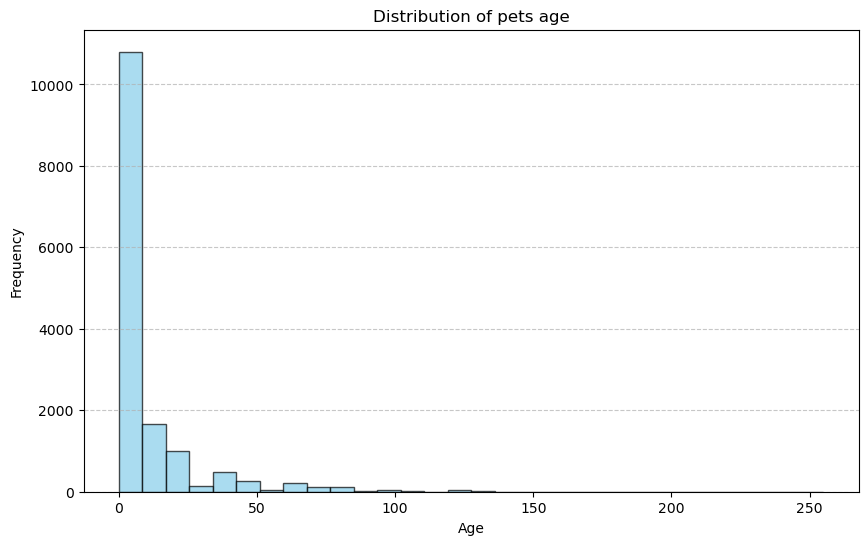

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Distribution of pets age')
df['Age'].plot(kind='hist', bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [47]:
df['Age'].value_counts().head(10)

Age
2     3503
1     2304
3     1966
4     1109
12     967
24     651
5      595
6      558
36     417
8      309
Name: count, dtype: int64

Unlike the **AdoptionSpeed** or the **Type**, we can see a more visible pattern here: the vast majority of animals here have an age lower than 10 years old. So we're dealing with young pets here. Still, there are some animals with an age above 50, which technically is impossible, because we are only dealing with Dogs and Cats, and Dogs and Cat usually have an average life expectancy of 10-13 years old and 13-20 years old, respectively, but as we said initially, this dataset can contain errors, that we are going to see when performing the models.

Lets see other numerical features, like their **Quantity, Fee, Videos and Photos**:

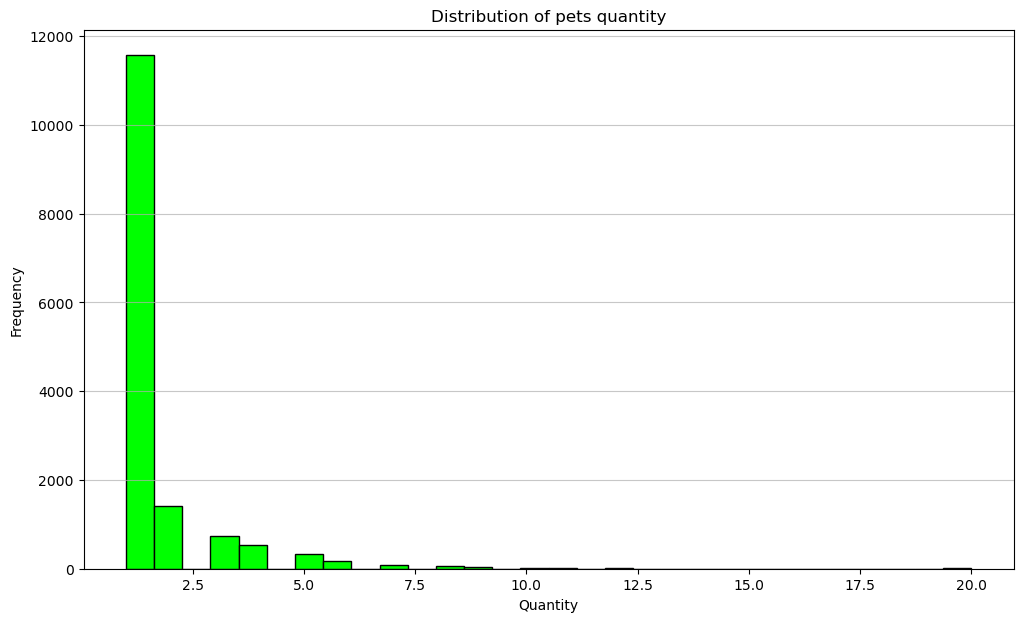

In [51]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.title('Distribution of pets quantity')
df['Quantity'].plot(kind='hist', bins=30, alpha=1.0, color='lime', edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

In [53]:
df['Quantity'].value_counts().head(10)

Quantity
1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
Name: count, dtype: int64

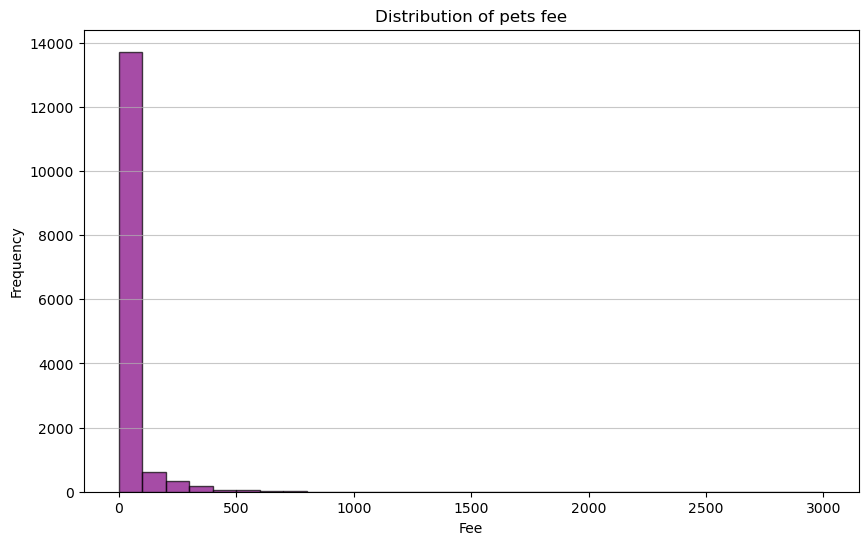

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Distribution of pets fee')
df['Fee'].plot(kind='hist', bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Fee')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

In [57]:
df['Fee'].value_counts().head(10)

Fee
0      12663
50       468
100      408
200      219
150      162
20       136
300      120
30       103
250       92
1         82
Name: count, dtype: int64

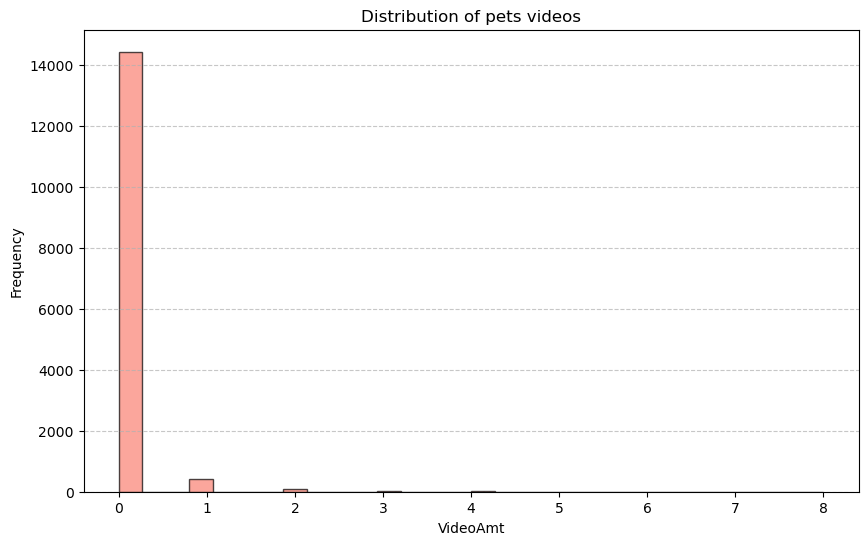

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Distribution of pets videos')
df['VideoAmt'].plot(kind='hist', bins=30, alpha=0.7, color='salmon', edgecolor='black')
plt.xlabel('VideoAmt')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [61]:
df['VideoAmt'].value_counts().head(10)

VideoAmt
0    14419
1      417
2       92
3       36
4       15
5        7
6        4
8        2
7        1
Name: count, dtype: int64

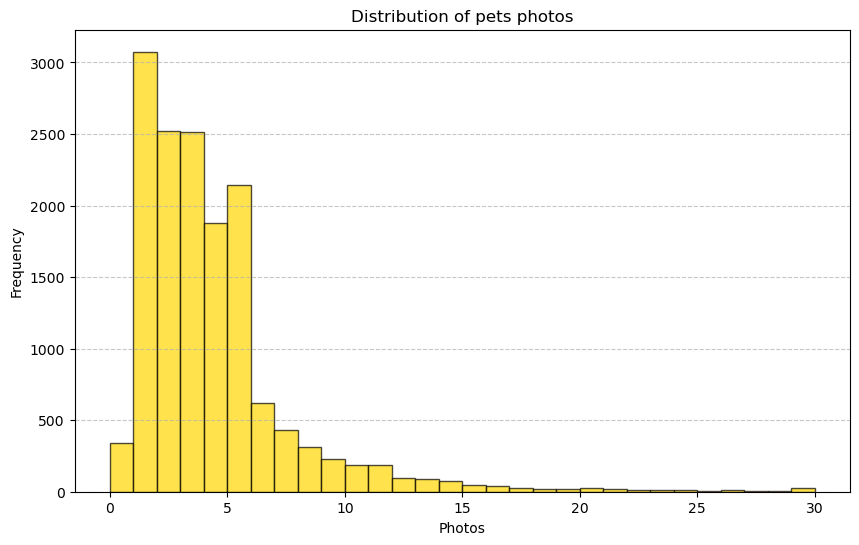

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Distribution of pets photos')
df['PhotoAmt'].plot(kind='hist', bins=30, alpha=0.7, color='gold', edgecolor='black')
plt.xlabel('Photos')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [65]:
df['PhotoAmt'].value_counts().head(10)

PhotoAmt
1.0    3075
2.0    2518
3.0    2511
5.0    2147
4.0    1881
6.0     621
7.0     432
0.0     341
8.0     314
9.0     231
Name: count, dtype: int64

## 0.3. Preprocessing Data

We could see the other features and their distributions, but most important is to see how the models work with this dataset. So, we must prepare our data by cleaning and transforming it into a suitable format for machine learning. This involves handling missing values, encoding categorical variables and eliminate irrelevant features.

For instance, if we want to know how long it takes for an animal to be adopted, some of the features are irrelevant for the task, like the `Description`, the `RescuerID`, `PetID` or the `State` it got caught.

To do that, lets edit the `load_data` function and adapt it by merging some of the features and eliminate the irrelevant ones:

In [67]:
def load_and_process_data(fname):
    df = pd.read_csv(fname)
    #Colocar a coluna Name como categórico: 1 se tiver nome, 0 se não tem nome
    df['Name'] = df['Name'].notnull().astype(int)
    #Colocar a coluna Breed como categórico: 1 se tiver for puro, 2 se for misto
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    #Colocar a coluna Color como categórica: 1 se tiver apenas 1 cor, 2 se tiver 2 cores, 3 se tiver 3 cores
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)

    #Alterar os nomes das colunas
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    #Eliminar as colunas que não interessam
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target


In this function, we made the following changes:
* We transformed the `Name` feature in **Categorical** - **1** if the animal has a Name, **0** otherwise;
* The `Breed` feature was always transformed in **Categorial** - **1** if the animal is pure, **2** if it is mixed;
* We made the same changes in the `Color` feature, turning it into **Categorial** - **1** if the animal has only 1 color, **2** if it has 2 colors and **3** it it has 3 colors;
* Then, we changed the names of the Columns `Color1` to `Color` and `Breed1` to `Breed`;
* Finally, we eliminate the irrelevant features: `RescuerID`, `PetID`, `Description`, `State`, `Breed2`, `Color2` and `Color3`.

`RescuerID`, `PetID` and `Description` is irrelevant because: `RescuerID` refers to the ID of the person who rescued the animal, which doesn't provide useful information for predicting the adoption speed or the outcome in this case. The specific identity of the rescuer does not influence the model's ability to make predictions. `PetID` is unique for each animal, which means it doesn't carry any predictive value. Each pet having a different ID implies that it won't contribute any meaningful patterns for the model.
`Description` is a text field, and while it could theoretically contain useful information, it would require complex text processing to be useful.
`State` contains ID references that link to a separate dataframe with the actual state names. While the state of rescue may be relevant in some contexts, the ID itself is a categorical variable that does not directly provide useful information for the model.
The `Breed2` and `Color2` and `Color3` columns were merged into the now `Breed` and `Color` columns, respectively.

Lets now assign variables to our function:

In [71]:
new_df, new_table_X, new_table_y, updated_features, updated_target_name = load_and_process_data("PetFinder_dataset.csv")

Lets check if it is all correct:

In [74]:
new_df

,Type,Name,Age,Breed,Gender,Color,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,1,3,1,1,2,1,1,2,2,2,1,1,100,0,1.0,2
1,2,1,1,1,1,2,2,2,3,3,3,1,1,0,0,2.0,0
2,1,1,1,1,1,2,2,2,1,1,2,1,1,0,0,7.0,3
3,1,1,4,1,2,2,2,1,1,1,2,1,1,150,0,8.0,2
4,1,1,1,1,1,1,2,1,2,2,2,1,1,0,0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,0,2,1,3,1,2,2,2,2,2,1,4,0,0,3.0,2
14989,2,1,60,2,3,3,2,2,1,1,1,1,2,0,0,3.0,4
14990,2,1,2,2,3,3,3,2,2,1,3,1,5,30,0,5.0,3
14991,2,1,9,1,2,2,1,1,1,1,1,1,1,0,0,3.0,4


In [76]:
new_table_X

array([[  2.,   1.,   3., ..., 100.,   0.,   1.],
       [  2.,   1.,   1., ...,   0.,   0.,   2.],
       [  1.,   1.,   1., ...,   0.,   0.,   7.],
       ...,
       [  2.,   1.,   2., ...,  30.,   0.,   5.],
       [  2.,   1.,   9., ...,   0.,   0.,   3.],
       [  1.,   1.,   1., ...,   0.,   0.,   1.]])

In [78]:
new_table_y

array([2., 0., 3., ..., 3., 4., 3.])

In [80]:
updated_features

array(['Type', 'Name', 'Age', 'Breed', 'Gender', 'Color', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
       'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt'], dtype=object)

In [82]:
updated_target_name

'AdoptionSpeed'

We can also save our new dataframe into a csv file:

(NOTE: everytime we save a new df into a csv file, we will save it in an appropriate folder named **csv files**)

In [85]:
new_df.to_csv("csv files/processed_PetFinder_dataset.csv", index=False)

We are now ready to go for the tasks

## Task 1 (Supervised Learning) - Predicting Adoption and Adoption Speed

In this task we will target 3 classification tasks:
1. **Predicting  Adoption (binary classification)**: create a new target from AdoptionSpeed that is 1 if AdoptionSpeed <> 4 and 0 otherwise.
2. **Predicting AdoptionSpeed (multiclass classification)**: in this task you should use the original target `AdoptionSpeed`, whose values are in the set {0, 1, 2, 3 , 4} (5 classes). This is a very difficult problem. You might also want to consider 3 classes (for instance {0-1, 2-3, 4}, or other sets that make sense). 
3. **Train specialized models for cats and dogs**: train with cat/dog instances and check whether the classification performance changes/improves when Predicting Adoption and Predicting AdoptionSpeed. 


For that tasks will will also:

* Choose **5 classifiers** from **at least 3 of the following categories**: Tree models, Probabilistic models, Distance-based models and Linear models. 
* Use **cross-validation** to evaluate the results. 
* Present and discuss the results for different evaluation measures, present confusion matrices.
* Describe the parameters used for each classifier and how their choice impacted or not the results.
* Choose the best classifier and fundament our choice.

## 1.1. Specific Data Preprocessing for Classification

### 1.1.1. Predicting Adoption (binary classification)

For this first part, we will modify our dataset to simplify the predicitve task and focus on a **binary classification** problem. Initially, the target variable `AdoptionSpeed` categorizes pets into five groups (0 to 4) based on time taken for adoption, with 0 being adopted on day one, and 4 meaning the pet was not adopted after 90 days.

So, we transform the target `AdoptionSpeed` into a **binary target varibale** named **Adopted**, which captures whether a pet was adopted (= 1) or not adopted (= 0), that is:
* Adopted = 1 is the original `AdoptionSpeed` is not equal to 4, meaning the pet was adopted at any point, regardless of number of days;
* Adopted = 0 if the original `AdoptionSpeed` is equal to 4, indicating the pet was not adopted ;

This change simplifies the task by focusing on a clear distinction between adoption and non_adoption, aligning with real-world scenarios where understanding adoption likelihood os oftem more critical than the exact timing of adoption

For that purpose, lets create a new function for the binary classification:

In [88]:
def load_and_process_data_binary(fname):
    df = pd.read_csv(fname)
    df['Name'] = df['Name'].notnull().astype(int)
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])

    df['Age'] = df['Age'].apply(lambda x: 'Baby' if x <= 3 else
                                           'Junior' if x > 3 and x <= 12 else
                                           'Adult' if x > 12 and x <= 60 else
                                           'Senior')

    df['Quantity'] = df['Quantity'].apply(lambda x: 'Singular' if x == 1 else
                                                      'Few' if x in [2, 3] else
                                                      'Many')

    df['Fee'] = df['Fee'].apply(lambda x: 'Free' if x == 0 else
                                         'Low' if x > 0 and x <= 50 else
                                         'Moderate' if x > 50 and x <= 200 else
                                         'High')

    df['VideoAmt'] = df['VideoAmt'].apply(lambda x: 'None' if x == 0 else
                                                     'Few' if x in [1, 2] else
                                                     'Many')

    df['PhotoAmt'] = df['PhotoAmt'].apply(lambda x: 'Few' if x <= 2 else
                                                     'Some' if x > 2 and x <= 5 else
                                                     'Many')
    
    df['Adopted'] = (df['AdoptionSpeed'] != 4).astype(int)
    df = df.drop(columns=['AdoptionSpeed'])
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

We also made some changes on the numerical features `Age`, `Quantity`, `Fee`, `VideoAmt` and `PhotoAmt`, so that this features become also **Categorical**:

* For the `Age` feature, we grouped the values into four categories: **Baby** (age ≤ 3), **Junior** (age > 3 and ≤ 12), **Adult** (age > 12 and ≤ 60), and **Senior** (age > 60). This transformation helps to classify the animals based on their age group, making it easier to analyze adoption patterns related to age, since on the original set the dominant values are pets with ages of 1, 2 and 3 months.

* The `Quantity` feature was categorized into three groups: **Singular** (quantity = 1) since there are a lot of pets with quantity = 1 on the original dataset, **Few** (quantity = 2 or 3), and **Many** (quantity ≥ 4). This categorization provides a better understanding of how the number of animals in a listing can influence adoption speed.

* For the `Fee` feature, we created four categories: **Free** (fee = 0) which groups the majority of the animals, **Low** (fee = 1–50), **Moderate** (fee = 51–200), and **High** (fee > 200). By converting this into a categorical variable, we can more effectively explore how different price ranges affect the likelihood of adoption.

* The `VideoAmt` feature was split into three groups: **None** (no videos) with also the majority of animals, **Few** (1–2 videos), and **Many** (≥ 3 videos). This transformation allows us to analyze the impact of multimedia content on adoption rates.

* Finally, the `PhotoAmt` feature was categorized into three groups as well: **Few** (0–2 photos), **Some** (3–5 photos), and **Many** (more than 5 photos). This helps us understand how the number of photos in a listing correlates with adoption speed, since this feature has a good distribution of values.

These categorical transformations make the features more interpretable for machine learning models, allowing us to better assess how each attribute influences the likelihood of adoption, especially when considering a binary classification task (Adoption = 0 or 1).

Let's now assign the variables to this new function, and also **save it as a .csv file**:

In [90]:
df_bin, table_X_bin, table_y_bin, features_bin, target_name_bin = load_and_process_data_binary("PetFinder_dataset.csv")

In [92]:
df_bin.to_csv("processed_PetFinder_dataset_bin.csv", index=False)

Lets take a look at the new dataframe:

In [95]:
df_bin

,Type,Name,Age,Breed,Gender,Color,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,Adopted
0,2,1,Baby,1,1,2,1,1,2,2,2,1,Singular,Moderate,None,Few,1
1,2,1,Baby,1,1,2,2,2,3,3,3,1,Singular,Free,None,Few,1
2,1,1,Baby,1,1,2,2,2,1,1,2,1,Singular,Free,None,Many,1
3,1,1,Junior,1,2,2,2,1,1,1,2,1,Singular,Moderate,None,Many,1
4,1,1,Baby,1,1,1,2,1,2,2,2,1,Singular,Free,None,Some,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,0,Baby,1,3,1,2,2,2,2,2,1,Many,Free,None,Some,1
14989,2,1,Adult,2,3,3,2,2,1,1,1,1,Few,Free,None,Some,0
14990,2,1,Baby,2,3,3,3,2,2,1,3,1,Many,Low,None,Some,1
14991,2,1,Junior,1,2,2,1,1,1,1,1,1,Singular,Free,None,Some,0


We can see that the last column is now only with a **binary classification** and the new changes are implemented as well. We now have a **full categorical dataset**.

In [97]:
table_X_bin

array([[2, 1, 'Baby', ..., 'Moderate', 'None', 'Few'],
       [2, 1, 'Baby', ..., 'Free', 'None', 'Few'],
       [1, 1, 'Baby', ..., 'Free', 'None', 'Many'],
       ...,
       [2, 1, 'Baby', ..., 'Low', 'None', 'Some'],
       [2, 1, 'Junior', ..., 'Free', 'None', 'Some'],
       [1, 1, 'Baby', ..., 'Free', 'None', 'Few']], dtype=object)

In [99]:
table_y_bin

array([1, 1, 1, ..., 1, 0, 1], dtype=object)

In [101]:
features_bin

array(['Type', 'Name', 'Age', 'Breed', 'Gender', 'Color', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
       'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt'], dtype=object)

In [103]:
target_name_bin

'Adopted'

### 1.1.2. Predicting AdoptionSpeed (multiclass classification)

For this task, we will use the original target `AdoptionSpeed`, whose values are in the set {0, 1, 2, 3, 4} (5 classes), but now, to simplify the analysis and focus on meaningful distinctions, we will group some of these values into broader categories. Specifically, we will have this grouping:

* Values 0 and 1 (indicating adoption within the first week) are combined into a single class;
* Values 2 and 3 (adoption within the first three months) are another class;
* and Value 4 (indicating no adoption after 100 days) remains as a separate class.
  
This results in **three classes** that represent basically **early adoption**, **moderate adoption**, and **no adoption**. The new structure aims to capture key trends in adoption behavior while reducing the complexity of the target variable, making it more interpretable and practical for specific predictive tasks.

For that purpose, lets take the previous function we created for the binary classification, and use it, since it is already implemented with grouped features, even for the numerical ones:

In [105]:
def load_and_process_data_multiclass(fname):
    df = pd.read_csv(fname)
    df['Name'] = df['Name'].notnull().astype(int)
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])

    df['Age'] = df['Age'].apply(lambda x: 'Baby' if x <= 3 else
                                           'Junior' if x > 3 and x <= 12 else
                                           'Adult' if x > 12 and x <= 60 else
                                           'Senior')

    df['Quantity'] = df['Quantity'].apply(lambda x: 'Singular' if x == 1 else
                                                      'Few' if x in [2, 3] else
                                                      'Many')

    df['Fee'] = df['Fee'].apply(lambda x: 'Free' if x == 0 else
                                         'Low' if x > 0 and x <= 50 else
                                         'Moderate' if x > 50 and x <= 200 else
                                         'High')

    df['VideoAmt'] = df['VideoAmt'].apply(lambda x: 'None' if x == 0 else
                                                     'Few' if x in [1, 2] else
                                                     'Many')

    df['PhotoAmt'] = df['PhotoAmt'].apply(lambda x: 'Few' if x <= 2 else
                                                     'Some' if x > 2 and x <= 5 else
                                                     'Many')
    
    # Multiclass classification target: original AdoptionSpeed
    df['AdoptionSpeed'] = df['AdoptionSpeed'].replace({0: 0, 1: 0, 2: 1, 3: 1, 4: 2})
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In this function, we grouped the **5 original classes in just 3 classes**:
* 0 -> corresponds to **early adoption**, that is, the Pet was adopted in less than 1 week (0 and 1 in the original dataset);
* 1 -> corresponds to **moderate adoption**, that is, the Pet was adopted between 8 days and 3 months (90 days) (2 and 3 in the original dataset);
* 2 -> corresponds to **no adoption**, that is, the Pet was not adopted after 100 days (4 in the original dataset);

In [108]:
df_mc, table_X_mc, table_y_mc, features_mc, target_name_mc = load_and_process_data_multiclass("PetFinder_dataset.csv")

In [110]:
df_mc

,Type,Name,Age,Breed,Gender,Color,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,1,Baby,1,1,2,1,1,2,2,2,1,Singular,Moderate,None,Few,1
1,2,1,Baby,1,1,2,2,2,3,3,3,1,Singular,Free,None,Few,0
2,1,1,Baby,1,1,2,2,2,1,1,2,1,Singular,Free,None,Many,1
3,1,1,Junior,1,2,2,2,1,1,1,2,1,Singular,Moderate,None,Many,1
4,1,1,Baby,1,1,1,2,1,2,2,2,1,Singular,Free,None,Some,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,0,Baby,1,3,1,2,2,2,2,2,1,Many,Free,None,Some,1
14989,2,1,Adult,2,3,3,2,2,1,1,1,1,Few,Free,None,Some,2
14990,2,1,Baby,2,3,3,3,2,2,1,3,1,Many,Low,None,Some,1
14991,2,1,Junior,1,2,2,1,1,1,1,1,1,Singular,Free,None,Some,2


In [112]:
df_mc.to_csv("csv files/processed_PetFinder_dataset_multiclass.csv", index=False)

### 1.1.3. Train specialized models for cats and dogs

For this task, we will train with **cat/dog instances** and check whether the classification performance changes/improves when Predicting **Adoption** and Predicting **AdoptionSpeed**.

So, we will have first to divide our function in 2 functions:
* One that groups only the data associated to Dogs (Type = 1);
* Another that groups only the data associated to Cats (Type = 2).

And then divide those 2 functions in another 2 functions. So we have a total of **4 functions**:
* A binary classification for Dogs;
* A binary classification for Cats;
* A multiclass classification for Dogs;
* A multiclass classification for Cats.

#### 1.1.3.1. Train specialized models for dogs

Lets create the functions first for **Dogs** instances:

In [114]:
def load_and_process_data_binary_dogs(fname):
    df = pd.read_csv(fname)
    
    df = df[df['Type'] == 1]
    
    df['Name'] = df['Name'].notnull().astype(int)
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])

    df['Age'] = df['Age'].apply(lambda x: 'Baby' if x <= 3 else
                                           'Junior' if x > 3 and x <= 12 else
                                           'Adult' if x > 12 and x <= 60 else
                                           'Senior')

    df['Quantity'] = df['Quantity'].apply(lambda x: 'Singular' if x == 1 else
                                                      'Few' if x in [2, 3] else
                                                      'Many')

    df['Fee'] = df['Fee'].apply(lambda x: 'Free' if x == 0 else
                                         'Low' if x > 0 and x <= 50 else
                                         'Moderate' if x > 50 and x <= 200 else
                                         'High')

    df['VideoAmt'] = df['VideoAmt'].apply(lambda x: 'None' if x == 0 else
                                                     'Few' if x in [1, 2] else
                                                     'Many')

    df['PhotoAmt'] = df['PhotoAmt'].apply(lambda x: 'Few' if x <= 2 else
                                                     'Some' if x > 2 and x <= 5 else
                                                     'Many')
    
    df['Adopted'] = (df['AdoptionSpeed'] != 4).astype(int)
    df = df.drop(columns=['AdoptionSpeed'])
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In [116]:
df_dogs_bin, table_X_dogs_bin, table_y_dogs_bin, features_dogs_bin, target_name_dogs_bin = load_and_process_data_binary_dogs("PetFinder_dataset.csv")

In [118]:
df_dogs_bin

,Type,Name,Age,Breed,Gender,Color,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,Adopted
2,1,1,Baby,1,1,2,2,2,1,1,2,1,Singular,Free,None,Many,1
3,1,1,Junior,1,2,2,2,1,1,1,2,1,Singular,Moderate,None,Many,1
4,1,1,Baby,1,1,1,2,1,2,2,2,1,Singular,Free,None,Some,1
7,1,1,Baby,1,2,3,2,1,2,2,2,1,Many,Free,None,Many,1
10,1,1,Baby,1,1,3,2,1,2,1,2,1,Singular,Free,None,Many,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14983,1,1,Baby,1,1,3,2,2,1,1,2,1,Singular,Free,None,Many,1
14984,1,0,Adult,1,2,2,2,2,3,3,3,1,Singular,Free,None,Few,0
14985,1,1,Adult,2,1,3,2,2,3,3,2,1,Singular,Free,None,Few,0
14987,1,1,Junior,1,2,2,1,3,1,1,2,1,Singular,Free,None,Few,1


In [120]:
df_dogs_bin.to_csv("processed_PetFinder_dataset_dogs_bin.csv", index=False)

In [122]:
def load_and_process_data_multiclass_dogs(fname):
    df = pd.read_csv(fname)
    
    df = df[df['Type'] == 1]

    df['Name'] = df['Name'].notnull().astype(int)
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])

    df['Age'] = df['Age'].apply(lambda x: 'Baby' if x <= 3 else
                                           'Junior' if x > 3 and x <= 12 else
                                           'Adult' if x > 12 and x <= 60 else
                                           'Senior')

    df['Quantity'] = df['Quantity'].apply(lambda x: 'Singular' if x == 1 else
                                                      'Few' if x in [2, 3] else
                                                      'Many')

    df['Fee'] = df['Fee'].apply(lambda x: 'Free' if x == 0 else
                                         'Low' if x > 0 and x <= 50 else
                                         'Moderate' if x > 50 and x <= 200 else
                                         'High')

    df['VideoAmt'] = df['VideoAmt'].apply(lambda x: 'None' if x == 0 else
                                                     'Few' if x in [1, 2] else
                                                     'Many')

    df['PhotoAmt'] = df['PhotoAmt'].apply(lambda x: 'Few' if x <= 2 else
                                                     'Some' if x > 2 and x <= 5 else
                                                     'Many')
    
    # Multiclass classification target: original AdoptionSpeed
    df['AdoptionSpeed'] = df['AdoptionSpeed'].replace({0: 0, 1: 0, 2: 1, 3: 1, 4: 2})
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In [124]:
df_dogs_mc, table_X_dogs_mc, table_y_dogs_mc, features_dogs_mc, target_name_dogs_mc = load_and_process_data_multiclass_dogs("PetFinder_dataset.csv")

In [126]:
df_dogs_mc

,Type,Name,Age,Breed,Gender,Color,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
2,1,1,Baby,1,1,2,2,2,1,1,2,1,Singular,Free,None,Many,1
3,1,1,Junior,1,2,2,2,1,1,1,2,1,Singular,Moderate,None,Many,1
4,1,1,Baby,1,1,1,2,1,2,2,2,1,Singular,Free,None,Some,1
7,1,1,Baby,1,2,3,2,1,2,2,2,1,Many,Free,None,Many,1
10,1,1,Baby,1,1,3,2,1,2,1,2,1,Singular,Free,None,Many,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14983,1,1,Baby,1,1,3,2,2,1,1,2,1,Singular,Free,None,Many,1
14984,1,0,Adult,1,2,2,2,2,3,3,3,1,Singular,Free,None,Few,2
14985,1,1,Adult,2,1,3,2,2,3,3,2,1,Singular,Free,None,Few,2
14987,1,1,Junior,1,2,2,1,3,1,1,2,1,Singular,Free,None,Few,0


In [128]:
df_dogs_mc.to_csv("csv files/processed_PetFinder_dataset_dogs_mc.csv", index=False)

#### 1.1.3.2. Train specialized models for cats

Now, lets create the functions for **Cats** instances:

In [130]:
def load_and_process_data_binary_cats(fname):
    df = pd.read_csv(fname)
    
    df = df[df['Type'] == 2]
    
    df['Name'] = df['Name'].notnull().astype(int)
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])

    df['Age'] = df['Age'].apply(lambda x: 'Baby' if x <= 3 else
                                           'Junior' if x > 3 and x <= 12 else
                                           'Adult' if x > 12 and x <= 60 else
                                           'Senior')

    df['Quantity'] = df['Quantity'].apply(lambda x: 'Singular' if x == 1 else
                                                      'Few' if x in [2, 3] else
                                                      'Many')

    df['Fee'] = df['Fee'].apply(lambda x: 'Free' if x == 0 else
                                         'Low' if x > 0 and x <= 50 else
                                         'Moderate' if x > 50 and x <= 200 else
                                         'High')

    df['VideoAmt'] = df['VideoAmt'].apply(lambda x: 'None' if x == 0 else
                                                     'Few' if x in [1, 2] else
                                                     'Many')

    df['PhotoAmt'] = df['PhotoAmt'].apply(lambda x: 'Few' if x <= 2 else
                                                     'Some' if x > 2 and x <= 5 else
                                                     'Many')
    
    df['Adopted'] = (df['AdoptionSpeed'] != 4).astype(int)
    df = df.drop(columns=['AdoptionSpeed'])
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In [132]:
df_cats_bin, table_X_cats_bin, table_y_cats_bin, features_cats_bin, target_name_cats_bin = load_and_process_data_binary_cats("PetFinder_dataset.csv")

In [134]:
df_cats_bin

,Type,Name,Age,Breed,Gender,Color,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,Adopted
0,2,1,Baby,1,1,2,1,1,2,2,2,1,Singular,Moderate,None,Few,1
1,2,1,Baby,1,1,2,2,2,3,3,3,1,Singular,Free,None,Few,1
5,2,0,Baby,1,2,2,2,1,2,2,2,1,Singular,Free,None,Few,1
6,2,1,Junior,2,1,1,2,3,2,2,3,1,Singular,High,None,Some,1
8,2,0,Baby,1,2,1,2,2,2,2,2,1,Singular,Free,None,Many,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14986,2,1,Baby,1,2,3,2,1,2,1,2,1,Singular,Free,None,Few,1
14988,2,0,Baby,1,3,1,2,2,2,2,2,1,Many,Free,None,Some,1
14989,2,1,Adult,2,3,3,2,2,1,1,1,1,Few,Free,None,Some,0
14990,2,1,Baby,2,3,3,3,2,2,1,3,1,Many,Low,None,Some,1


In [138]:
df_cats_bin.to_csv("csv files/processed_PetFinder_dataset_cats_bin.csv", index=False)

In [140]:
def load_and_process_data_multiclass_cats(fname):
    df = pd.read_csv(fname)
    
    df = df[df['Type'] == 2]

    df['Name'] = df['Name'].notnull().astype(int)
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])

    df['Age'] = df['Age'].apply(lambda x: 'Baby' if x <= 3 else
                                           'Junior' if x > 3 and x <= 12 else
                                           'Adult' if x > 12 and x <= 60 else
                                           'Senior')

    df['Quantity'] = df['Quantity'].apply(lambda x: 'Singular' if x == 1 else
                                                      'Few' if x in [2, 3] else
                                                      'Many')

    df['Fee'] = df['Fee'].apply(lambda x: 'Free' if x == 0 else
                                         'Low' if x > 0 and x <= 50 else
                                         'Moderate' if x > 50 and x <= 200 else
                                         'High')

    df['VideoAmt'] = df['VideoAmt'].apply(lambda x: 'None' if x == 0 else
                                                     'Few' if x in [1, 2] else
                                                     'Many')

    df['PhotoAmt'] = df['PhotoAmt'].apply(lambda x: 'Few' if x <= 2 else
                                                     'Some' if x > 2 and x <= 5 else
                                                     'Many')
    
    # Multiclass classification target: original AdoptionSpeed
    df['AdoptionSpeed'] = df['AdoptionSpeed'].replace({0: 0, 1: 0, 2: 1, 3: 1, 4: 2})
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In [142]:
df_cats_mc, table_X_cats_mc, table_y_cats_mc, features_cats_mc, target_name_cats_mc = load_and_process_data_multiclass_cats("PetFinder_dataset.csv")

In [144]:
df_cats_mc

,Type,Name,Age,Breed,Gender,Color,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,1,Baby,1,1,2,1,1,2,2,2,1,Singular,Moderate,None,Few,1
1,2,1,Baby,1,1,2,2,2,3,3,3,1,Singular,Free,None,Few,0
5,2,0,Baby,1,2,2,2,1,2,2,2,1,Singular,Free,None,Few,1
6,2,1,Junior,2,1,1,2,3,2,2,3,1,Singular,High,None,Some,0
8,2,0,Baby,1,2,1,2,2,2,2,2,1,Singular,Free,None,Many,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14986,2,1,Baby,1,2,3,2,1,2,1,2,1,Singular,Free,None,Few,1
14988,2,0,Baby,1,3,1,2,2,2,2,2,1,Many,Free,None,Some,1
14989,2,1,Adult,2,3,3,2,2,1,1,1,1,Few,Free,None,Some,2
14990,2,1,Baby,2,3,3,3,2,2,1,3,1,Many,Low,None,Some,1


In [146]:
df_cats_mc.to_csv("csv files/processed_PetFinder_dataset_cats_mc.csv", index=False)

## 1.2. Learning and Evaluating Classifiers

### 1.2.1. Tree Models

For the first classifier, we will choose the **Tree Models**.

We will learn the decision tree classifier using the class **DecisionTreeClassifier**. The parameter criterion defines the function to measure the quality of a split. Supported criteria are “gini” for the **Gini** impurity and “entropy” for the information gain. **Gini** is the default.

Since we have categorical features that are "strings", the classifier will crash, but we also want to know the full tree

So, for first analysis, lets look at the full tree, using the **Orange** tool.

#### 1.2.1.1. Tree Models with Binary Classification

<img src="imagens/orange_configuration_class_bin.png" alt="orange_configuration_class_bin"/>

In Orange, the algorithm used is **C4.5** using Information Gain as Attribute Selection Measure/Impurity Measure.

C4.5 produces decision trees that are not forced to be binary, that is, if there is an attribute with more than 2 values and there is a split in that attibute, then this split will have as many branches as values observed in data for that attribut
e.
Lets look at the tree with only **3 Levels**:

<img src="imagens/DecisionTree_BinaryClassification_3levels.png" alt="DecisionTree_BinaryClassification_3levels"/>

We can see with this tree that the `Age` feature as the root, which is a reasonable choice given that an animal's age often influences its likelihood of adoption. At the second level, each `Age` value directs to a different feature: `MaturitySize` for adult animals, `Sterilized` for babies, and `FurLength` for young and old animals. This approach reflects an attempt to capture distinct dynamics depending on the age of the animal. At the third level, the tree evaluates new features, such as `Dewormed`, `Quantity` or `Fee`, depending on the previous combinations.

The tree structure is also logical and reflects an attempt to use relevant information for adoption. Furthermore, the three-level threshold promotes computational efficiency and facilitates model interpretation.

Despite the apparent logic in the construction, all terminal nodes in the tree have the same value of `Adopted = 1`. This implies that the tree is completely **biased** to predict that all animals will be adopted, regardless of resource combinations, which is not good.

We can increase the value of levels! Lets try with **4 levels**:

<img src="imagens/DecisionTree_BinaryClassification_4levels.png" alt="DecisionTree_BinaryClassification_4levels"/>

With the increase to **4 levels** in the decision tree, greater granularity is observed in data segmentation, allowing more detailed patterns to be identified. It is now possible to find leaves that include animals that **have not been adopted**, which represents a significant improvement over the previous version of the tree, which exclusively provided for adoptions. For example, if an animal is classified as **Adult**, is **Medium size at maturity** and has a **short Fur Length**, almost **55% of animals with these characteristics will not be adopted**. This is a relevant pattern, as it highlights a specific profile of animals that are less likely to be adopted.

Another interesting example appears for animals classified as **Seniors**, with **long Fur Length** and that have **many videos** associated with their profile. In this case, it is observed that only **one animal** in the data set presents all these characteristics, and it **was not adopted**. This finding, although based on a very small sample, may indicate that characteristics such as advanced age, combined with other factors, may make adoption difficult, even if efforts have been made to promote the animal, such as uploading many videos.

These examples show that increasing to four levels not only adds complexity to the tree, but also allows to capture more specific patterns, better differentiating between adopted and non-adopted animals.

Increasing the value of levels in the Tree for **5 levels** will make the tree too big to be analysed here, since there are almost 15000 data there

<img src="imagens/DecisionTree_BinaryClassification_5levels.png" alt="DecisionTree_BinaryClassification_5levels"/>

Lets take a look at the **Test and Score** and **Confusion Matrix** tool. For the **Test and Score** we chose 75% for train (25% will be used for test)and then we check the **confusion matrix**:

<img src="imagens/orange_testscore_confusionmatrix_class_bin.png" alt="orange_testscore_confusionmatrix_class_bin"/>

To evaluate the performance of the decision tree, a division of the dataset into **75% for training and 25% for testing** was used, resulting in **7,498 instances in the test set**. The model presented an **accuracy of 66%**, which indicates that it correctly classifies around two-thirds of the instances. While this result is reasonable for an initial model, it also suggests that there is room for improvement, especially considering the importance of correctly predicting cases in which animals are not adopted.

For the **Confusion matrix**, the matrix is ​​structured with columns representing **Predicted** values ​​and rows **Actual** values. These results highlight some limitations of the model. The significant number of **false positives (1,235)** and **false negatives (1,310)** suggests that the model is not perfectly capturing the differences between adopted and non-adopted animals. This may reflect factors such as the intrinsic complexity of the data or the choice of features used in building the tree.

So, to conclude, although the model achieved moderate accuracy, analysis of the confusion matrix reveals the need for refinement. Strategies such as adjusting class weights, exploring additional features could help improve the model's ability to differentiate between adopted and non-adopted animals, reducing classification errors.

#### 1.2.1.2. Tree Models with Multiclass Classification

We will have the same procedure for the Multiclass Classification, since we already have the csv file saved:

<img src="imagens/orange_configuration_multiclass.png" alt="orange_configuration_multiclass"/>

With **3 Levels**:

<img src="imagens/DecisionTree_MultiClass_3levels.png" alt="DecisionTree_MultiClass_3levels"/>

We can see that few has changed from the binary classification to multiclass classification.

`Age` feature still is the root of the tree, and on the second level we see that `MaturitySize`, `Sterilized` and `FurLength` are still the decisors, but we can notice the change that if a Pet which Age is categorized as a Junior, then the next node will be `Sterilized` instead of FurLength, which was on the Tree with the Binary classification.

At the second level, age-based division explores dynamics specific to different age groups. For **Age = Adult**, the feature `MaturitySize` is used, indicating that adult size has a great impact on the probability of adoption. For **Age = Baby** and **Age = Junior**, the feature `Sterilized` reflects the concern about health and the costs associated with sterilization. Finally, for **Age = Senior**, the choice of `FurLength` as the main attribute highlights the influence of factors such as maintenance and care associated with the fur.

At the final level, greater detail is observed to capture nuances of each age group. In the case of adults, combinations of `MaturitySize` with features such as `Dewormed`, `FurLength`, `Sterilized` and `Quantity` offer a broad view of characteristics that can influence the adoption decision. For the babies, the `Vaccinated`, `PhotoAmt`, and `FurLength` variables reflect concerns for preventive health and number of photos. For junior animals, the combination of `Sterilized` with `MaturitySize` and `FurLength` highlights a logic similar to that of puppies, but adapted to the transition to adulthood. Finally, for seniors, the interaction between `FurLength` and features such as `PhotoAmt`, `Dewormed` and `Fee` highlights practical and financial aspects often considered when adopting older animals.

But, like the binary tree analyzed previously, we can see some **bias** in this tree with only 3 Levels, since the terminal nodes are only with Pets which `AdoptionSpeed` is **1 or 2**, meaning that all those animals are not adopted in 1 week, but take longer time to be adopted. However, we can see that this is a normal behaviour, since we already saw that the animals that are in this class (original Adopted Speed of 0 and 1) represent just 23% of the animals of the dataset

Lets try to increase the range to **4 Levels**:

<img src="imagens/DecisionTree_MultiClass_4levels.png" alt="DecisionTree_MultiClass_4levels.png"/>

With 4 Levels of the tree, we can see again a more nuanced and detailed structure that captures additional complexities in the dataset. This added level introduces new features and thresholds that help further differentiate pets within the broader categories established in the previous levels.

For instance, we can now see animals whose `AdoptedSpeed` is, on the multiclass label, **0**, and we got a leave that groups 100% of the animals with class 0: if a animal has Age = Junior, has been spayed (Sterilized = 1) and is Extra Large (MaturitySize = 4) than it is Adopted in less than a week. 

Of course these examples show, again, that increasing the number of levels not only adds complexity to the tree, but also allows us to capture more specific patterns in adopted and non-adopted animals.

Even though not capable to see it clearly, lets put it also the tree with **5 Levels**:

<img src="imagens/DecisionTree_MultiClass_5levels.png" alt="DecisionTree_MultiClass_5levels.png"/>

Just like the Binary Trees, lets take a look at the **Test and Score** and **Confusion Matrix** tool. For the **Test and Score** we chose 75% for train (25% will be used for test) and then we check the **confusion matrix**:

<img src="imagens/orange_testscore_confusionmatrix_multiclass.png" alt="orange_testscore_confusionmatrix_multiclass.png"/>

The confusion matrix reveals that the model faces difficulties in distinguishing classes, especially between adjacent ones. In **Adoption Speed = 0** (rapid adoption), only 579 instances were correctly specific, while 843 and 328 were incorrectly assigned to classes 1 and 2, respectively.

In **Adoption Speed = 1**, the majority in the dataset, presents 2,043 correct classifications, but a significant number of errors, with 921 instances attributed to class 0 and 684 to class 2. In **Adoption Speed = 2**, which represents slower adoptions, had 749 correct classifications, but confusion frequent with adoption speeds of 0 (429) and 1 (922).

An overall score of **45%** reflects that the model is not better capturing differences between multi classes, possibly due to data complexity or decision tree limitation.

In comparison to the binary classification, the 45% accuracy in multiclass classification is lower than the 66% for the binary model, as expected due to the greater complexity of the problem. In both cases, there is difficulty in capturing differences between groups, with many false positives and false negatives. However, while the binary model focuses on distinguishing between adoptees and non-adopters, the multiclass model attempts to capture nuances in the timing of adoption, which requires additional adjustments such as ensemble techniques or exploration of more discriminating features.

#### 1.2.1.3. Tree Models with Cats and Dogs instances

##### Binary Classification

Lets now try with Dogs and Cats instances, making the same procedure as we did in the Binary classification.

Lets look first at the **Dogs with Binary Classification, using 3 Levels**:

<img src="imagens/DecisionTree_BinaryClassification_3levels_Dogs.png" alt="DecisionTree_BinaryClassification_3levels_Dogs"/>

Then, **Dogs with Binary Classification, using 4 Levels**:

<img src="imagens/DecisionTree_BinaryClassification_4levels_Dogs.png" alt="DecisionTree_BinaryClassification_4levels_Dogs"/>

Finally, **Dogs with Binary Classification, using 5 Levels**:

<img src="imagens/DecisionTree_BinaryClassification_5levels_Dogs.png" alt="DecisionTree_BinaryClassification_5levels_Dogs"/>

Now, lets take a look at the **Cats with Binary Classification, using first 3 Levels**:

<img src="imagens/DecisionTree_BinaryClassification_3levels_Cats.png" alt="DecisionTree_BinaryClassification_3levels_Cats.png"/>

Then, we take a look at the **Cats with Binary Classification, using 4 Levels**:

<img src="imagens/DecisionTree_BinaryClassification_4levels_Cats.png" alt="DecisionTree_BinaryClassification_4levels_Cats.png"/>

And last, at the **Cats with Binary Classification, using 5 Levels**:

<img src="imagens/DecisionTree_BinaryClassification_5levels_Cats.png" alt="DecisionTree_BinaryClassification_5levels_Cats"/>

Lets now **evaluate the Binary Classifition Decision Trees, with Dogs and Cats**:

<img src="imagens/orange_testscore_confusionmatrix_class_bin_dogs.png" alt="orange_testscore_confusionmatrix_class_bin_dogs.png"/>

<img src="imagens/orange_testscore_confusionmatrix_class_bin_cats.png" alt="orange_testscore_confusionmatrix_class_bin_cats.png"/>

Decision Tree results for dogs and cats in binary classification, with also a division of the dataset into **75% for training and 25% for testing**, show an accuracy of **66.7% and 66.9%**, respectively, indicating that about two-thirds of the instances were classified correctly. While these values are reasonable for an initial model, they highlight limitations in the ability to differentiate between adoption and non-adoption cases.

The dogs' confusion matrix reveals **547 true negatives** (no adopted) and **2,146 true positives** (adopted), but also a high number of false positives and false negatives, 661 and 712, respectively. This means that the model has difficulty in properly separating the classes, with significant errors in both the classification of non-adopted and adopted animals. The false negatives ratio suggests that many non-adopted animals are being predicted to be adopted, which may be concerning for understanding real behaviors in the context of the problem.

For cats, the confusion matrix shows **330 true negatives** (no adopted) and **1966 true positives**, but also a high number of false positives (562) and false negatives (574). These results indicate a similar pattern to that of dogs, with the model's inability to accurately distinguish between the two classes. The slightly better performance on cats may reflect differences in the characteristics of the dataset or the distribution of the data, but the errors are still significant.

Compared to the full dataset, where the analysis also revealed difficulties in distinguishing between classes with many false posivites and false negatives, the results for individual dogs and cats are consistent, but do not show significant improvements when isolating species. This suggests that the separation by species does not solve the main challenges of the model, such as the possible lack of discriminative features or the intrinsic complexity of the problem.

##### Multiclass Classification

Now we look at the MultiClass Classification, with also the same amount of levels.

First, the **Dogs with MultiClass classification with 3 Levels**:

<img src="imagens/DecisionTree_MultiClassClassification_3levels_Dogs.png" alt="DecisionTree_MultiClassClassification_3levels_Dogs.png"/>

**Dogs with MultiClass classification with 4 Levels**:

<img src="imagens/DecisionTree_MultiClassClassification_4levels_Dogs.png" alt="DecisionTree_MultiClassClassification_4levels_Dogs.png"/>

**Dogs with MultiClass classification with 5 Levels**:

<img src="imagens/DecisionTree_MultiClassClassification_5levels_Dogs.png" alt="DecisionTree_MultiClassClassification_5levels_Dogs.png"/>

Now, we switch to the **Cats, with MultiClass classification with 3 Levels**:

<img src="imagens/DecisionTree_MultiClassClassification_3levels_Cats.png" alt="DecisionTree_MultiClassClassification_3levels_Cats.png"/>

**Cats with MultiClass classification with 4 Levels**:

<img src="imagens/DecisionTree_MultiClassClassification_4levels_Cats.png" alt="DecisionTree_MultiClassClassification_4levels_Cats.png"/>

**Cats with MultiClass classification with 5 Levels**:

<img src="imagens/DecisionTree_MultiClassClassification_5levels_Cats.png" alt="DecisionTree_MultiClassClassification_5levels_Cats.png"/>

Lets now **evaluate this models, with Dogs and Cats instances and MultiClass Classification**:

<img src="imagens/orange_testscore_confusionmatrix_class_mc_dogs.png" alt="orange_testscore_confusionmatrix_class_mc_dogs.png"/>

<img src="imagens/orange_testscore_confusionmatrix_class_mc_cats.png" alt="orange_testscore_confusionmatrix_class_mc_cats.png"/>

Multiclass classification results for dogs and cats using Decision Trees show an accuracy of **46.4% and 41.6%**, respectively. These values highlight significant difficulties for the model in distinguishing classes, especially in more complex scenarios such as adoption timing.

For dogs, the confusion matrix reveals **218 correct classifications for class 0** (early adoption), while 431 and 153 were incorrectly assigned to classes 1 and 2, respectively. In class 1 (moderate adoption), the most represented in the dataset, **1202 examples were correctly identified**, but 410 and 444 were wrongly assigned to classes 0 and 2. Class 2 (late adoption) had **466 correct classifications**, while 223 were confused with class 0 and 519 with class 1. These results indicate that the model has difficulty clearly separating classes, with particularly pronounced confusion between adjacent classes.

In cats, the confusion matrix presents **342 correct classifications for class 0**, but with 467 and 139 instances incorrectly assigned to classes 1 and 2. In class 1, **787 examples were correctly classified**, while 489 were confused with class 0 and 316 with class 2. For class 2, there were **298 correct classifications**, but 230 and 364 examples were incorrectly assigned to classes 0 and 1, respectively. The pattern is similar to that of dogs, with most errors concentrated between adjacent classes.

Compared to the full dataset, where the multiclass accuracy was **45%**, the results for dogs and cats show slightly lower performances, indicating that separating the datasets by species did not improve the model's ability to deal with the nuances between classes. This difficulty is consistent with the complexity of the problem, where the maybe some features that distinguish classes may be intrinsically similar or insufficiently represented in the dataset.

Furthermore, compared to binary classification, where accuracies were **66.7% for dogs and 66.9% for cats**, it is clear that multiclass classification is more challenging. The increase in the number of classes introduces greater complexity, exposing limitations in the ability of Decision Trees to capture nuances in multiclass datasets without additional adjustments.

### 1.2.2. K-Nearest Neighbors (KNN)

#### 1.2.2.1. KNN with Binary Classification

On the next task we will test with a distance model: the **K-Nearest Neighbors (KNN)**. KNN, based on proximity between data, can be effective in scenarios where the distribution of classes is complex.

First we have to choose a valid value for our K. Lets try a **K = 7** for this problem, as it is small enough to capture local patterns but reduces the influence of outliers, since we got almost 15000 data with us.

In [205]:
from sklearn import neighbors

knn_7 = neighbors.KNeighborsClassifier(n_neighbors=7)
knn_7

KNeighborsClassifier(n_neighbors=7)

The second step is look again at our function. Since we got only categorical features, and some of them are Strings, which will crash when we fit our data. So, lets use one function we created before, but never used it, the **load_and_process_data** and adapt it so it transforms the target into binary classification:

In [207]:
def load_and_process_data_knn_bin(fname):
    df = pd.read_csv(fname)
    #Colocar a coluna Name como categórico: 1 se tiver nome, 0 se não tem nome
    df['Name'] = df['Name'].notnull().astype(int)
    #Colocar a coluna Breed como categórico: 1 se tiver for puro, 2 se for misto
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    #Colocar a coluna Color como categórica: 1 se tiver apenas 1 cor, 2 se tiver 2 cores, 3 se tiver 3 cores
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)

    #Alterar os nomes das colunas
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    #Eliminar as colunas que não interessam
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])
    
    df['Adopted'] = (df['AdoptionSpeed'] != 4).astype(int)
    df = df.drop(columns=['AdoptionSpeed'])
    
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In [209]:
df_bin2, table_X_bin2, table_y_bin2, features_bin2, target_name_bin2 = load_and_process_data_knn_bin("PetFinder_dataset.csv")

Let’s now split the dataset into training and testing sets to evaluate the performance of the KNN algorithm. Using the **train_test_split** function from classes:

In [212]:
#split in train and test set 

from sklearn.model_selection import train_test_split

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(table_X_bin2, table_y_bin2, random_state=0)

print(X_train_bin.shape)
print(X_test_bin.shape)

(11244, 16)
(3749, 16)


Now, we will train KNN model. Using the fit method, the model learns from the X_train features and their corresponding y_train labels.

In [215]:
knn_7 = knn_7.fit(X_train_bin, y_train_bin)

After training, lets see the accuracy on the training set:

In [218]:
print("Accuracy on training set:",  knn_7.score(X_train_bin, y_train_bin))

Accuracy on training set: 0.778281750266809


We got an accuracy of **78%** on the training set. The training set accuracy of 78% indicates that the KNN model is performing reasonably well on the data it was trained on. This level of accuracy suggests that the model is able to capture patterns in the training data effectively, without immediately showing signs of **underfitting**. However, it is essential to evaluate the model's performance on the **test set** to ensure that this accuracy is not a result of **overfitting**, where the model might memorize the training data but fail to generalize to new, unseen data.

Next, we make the **confusion matrix**:

In [222]:
y_train_pred = knn_7.predict(X_train_bin)
y_train_pred

array([1., 1., 0., ..., 1., 1., 1.])

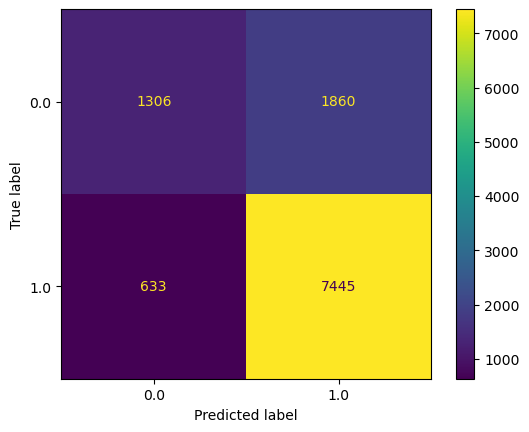

In [224]:
%matplotlib inline
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_train = confusion_matrix(y_train_bin, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                              display_labels=knn_7.classes_)
disp.plot()
plt.show()

The matrix confirms a reasonable performance of the model in training, but with some limitations. While **True Positives** are significantly high, the number of **False Positives** is considerable, indicating that the model tends to incorrectly classify animals as adopted. On the other hand, the relatively low number of False Negatives suggests that the model is less likely to ignore cases in which animals are actually adopted.

Lets check the accuracy on the test set:

In [226]:
print("Accuracy on test set:",  knn_7.score(X_test_bin, y_test_bin))

Accuracy on test set: 0.7044545212056549


On the test set, with fewer data, we got an accuracy of **70%**, which is lower than the training set accuracy of **78%**. This drop is expected and indicates that the model is generalizing reasonably well to unseen data.

The reduced accuracy on the test set suggests that the model may slightly overfit the training data, particularly given the relatively high number of false positives observed in the training set.

Lets now analyze the confusion matrix for the test set to see will more granular insights into the types of errors the model makes, guiding potential refinements.

In [228]:
# predictions for test set
y_test_pred = knn_7.predict(X_test_bin)
y_test_pred

array([1., 1., 1., ..., 1., 0., 1.])

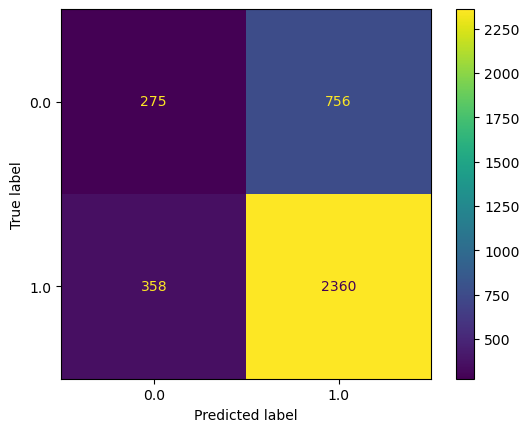

In [267]:
# compute and plot confusion matrix test 
%matplotlib inline
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_test = confusion_matrix(y_test_bin, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                              display_labels=knn_7.classes_)
disp.plot()
plt.show()

The confusion matrix for the test set reveals that the model had 275 correct predictions for **Adopted = 0 (not adopted)** and 2,360 correct predictions for **Adopted = 1 (adopted)**. However, it also presents 756 false positives, where non-adopted animals were classified as adopted, and 358 false negatives, where adopted animals were classified as non-adopted.

These values indicate that the model is more effective in correctly predicting animals that were adopted than in identifying those that were not (class 0). The high number of false positives can be problematic depending on the context, but the overall performance still reflects a model with potential, especially for the most represented class in the (adopted) dataset. 

Lets make an experience with a **K = 11**, for instance and check for changes:

In [230]:
from sklearn import neighbors

knn_11 = neighbors.KNeighborsClassifier(n_neighbors=11)
knn_11

KNeighborsClassifier(n_neighbors=11)

In [232]:
knn_11 = knn_11.fit(X_train_bin, y_train_bin)

In [234]:
print("Accuracy on training set:",  knn_11.score(X_train_bin, y_train_bin))
print("Accuracy on test set:",  knn_11.score(X_test_bin, y_test_bin))

Accuracy on training set: 0.7642298114549982
Accuracy on test set: 0.7092558015470792


With a **K = 11**, the results show an accuracy of approximately **76.5%** on the training set and **70.6%** on the test set. The decrease in accuracy in the training set, compared to **K = 7**, suggests that the model is smoothing decisions by considering more neighbors for each prediction, which helps reduce the risk of overfitting.

Performance on the test set remained stable, which indicates that the model generalizes well to new data. This stability suggests that **K = 11** may be a balanced choice for this problem, especially if the goal is to **minimize overfitting** and improve the robustness of predictions.

Now, lets try with a much lower value, like **K = 3**:

In [236]:
knn_3 = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_3 = knn_3.fit(X_train_bin, y_train_bin)
print("Accuracy on training set:",  knn_3.score(X_train_bin, y_train_bin))
print("Accuracy on test set:",  knn_3.score(X_test_bin, y_test_bin))

Accuracy on training set: 0.8313767342582711
Accuracy on test set: 0.6903174179781275


With **K = 3**, the results show an accuracy of approximately **83%** on the training set and almost **70%** on the test set. The high performance on the training set, combined with a slight reduction on the test set, indicates that the model may be starting to **overfit**. With a small number of neighbors, KNN tends to fit the training data more closely, even capturing specific variations or noise, which reduces the ability to generalize well to new data.

Although accuracy in the test is still reasonable, the lower performance relative to **K = 7** or **K = 11** suggests that slightly larger K values may be better suited for this set of data, allowing a balance between precision and generalizability.

#### 1.2.2.2 KNN with Multiclass Classification

Lets now see with the multiclass classification for KNN. Reminder that on this classification, we got 3 classes:
* 0 -> corresponds to **early adoption**, that is, the Pet was adopted in less than 1 week (0 and 1 in the original dataset);
* 1 -> corresponds to **moderate adoption**, that is, the Pet was adopted between 8 days and 3 months (90 days) (2 and 3 in the original dataset);
* 2 -> corresponds to **no adoption**, that is, the Pet was not adopted after 100 days (4 in the original dataset);

The process is identical to binary classification.

In [238]:
def load_and_process_data_knn_multiclass(fname):
    df = pd.read_csv(fname)
    #Colocar a coluna Name como categórico: 1 se tiver nome, 0 se não tem nome
    df['Name'] = df['Name'].notnull().astype(int)
    #Colocar a coluna Breed como categórico: 1 se tiver for puro, 2 se for misto
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    #Colocar a coluna Color como categórica: 1 se tiver apenas 1 cor, 2 se tiver 2 cores, 3 se tiver 3 cores
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)

    #Alterar os nomes das colunas
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    #Eliminar as colunas que não interessam
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])
    df['AdoptionSpeed'] = df['AdoptionSpeed'].replace({0: 0, 1: 0, 2: 1, 3: 1, 4: 2})
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In [240]:
df_mc2, table_X_mc2, table_y_mc2, features_mc2, target_name_mc2 = load_and_process_data_knn_multiclass("PetFinder_dataset.csv")

In [241]:
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(table_X_mc2, table_y_mc2, random_state=0)

print(X_train_mc.shape)
print(X_test_mc.shape)

(11244, 16)
(3749, 16)


Lets try first, like in the binary classification, with a **K = 7**:

In [245]:
knn_7_mc = neighbors.KNeighborsClassifier(n_neighbors=7)
knn_7_mc = knn_7_mc.fit(X_train_mc, y_train_mc)

In [247]:
print("Accuracy on training set:",  knn_7_mc.score(X_train_mc, y_train_mc))
print("Accuracy on test set:",  knn_7_mc.score(X_test_mc, y_test_mc))

Accuracy on training set: 0.615795090715048
Accuracy on test set: 0.4771939183782342


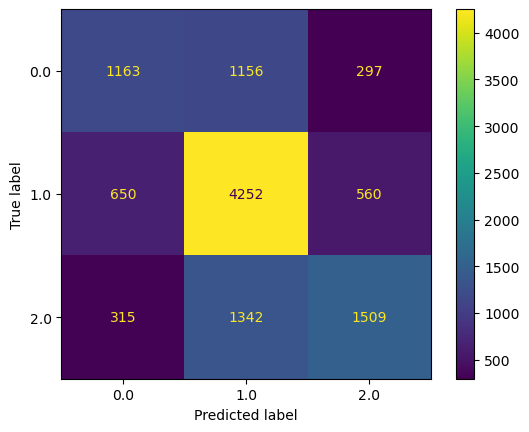

In [249]:
y_train_pred = knn_7_mc.predict(X_train_mc)
cm_train = confusion_matrix(y_train_mc, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                              display_labels=knn_7_mc.classes_)
disp.plot()
plt.show()

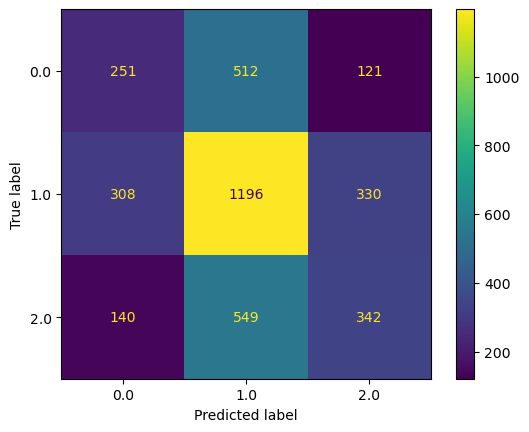

In [251]:
y_test_pred = knn_7_mc.predict(X_test_mc)
cm_test = confusion_matrix(y_test_mc, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                              display_labels=knn_7_mc.classes_)
disp.plot()
plt.show()

With an value of **K = 7** for **multiclass classification**, the model presented accuracy of approximately **62** in the training set and **47%** in the training set. test. These results indicate a significant reduction in performance compared to binary classification, which was expected given the increased complexity inherent in dealing with three classes instead of two. The drop in accuracy on the test set also points to the model's difficulties in generalizing to data outside of training.

The analysis of the confusion matrix of the training set reveals some important trends. **AdoptionSpeed = 1 (moderate adoption)** is the most represented in the dataset and also the one that the model predicts with the greatest accuracy (4257 hits), but it still presents a significant number of errors, particularly when confusing this class with **AdoptionSpeed = 2 (not adopted)**. On the other hand, **AdoptionSpeed = 0 (early adoption)** is the least well predicted, with only 1149 hits and a high rate of false negatives, and is often confused with AdoptionSpeed = 1. This may indicate that the model has difficulty separating the limits between early and moderate adoption, possibly due to the similarity in the patterns of characteristics between these classes.

On the test set, the confusion matrix shows a similar pattern, but with poorer overall performance. Again, when the class is **1**, dominates correct predictions (1200), while classes **0** and **2** are often misclassified, resulting in a high amount of **false positives** and **false negatives**. When AdoptionSpeed = 2 (non-adopted), it presents a substantial number of errors and is often confused with AdoptionSpeed = 1, which reinforces that the model struggles to adequately distinguish classes with later adoption patterns.

So, to conclude, the results suggest that the KNN model with **K = 7** faces challenges in dealing with the multiclass nature of this problem, particularly in separating the classes = 0 and classes = 1 as well as classes = 1 and  classes = 2. The moderate accuracy and the high confusion between classes indicates that adjustments to the value of K, as well as exploring different preprocessing or normalization methods, may be necessary to improve performance.

To try to fix that, lets try also with different values of K. Lets try a **K = 3** and then a **K = 15**:

In [253]:
knn_3_mc = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_3_mc = knn_3_mc.fit(X_train_mc, y_train_mc)
print("Accuracy on training set:",  knn_3_mc.score(X_train_mc, y_train_mc))
print("Accuracy on test set:",  knn_3_mc.score(X_test_mc, y_test_mc))

Accuracy on training set: 0.6980611881892564
Accuracy on test set: 0.44331821819151773


In [255]:
knn_15_mc = neighbors.KNeighborsClassifier(n_neighbors=15)
knn_15_mc = knn_15_mc.fit(X_train_mc, y_train_mc)
print("Accuracy on training set:",  knn_15_mc.score(X_train_mc, y_train_mc))
print("Accuracy on test set:",  knn_15_mc.score(X_test_mc, y_test_mc))

Accuracy on training set: 0.5692813945215226
Accuracy on test set: 0.48412910109362495


For **K = 3** and **K = 15** in the multiclass classification reinforces the difficulties of KNN in dealing with more complex problems, such as classification with more than 2 classes. We observed that the choice of **K** directly affects the balance between performance on the training set and the test set, but neither value provided a clearly superior solution.

With **K = 3**, the model showed training set accuracy of **70%**, which indicates a tendency to **overfitting** as the model tries to capture specific patterns in the training set. However, this strategy did not generalize well, resulting in an accuracy of **44.4%** on the test set, the lowest among the values analyzed. This behavior suggests that small K is overly influenced by nearest neighbors, capturing local variations in the data that may not reflect general trends.

On the other hand, with **K = 15**, the model showed opposite behavior: a **lower accuracy in training (56.5%)**, but with a slight improvement in testing, reaching **48, 7%**. This indicates that a larger K reduces the impact of noise in the data and favors a more generalist view, but it can also lose important nuances to correctly distinguish the classes.

From the analyzed values, we can say that multiclass classification with KNN is challenging in this dataset, due to the complexity and possible imbalance between classes. Although larger values K may offer slight generalization improvements, both scenarios (with small and large K values) have significant limitations.

#### 1.2.2.3 KNN with Dogs and Cats

##### Binary Classification

Lets have the same procedure as we did in the binary and multiclass classification.

First, we try a low value of K, since our data is also short by half. First, a **K = 7 for Dogs and Binary Classification**. Since we have the same problem with **Categorical features that are String**, lets create a again a function for that purpose:

In [257]:
def load_and_process_data_knn_bin_dogs(fname):
    df = pd.read_csv(fname)
    df = df[df['Type'] == 1]
    #Colocar a coluna Name como categórico: 1 se tiver nome, 0 se não tem nome
    df['Name'] = df['Name'].notnull().astype(int)
    #Colocar a coluna Breed como categórico: 1 se tiver for puro, 2 se for misto
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    #Colocar a coluna Color como categórica: 1 se tiver apenas 1 cor, 2 se tiver 2 cores, 3 se tiver 3 cores
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)

    #Alterar os nomes das colunas
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    #Eliminar as colunas que não interessam
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])
    
    df['Adopted'] = (df['AdoptionSpeed'] != 4).astype(int)
    df = df.drop(columns=['AdoptionSpeed'])
    
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In [259]:
df_dogs_bin, table_X_dogs_bin, table_y_dogs_bin, features_dogs_bin, target_name_dogs_bin = load_and_process_data_knn_bin_dogs("PetFinder_dataset.csv")

In [261]:
from sklearn import neighbors

knn_7_dogs = neighbors.KNeighborsClassifier(n_neighbors=7)
knn_7_dogs

KNeighborsClassifier(n_neighbors=7)

In [263]:
from sklearn.model_selection import train_test_split

X_train_bin_dogs, X_test_bin_dogs, y_train_bin_dogs, y_test_bin_dogs = train_test_split(table_X_dogs_bin, table_y_dogs_bin, random_state=0)

print(X_train_bin_dogs.shape)
print(X_test_bin_dogs.shape)

(6099, 16)
(2033, 16)


In [265]:
knn_7_dogs = knn_7_dogs.fit(X_train_bin_dogs, y_train_bin_dogs)

In [267]:
print("Accuracy on training set:",  knn_7_dogs.score(X_train_bin_dogs, y_train_bin_dogs))
print("Accuracy on test set:",  knn_7_dogs.score(X_test_bin_dogs, y_test_bin_dogs))

Accuracy on training set: 0.7688145597638957
Accuracy on test set: 0.7038858829316281


The results obtained for **binary classification considering only dogs**, with **77% training accuracy**, indicate that the KNN model with **K = 7** has good performance when learning from dog characteristics. This training accuracy value is slightly lower than the **78.03% achieved with the full dataset**, which suggests that by focusing only on dogs, the model can learn well from the data, but loses a little precision compared to the greater variety of the full dataset.

In the test set, the accuracy was **70.73%**, which is a reasonable value, but almost the same than the value of **70.28%** obtained with the complete dataset. This suggests that, despite good performance on the training set, the model has also a little difficulty generalizing to the test set when restricted to the subset of dogs. It may be that the set of dogs is less diverse or that the characteristics present in the data are more difficult to separate when we do not have the influence of other classes (cats).

Overall, performance on the test set is good, but the model shows a slight performance decrease compared to the full dataset. The analysis suggests that although the model learned well from the dog-restricted dataset, its generalization ability could be improved, especially when compared to the model's behavior on a broader dataset.

Lets now compare with the **Cats dataset** with the same value of K:

In [271]:
def load_and_process_data_knn_bin_cats(fname):
    df = pd.read_csv(fname)
    df = df[df['Type'] == 2]
    #Colocar a coluna Name como categórico: 1 se tiver nome, 0 se não tem nome
    df['Name'] = df['Name'].notnull().astype(int)
    #Colocar a coluna Breed como categórico: 1 se tiver for puro, 2 se for misto
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    #Colocar a coluna Color como categórica: 1 se tiver apenas 1 cor, 2 se tiver 2 cores, 3 se tiver 3 cores
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)

    #Alterar os nomes das colunas
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    #Eliminar as colunas que não interessam
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])
    
    df['Adopted'] = (df['AdoptionSpeed'] != 4).astype(int)
    df = df.drop(columns=['AdoptionSpeed'])
    
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In [273]:
df_cats_bin, table_X_cats_bin, table_y_cats_bin, features_cats_bin, target_name_cats_bin = load_and_process_data_knn_bin_cats("PetFinder_dataset.csv")

In [275]:
X_train_bin_cats, X_test_bin_cats, y_train_bin_cats, y_test_bin_cats = train_test_split(table_X_cats_bin, table_y_cats_bin, random_state=0)

print(X_train_bin_cats.shape)
print(X_test_bin_cats.shape)

(5145, 16)
(1716, 16)


In [277]:
knn_7_cats = neighbors.KNeighborsClassifier(n_neighbors=7)
knn_7_cats

KNeighborsClassifier(n_neighbors=7)

In [279]:
knn_7_cats = knn_7_cats.fit(X_train_bin_cats, y_train_bin_cats)

In [281]:
print("Accuracy on training set:",  knn_7_cats.score(X_train_bin_cats, y_train_bin_cats))
print("Accuracy on test set:",  knn_7_cats.score(X_test_bin_cats, y_test_bin_cats))

Accuracy on training set: 0.787949465500486
Accuracy on test set: 0.7395104895104895


The results obtained for the **binary classification with only cats**, had an accuracy of **78%** on the train set, show that the KNN model with **K = 7** fits well to the cats dataset. Futhermore, this value is very identical to that obtained in the complete data set (**78%** as well), indicating that the model learns equally efficiently with the subset of cat data.

In the test set, the accuracy was **73%**, a value significantly higher than that obtained with the full dataset (**70%**) and also higher than the dataset restricted to dogs (**70.73%**). This suggests that, for the cat subset, the model generalizes better and is able to more effectively capture the relationships between the dataset features and the output classes.

Compared to the dog dataset, the **training accuracy for cats is slightly higher (78.78% vs. 76.78%)**, suggesting that the model has a better fit to the cat data. On the test set, the difference in performance is even more notable, with cats achieving **73%** accuracy, while dogs achieved **70.73%**. This difference may indicate that the cat dataset has more distinguishable or less ambiguous characteristics, allowing the model to make more accurate predictions.

Overall, the results suggest that the KNN model performs slightly better when working with the cat subset compared to the dog subset, both in training and generalization, even with pratically half of the data splited equally.

Lets change the value of K to both lower and bigger values.
Lets try first for **K = 3**

In [285]:
knn_3 = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_3

KNeighborsClassifier(n_neighbors=3)

In [287]:
knn_3_dogs = knn_3.fit(X_train_bin_dogs, y_train_bin_dogs)
knn_3_cats = knn_3.fit(X_train_bin_cats, y_train_bin_cats)

In [289]:
print("For Dogs: ")
print("Accuracy on training set:",  knn_3_dogs.score(X_train_bin_dogs, y_train_bin_dogs))
print("Accuracy on test set:",  knn_3_dogs.score(X_test_bin_dogs, y_test_bin_dogs))
print("#########################")
print("For Cats: ")
print("Accuracy on training set:",  knn_3_cats.score(X_train_bin_cats, y_train_bin_cats))
print("Accuracy on test set:",  knn_3_cats.score(X_test_bin_cats, y_test_bin_cats))

For Dogs: 
Accuracy on training set: 0.6638793244794229
Accuracy on test set: 0.6665027053615347
#########################
For Cats: 
Accuracy on training set: 0.8357628765792031
Accuracy on test set: 0.7138694638694638


For **K = 3**, in KNN, it reveals important differences between the subsets of dogs, cats, and the full dataset. For dogs, the accuracy in training (**66%**) and testing (**67%**) was lower than that of cats (**83% in training and 71% in testing**) and the complete dataset (**83% in training and 69% in testing**). 

This suggests that the model faces more difficulty capturing consistent patterns in the dog data, perhaps due to greater variability of their features, like the Fur Length or Dewormed, or maybe even its complexity. In contrast, the cat subset is easier to model, with better performance in training and testing, indicating greater consistency in the patterns of its characteristics. 

In the full dataset, the results represent an average of these subsets, suggesting that mixing both classes dilutes some of the specificities but still benefits from the cats' more consistent patterns. The use of **K = 3** makes the model **more sensitive to outliers**, which can worsen the difficulty with more complex data, such as dogs, and benefit more homogeneous sets, such as cats.

And now a much bigger value, like **K = 17**:

In [293]:
knn_17 = neighbors.KNeighborsClassifier(n_neighbors=17)
knn_17

KNeighborsClassifier(n_neighbors=17)

In [295]:
knn_17_dogs = knn_17.fit(X_train_bin_dogs, y_train_bin_dogs)
knn_17_cats = knn_17.fit(X_train_bin_cats, y_train_bin_cats)

In [297]:
print("For Dogs: ")
print("Accuracy on training set:",  knn_17_dogs.score(X_train_bin_dogs, y_train_bin_dogs))
print("Accuracy on test set:",  knn_17_dogs.score(X_test_bin_dogs, y_test_bin_dogs))
print("#########################")
print("For Cats: ")
print("Accuracy on training set:",  knn_17_cats.score(X_train_bin_cats, y_train_bin_cats))
print("Accuracy on test set:",  knn_17_cats.score(X_test_bin_cats, y_test_bin_cats))

For Dogs: 
Accuracy on training set: 0.6832267584849976
Accuracy on test set: 0.6861780619773733
#########################
For Cats: 
Accuracy on training set: 0.7613216715257531
Accuracy on test set: 0.743006993006993


For **K = 17**, in the dog subset, its shows a slight improvement compared to **K = 3**, with an accuracy of **68%** in training and **68%** in testing. This suggests that increasing K helps smooth out the effects of outliers and noise, resulting in more stable forecasts. However, the accuracy is still lower when compared to the cat subset or the complete dataset, indicating that the patterns in the dog data continue to be more difficult to capture, even with a higher value of K.

In the cat subset, the same increase in K also brought greater stability and performance, with accuracy of **76%** in training set and **75%** in the test set. These values remain higher than those for the dog subset, reaffirming the greater consistency and predictability of data related to cats. Also, this close performance between training and testing suggests a well-fitting model, less susceptible to overfitting.

Although we didnt used the same value of K of the complete dataset, we can see that in the complete dataset, with **K = 11**, the accuracy in training was **76%** and in the test **71%**, falling between the results of the subsets. This reflects the average of the patterns present in the dog and cat data, but the model is still more influenced by the greater stability of cats. Comparatively, **K = 17** on the cat subset presents the best balance between training and testing, while K = 11 on the full dataset is closer to a general scenario, but dilutes some nuances specific to each group.

##### Multiclass Classification

Now, lets switch to **multiclass classification for Dogs and Cats**, and test it with the same values of K: first **K = 7**, then **K = 3**, and finally **K = 17**.

The procedure is, again, the same:

In [299]:
def load_and_process_data_knn_multiclass_dogs(fname):
    df = pd.read_csv(fname)
    df = df[df['Type'] == 1]
    #Colocar a coluna Name como categórico: 1 se tiver nome, 0 se não tem nome
    df['Name'] = df['Name'].notnull().astype(int)
    #Colocar a coluna Breed como categórico: 1 se tiver for puro, 2 se for misto
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    #Colocar a coluna Color como categórica: 1 se tiver apenas 1 cor, 2 se tiver 2 cores, 3 se tiver 3 cores
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)

    #Alterar os nomes das colunas
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    #Eliminar as colunas que não interessam
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])
    df['AdoptionSpeed'] = df['AdoptionSpeed'].replace({0: 0, 1: 0, 2: 1, 3: 1, 4: 2})
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In [301]:
df_mc_dogs2, table_X_mc_dogs2, table_y_mc_dogs2, features_mc_dogs2, target_name_mc_dogs2 = load_and_process_data_knn_multiclass_dogs("PetFinder_dataset.csv")

In [303]:
X_train_mc_dogs, X_test_mc_dogs, y_train_mc_dogs, y_test_mc_dogs = train_test_split(table_X_mc_dogs2, table_y_mc_dogs2, random_state=0)

print(X_train_mc_dogs.shape)
print(X_test_mc_dogs.shape)

(6099, 16)
(2033, 16)


In [305]:
def load_and_process_data_knn_multiclass_cats(fname):
    df = pd.read_csv(fname)
    df = df[df['Type'] == 2]
    #Colocar a coluna Name como categórico: 1 se tiver nome, 0 se não tem nome
    df['Name'] = df['Name'].notnull().astype(int)
    #Colocar a coluna Breed como categórico: 1 se tiver for puro, 2 se for misto
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    #Colocar a coluna Color como categórica: 1 se tiver apenas 1 cor, 2 se tiver 2 cores, 3 se tiver 3 cores
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)

    #Alterar os nomes das colunas
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    #Eliminar as colunas que não interessam
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])
    df['AdoptionSpeed'] = df['AdoptionSpeed'].replace({0: 0, 1: 0, 2: 1, 3: 1, 4: 2})
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In [307]:
df_mc_cats2, table_X_mc_cats2, table_y_mc_cats2, features_mc_cats2, target_name_mc_cats2 = load_and_process_data_knn_multiclass_cats("PetFinder_dataset.csv")

In [309]:
X_train_mc_cats, X_test_mc_cats, y_train_mc_cats, y_test_mc_cats = train_test_split(table_X_mc_cats2, table_y_mc_cats2, random_state=0)

print(X_train_mc_cats.shape)
print(X_test_mc_cats.shape)

(5145, 16)
(1716, 16)


In [311]:
knn_7_mc = neighbors.KNeighborsClassifier(n_neighbors=7)
knn_7_mc_dogs = knn_7_mc.fit(X_train_mc_dogs, y_train_mc_dogs)
knn_7_mc_cats = knn_7_mc.fit(X_train_mc_cats, y_train_mc_cats)

In [313]:
print("For Dogs: ")
print("Accuracy on training set:",  knn_7_mc_dogs.score(X_train_mc_dogs, y_train_mc_dogs))
print("Accuracy on test set:",  knn_7_mc_dogs.score(X_test_mc_dogs, y_test_mc_dogs))
print("#########################")
print("For Cats: ")
print("Accuracy on training set:",  knn_7_mc_cats.score(X_train_mc_cats, y_train_mc_cats))
print("Accuracy on test set:",  knn_7_mc_cats.score(X_test_mc_cats, y_test_mc_cats))

For Dogs: 
Accuracy on training set: 0.4402361042793901
Accuracy on test set: 0.44171175602557794
#########################
For Cats: 
Accuracy on training set: 0.5996112730806609
Accuracy on test set: 0.45396270396270394


For **K = 7** in multiclass classification, the results show that the dog data is significantly more challenging for the model, with an accuracy of **44%** in training and also **44%** in testing. This low performance reflects a difficulty in capturing clear patterns between classes, possibly due to greater variability, just like in the binary classification, or overlap in dog attributes between different categories. The similar performance between training and testing, however, suggests that the model is not suffering from overfitting, but is limited by the intrinsic complexity of the data.

In the cat subset, the model presents still a better performance, with an accuracy of **60%** in training, but only **46%** in testing. Despite a slight decline in accuracy when moving from training to testing, the result is still superior to that of dogs, reinforcing the idea that data related to cats is more consistent and predictable. 

Comparing with the complete dataset, where the accuracies were **61.5%** in training and **47%** in the test, it is clear that data from cats contribute more significantly to the overall performance, while data from dogs limits the capacity of the model to achieve higher results in a big picture.

When **K = 3**:

In [317]:
knn_3_mc = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_3_mc_dogs = knn_3_mc.fit(X_train_mc_dogs, y_train_mc_dogs)
knn_3_mc_cats = knn_3_mc.fit(X_train_mc_cats, y_train_mc_cats)

In [319]:
print("For Dogs: ")
print("Accuracy on training set:",  knn_3_mc_dogs.score(X_train_mc_dogs, y_train_mc_dogs))
print("Accuracy on test set:",  knn_3_mc_dogs.score(X_test_mc_dogs, y_test_mc_dogs))
print("#########################")
print("For Cats: ")
print("Accuracy on training set:",  knn_3_mc_cats.score(X_train_mc_cats, y_train_mc_cats))
print("Accuracy on test set:",  knn_3_mc_cats.score(X_test_mc_cats, y_test_mc_cats))

For Dogs: 
Accuracy on training set: 0.41203475979668797
Accuracy on test set: 0.4058042302016724
#########################
For Cats: 
Accuracy on training set: 0.6899902818270165
Accuracy on test set: 0.42424242424242425


For **K = 3**, it is observed that the performance for dog data is super low, the lowest so far, with an accuracy of just **41%** in training and **41%** as well in testing. These results indicate that the model cannot identify clear patterns across classes and suggest that reducing K may be making predictions more sensitive to noise in the data. On a more positive side, the small difference between training and testing reinforces that the model does not suffer from overfitting, but the complexity of the dog data still remains a challenge.

In the cat subset, the model presents superior results, with an accuracy of **69%** in training set but still only **43%** in testing. The greater disparity between training and testing suggests possible **overfitting**, where the model fits the training data well but does not generalize as well.

Comparing with the complete dataset, where the accuracies were **69%** in training and **44%** in testing, it is clear that data from cats increases overall performance, while data from dogs limits overall performance. Reducing K however, slightly benefits cats in training, but impairs generalization in testing.

And now when **K = 17**:

In [323]:
knn_17_mc = neighbors.KNeighborsClassifier(n_neighbors=17)
knn_17_mc_dogs = knn_17_mc.fit(X_train_mc_dogs, y_train_mc_dogs)
knn_17_mc_cats = knn_17_mc.fit(X_train_mc_cats, y_train_mc_cats)

In [325]:
print("For Dogs: ")
print("Accuracy on training set:",  knn_17_mc_dogs.score(X_train_mc_dogs, y_train_mc_dogs))
print("Accuracy on test set:",  knn_17_mc_dogs.score(X_test_mc_dogs, y_test_mc_dogs))
print("#########################")
print("For Cats: ")
print("Accuracy on training set:",  knn_17_mc_cats.score(X_train_mc_cats, y_train_mc_cats))
print("Accuracy on test set:",  knn_17_mc_cats.score(X_test_mc_cats, y_test_mc_cats))

For Dogs: 
Accuracy on training set: 0.45696015740285295
Accuracy on test set: 0.4549926217412691
#########################
For Cats: 
Accuracy on training set: 0.5446064139941691
Accuracy on test set: 0.4696969696969697


With **K = 17**, the results for dogs show again stability between training **45.7%** and testing **45.7%**. This suggests that increasing K softens the decision boundaries, resulting in a more generalized model, but still with limited ability to capture the complexity of the data. The performance is slightly higher than that observed for **K = 3**, which indicates that a larger K may be better suited to deal with the noise present in the dog data.

For cats, the model presents an accuracy of **54%** in training and **47%** in the test, which shows a slight improvement in generalization (test) in relation to K = 3, but with a reduction in training performance . 

Even though we didnt used the same value for the complete dataset, comparing with the complete dataset for **K = 15**, where the accuracies were **56%** in training and **48.7%** in the test, it is clear that cats continue to contribute more to the overall performance. However, the increase in K in the complete set reinforces the smoothing tendency, maintaining a balance between training and testing without large gains in accuracy.

### 1.2.3. Naive Bayes

Now, we will use a probabilistic model, the **Naive Bayes**. This model, despite assuming independence between variables, is known for its simplicity and efficiency in fast classifications.

#### 1.2.3.1. Naive Bayes Binary Classification

In [327]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb

GaussianNB()

Lets use the same variables we used on the KNN classification, since there are no changes in there:

In [330]:
from sklearn.model_selection import train_test_split
X_train_bin_nb, X_test_bin_nb, y_train_bin_nb, y_test_bin_nb = train_test_split(table_X_bin2, table_y_bin2, random_state=0)

print(X_train_bin_nb.shape)
print(X_test_bin_nb.shape)

(11244, 16)
(3749, 16)


Now we fit our data:

In [333]:
gnb = gnb.fit(X_train_bin_nb, y_train_bin_nb)

And now we get the probabilities array:

In [336]:
gnb.predict_proba(X_train_bin_nb)

array([[0.118251  , 0.881749  ],
       [0.48006556, 0.51993444],
       [0.35143251, 0.64856749],
       ...,
       [0.13658457, 0.86341543],
       [0.70865568, 0.29134432],
       [0.38953205, 0.61046795]])

The result obtained is an array with the probabilities predicted by the **Naive Bayes model** for each sample in the training set. Each row of the array represents a sample, and the columns indicate the probabilities assigned by the model for **Adoption = 0 ("not adopted") and 1 ("adopted")**, respectively. For instance, the first sample has a probability of approximately **12% of belonging to Adoption = 0 and 88.2% of belonging to Adoption = 1**, the second sample has a probability of **48% of belonging to Adoption = 0 and 52% of belonging to Adoption = 1**, and so on.

These probabilities reflect the model's confidence in its predictions, that is, values close to 0.5 for both classes, as in the second row, indicate model uncertainty, while values closer to 0 or 1 show greater confidence in a specific class.

Lets now check its accuracy:

In [340]:
print("Accuracy on training set:",  gnb.score(X_train_bin_nb, y_train_bin_nb))

Accuracy on training set: 0.6768943436499466


The accuracy of **68%** on the training set for the Naive Bayes model indicates that it can correctly classify about two-thirds of the samples in training.

The result suggests that the model is capturing some patterns in the data, but may be limited by the assumption of independence between features, a fundamental characteristic of Naive Bayes that does not always reflect the reality of the data.

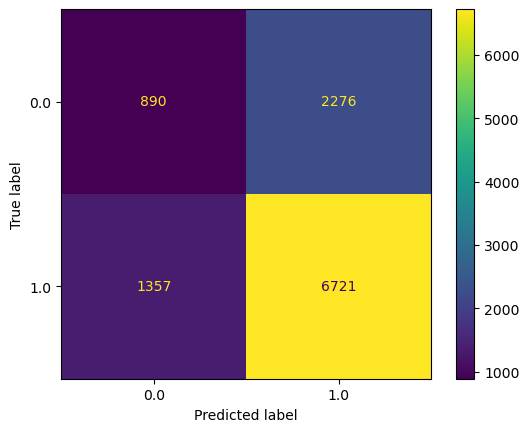

In [343]:
%matplotlib inline
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_train_pred = gnb.predict(X_train_bin_nb)

cm_train = confusion_matrix(y_train_bin_nb, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                              display_labels=gnb.classes_)
disp.plot()
plt.show()

The confusion matrix for the training set reveals some important patterns about the performance of the Naive Bayes model:
For **Adopted = 0** (not adopted), the model correctly classified 890 instances, but had **2,276 false positives** where it incorrectly predicted as adopted. This indicates a difficulty in correctly identifying animals that have not been adopted.
For **Adopted = 1** (adopted), the model got 6721 instances correct, but committed **1357 false negatives**, wrongly classifying them as not adopted.
Although the model has greater accuracy for class 1 (adopted), the high number of errors, especially in class 0, suggests that the model has a tendency to predict adoption, possibly influenced by class distribution.

Lets now use the trained model to predict the classes of the test set:

Lets now check the probabilities computed for each instance (one for each class)

In [348]:
gnb.predict_proba(X_test_bin_nb)

array([[0.13423915, 0.86576085],
       [0.19945866, 0.80054134],
       [0.13792442, 0.86207558],
       ...,
       [0.06654211, 0.93345789],
       [0.94389688, 0.05610312],
       [0.01059081, 0.98940919]])

In [350]:
y_test_pred = gnb.predict(X_test_bin_nb)
y_test_pred

array([1., 1., 1., ..., 1., 0., 1.])

In [352]:
print("Accuracy on test set:",  gnb.score(X_test_bin_nb, y_test_bin_nb))

Accuracy on test set: 0.6721792477994132


The accuracy obtained on the test set was approximately **67%**, a value very close to that obtained on the training set (**68%**). This consistency suggests that the Naive Bayes model is **not suffering from overfitting**, that is, it is not excessively adjusted to the training data. Performance is similar on both sets, indicating that the model generalizes relatively well to new data.

However, an accuracy of 67% demonstrates that there is significant room for improvement in model performance. Naive Bayes assumes independence between features, which may not correspond to the reality of the dataset, (for instance, a pet that is vaccinated may be more healthy, etc.) and may limit the model's ability to capture more complex patterns present in the data.

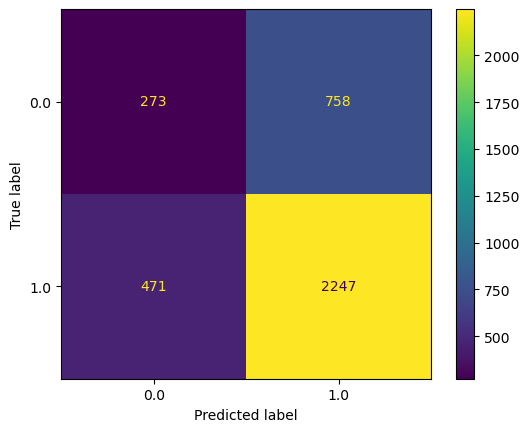

In [355]:
# compute and plot confusion matrix train 
%matplotlib inline
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_test_pred = gnb.predict(X_test_bin_nb)

cm_test = confusion_matrix(y_test_bin_nb, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                              display_labels=gnb.classes_)
disp.plot()
plt.show()

For the confusion matrix of the test set, we can see that it reveals more details about the performance of the Naive Bayes model in binary classification. The model was able to correctly predict 273 cases of **Adopted = 0** (not adopted) and 2247 cases of **Adopted = 1** (adopted). These numbers reflect the correct predictions made by the model.

However, **758 false positives** (animals predicted as adopted but were not) and **471 false negatives** (animals predicted as not adopted but were not) were also observed. The high number of false positives suggests that the model has a tendency to overclassify cases as adopted, while the lower number of false negatives may indicate a slight underestimation of non-adopted cases.

#### 1.2.3.2. Naive Bayes Multiclass Classification

The procedure is the same for the multiclass classification.

In [358]:
def load_and_process_data_nb_multiclass(fname):
    df = pd.read_csv(fname)
    #Colocar a coluna Name como categórico: 1 se tiver nome, 0 se não tem nome
    df['Name'] = df['Name'].notnull().astype(int)
    #Colocar a coluna Breed como categórico: 1 se tiver for puro, 2 se for misto
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    #Colocar a coluna Color como categórica: 1 se tiver apenas 1 cor, 2 se tiver 2 cores, 3 se tiver 3 cores
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)

    #Alterar os nomes das colunas
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    #Eliminar as colunas que não interessam
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])
    df['AdoptionSpeed'] = df['AdoptionSpeed'].replace({0: 0, 1: 0, 2: 1, 3: 1, 4: 2})
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In [360]:
df_mc2, table_X_mc2, table_y_mc2, features_mc2, target_name_mc2 = load_and_process_data_nb_multiclass("PetFinder_dataset.csv")

In [362]:
gnb2 = GaussianNB()
gnb2

GaussianNB()

In [364]:
X_train_mc_nb, X_test_mc_nb, y_train_mc_nb, y_test_mc_nb = train_test_split(table_X_mc2, table_y_mc2, random_state=0)

print(X_train_mc_nb.shape)
print(X_test_mc_nb.shape)

(11244, 16)
(3749, 16)


In [366]:
gnb2 = gnb2.fit(X_train_mc_nb, y_train_mc_nb)

In [368]:
gnb2.predict_proba(X_train_mc_nb)

array([[0.56796757, 0.3350778 , 0.09695462],
       [0.48054999, 0.14549635, 0.37395366],
       [0.11474691, 0.54383696, 0.34141613],
       ...,
       [0.4604439 , 0.41730234, 0.12225377],
       [0.03857053, 0.19921338, 0.76221609],
       [0.19997459, 0.41691875, 0.38310667]])

In [370]:
gnb2.predict_proba(X_test_mc_nb)

array([[0.59040246, 0.30183004, 0.1077675 ],
       [0.36562788, 0.44614182, 0.1882303 ],
       [0.47205858, 0.40575676, 0.12218466],
       ...,
       [0.79372103, 0.16769345, 0.03858552],
       [0.02242577, 0.03500794, 0.94256629],
       [0.28865707, 0.70007036, 0.01127257]])

In [372]:
print("Accuracy on training set:",  gnb2.score(X_train_mc_nb, y_train_mc_nb))
print("Accuracy on test set:",  gnb2.score(X_test_mc_nb, y_test_mc_nb))

Accuracy on training set: 0.43836712913553894
Accuracy on test set: 0.4291811149639904


The results from Naive Bayes applied to multiclass classification present some obvious limitations in terms of performance. On the training set, the model achieved an accuracy of **44%**, which is relatively low and indicates that the model is having difficulty clearly distinguishing between the three classes (early adoption, moderate adoption, and no adoption). The low accuracy suggests that the assumptions of independence between features made by Naive Bayes do not capture relationships in the data well, especially in a three-class classification problem.

For the test set, the accuracy was **43%**, very close to that obtained in training. Although this result demonstrates consistency between training and testing, it reflects that the model is not robust enough to capture the patterns necessary for good generalization. This may be due to the complexity of the problem or limitations of the model itself in dealing with more complex data distributions.

When observing the predicted probabilities in the two sets, it is noted that there is a tendency for the model to distribute the probabilities in a dispersed manner between the classes, without a clear predominance, which may indicate that the boundaries between the classes are not well defined. Furthermore, cases with similar probabilities between classes reveal considerable uncertainty on the part of the model.

This suboptimal performance suggests that Naive Bayes may not be the ideal model for this problem, when dealing with more than 2 classes.

Lets take a look at the confusion matrices. First, the confusion matrix for the train set:

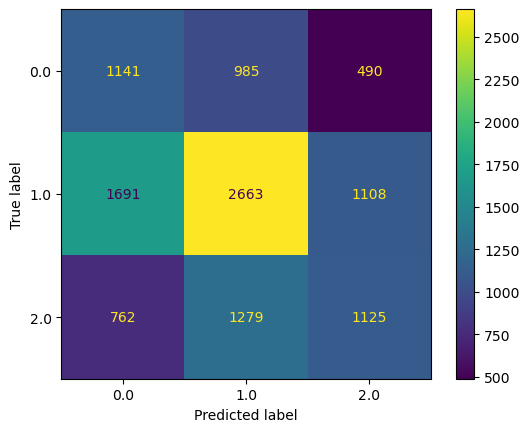

In [376]:
%matplotlib inline
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_train_pred_nb2 = gnb2.predict(X_train_mc_nb)

cm_train = confusion_matrix(y_train_mc_nb, y_train_pred_nb2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                              display_labels=gnb2.classes_)
disp.plot()
plt.show()

The confusion matrix of the training set reveals a moderate performance of the Naive Bayes model, with significant confusions between the three classes. For **AdoptionSpeed = 0** (early adoption), the model correctly classified 1,141 instances, but confused 985 with class 1 and 490 with class 2, indicating an overlap between early and moderate adoption characteristics.

**AdoptionSpeed = 1** (moderate adoption) had 2663 correct predictions, but also presented the highest number of absolute errors: 1691 instances were classified as **AdoptionSpeed = 0** and 1108 as **AdoptionSpeed = 2**. This reflects the model's difficulty in distinguishing the intermediate class, which may share attributes with the other two.

Finally, in **AdoptionSpeed = 2** (no adoption), 1125 instances were correctly classified, but 762 were assigned to class 0 and 1279 to **AdoptionSpeed = 1**. This pattern highlights the model's limitation in clearly separating this class, reinforcing the difficulty in dealing with the complexity of the multiclass scenario.

Overall, model performance is compromised by overlapping features between classes, and the accuracy, although reasonable in some cases, is insufficient for a clear separation.

Now, the confusion matrix for the test set:

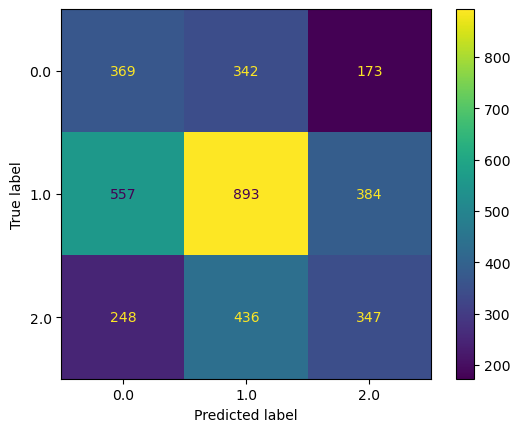

In [380]:
%matplotlib inline
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_test_pred_nb2 = gnb2.predict(X_test_mc_nb)

cm_test = confusion_matrix(y_test_mc_nb, y_test_pred_nb2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                              display_labels=gnb2.classes_)
disp.plot()
plt.show()

The confusion matrix of the test set reflects a performance similar to that observed in the training set, highlighting the difficulties of the Naive Bayes model in distinguishing between the three classes. For **AdoptionSpeed = 0** (early adoption), 369 instances were correctly classified, while 342 were incorrectly assigned to **AdoptionSpeed = 1** and 173 to **AdoptionSpeed = 2**. This suggests significant confusion between early and moderate adoption.

In **AdoptionSpeed = 1** (moderate adoption), the model achieved 893 correct predictions, but there were still 557 instances classified as **AdoptionSpeed = 0** and 384 as **AdoptionSpeed = 2**. This pattern continues to highlight the model's difficulty in accurately identifying this intermediate class, where there is a large overlap of characteristics with other classes.

For **AdoptionSpeed = 2** (no adoption), only 347 instances were correctly classified, while 248 were assigned to **AdoptionSpeed = 0** and 436 to **AdoptionSpeed = 1**. These numbers indicate that the separation between moderate and no adoption is particularly problematic for the model.

Overall, the test set matrix confirms the model's limitation in multi-class scenarios, with suboptimal performance across all classes.

#### 1.2.3.3. Naive Bayes Dogs and Cats Classification

Now, lets train with Dogs and Cats instances again to see if there's some improvement or not

##### Binary Classification

In [383]:
def load_and_process_data_nb_bin_dogs(fname):
    df = pd.read_csv(fname)
    df = df[df['Type'] == 1]
    #Colocar a coluna Name como categórico: 1 se tiver nome, 0 se não tem nome
    df['Name'] = df['Name'].notnull().astype(int)
    #Colocar a coluna Breed como categórico: 1 se tiver for puro, 2 se for misto
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    #Colocar a coluna Color como categórica: 1 se tiver apenas 1 cor, 2 se tiver 2 cores, 3 se tiver 3 cores
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)

    #Alterar os nomes das colunas
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    #Eliminar as colunas que não interessam
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])
    
    df['Adopted'] = (df['AdoptionSpeed'] != 4).astype(int)
    df = df.drop(columns=['AdoptionSpeed'])
    
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In [385]:
def load_and_process_data_nb_bin_cats(fname):
    df = pd.read_csv(fname)
    df = df[df['Type'] == 2]
    #Colocar a coluna Name como categórico: 1 se tiver nome, 0 se não tem nome
    df['Name'] = df['Name'].notnull().astype(int)
    #Colocar a coluna Breed como categórico: 1 se tiver for puro, 2 se for misto
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    #Colocar a coluna Color como categórica: 1 se tiver apenas 1 cor, 2 se tiver 2 cores, 3 se tiver 3 cores
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)

    #Alterar os nomes das colunas
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    #Eliminar as colunas que não interessam
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])
    
    df['Adopted'] = (df['AdoptionSpeed'] != 4).astype(int)
    df = df.drop(columns=['AdoptionSpeed'])
    
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In [387]:
df_dogs_bin_nb, table_X_dogs_bin_nb, table_y_dogs_bin_nb, features_dogs_bin_nb, target_name_dogs_bin_nb = load_and_process_data_nb_bin_dogs("PetFinder_dataset.csv")
df_cats_bin_nb, table_X_cats_bin_nb, table_y_cats_bin_nb, features_cats_bin_nb, target_name_cats_bin_nb = load_and_process_data_nb_bin_cats("PetFinder_dataset.csv")

In [389]:
gnb_2 = GaussianNB()
gnb_2

GaussianNB()

In [391]:
from sklearn.model_selection import train_test_split
X_train_bin_nb_dogs, X_test_bin_nb_dogs, y_train_bin_nb_dogs, y_test_bin_nb_dogs = train_test_split(table_X_dogs_bin_nb, table_y_dogs_bin_nb, random_state=0)
X_train_bin_nb_cats, X_test_bin_nb_cats, y_train_bin_nb_cats, y_test_bin_nb_cats = train_test_split(table_X_cats_bin_nb, table_y_cats_bin_nb, random_state=0)

print("Dogs train|test split: ")
print(X_train_bin_nb_dogs.shape)
print(X_test_bin_nb_dogs.shape)
print("########################### ")
print("Cats train|test split: ")
print(X_train_bin_nb_cats.shape)
print(X_test_bin_nb_cats.shape)

Dogs train|test split: 
(6099, 16)
(2033, 16)
########################### 
Cats train|test split: 
(5145, 16)
(1716, 16)


In [393]:
gnb_bin_dogs = gnb_2.fit(X_train_bin_nb_dogs, y_train_bin_nb_dogs)
gnb_bin_cats = gnb_2.fit(X_train_bin_nb_cats, y_train_bin_nb_cats)

Lets see as well the probabilites array for both Dogs and Cats:

In [396]:
gnb_bin_dogs.predict_proba(X_train_bin_nb_dogs)

array([[0.15569329, 0.84430671],
       [0.17640966, 0.82359034],
       [0.12027828, 0.87972172],
       ...,
       [0.36604033, 0.63395967],
       [0.92814836, 0.07185164],
       [0.07341258, 0.92658742]])

In [398]:
gnb_bin_cats.predict_proba(X_train_bin_nb_cats)

array([[0.07258441, 0.92741559],
       [0.05569091, 0.94430909],
       [0.13014321, 0.86985679],
       ...,
       [0.09001125, 0.90998875],
       [0.14975326, 0.85024674],
       [0.40957703, 0.59042297]])

Both this arrays show the predictive probabilities generated by the Naive Bayes model for the training set in binary classification. For dogs, there is greater dispersion in probabilities, with more balanced values between classes, suggesting greater model uncertainty. For cats, the probabilities are more concentrated in one of the classes, indicating that the model is more confident in its predictions for this set.

In [401]:
print("Dogs: ")
print("Accuracy on training set:",  gnb_bin_dogs.score(X_train_bin_nb_dogs, y_train_bin_nb_dogs))
print("Accuracy on test set:",  gnb_bin_dogs.score(X_test_bin_nb_dogs, y_test_bin_nb_dogs))
print("#################################")
print("Cats: ")
print("Accuracy on training set:",  gnb_bin_cats.score(X_train_bin_nb_cats, y_train_bin_nb_cats))
print("Accuracy on test set:",  gnb_bin_cats.score(X_test_bin_nb_cats, y_test_bin_nb_cats))

Dogs: 
Accuracy on training set: 0.6440400065584522
Accuracy on test set: 0.6650270536153468
#################################
Cats: 
Accuracy on training set: 0.7098153547133139
Accuracy on test set: 0.6963869463869464


These results show a significant difference between the performance of Naive Bayes on the dog and cat datasets, as well as on the full dataset. For dogs, the accuracies in training **64.4%** and testing **66.5%** are close, indicating that the model is generalizing pretty well, but with a moderate performance. In the case of cats, accuracies are higher in training **71%** and slightly lower in testing **69.6%**, but also with close accuracies, which suggests that the model captures patterns better in cat data than in dog data.

Comparing with the complete dataset, which presents **67.7%** in training and **67%** in testing, it is clear that performance in dogs is lower, while cats slightly outperform the general model in training, but have a slightly worse performance in testing. This, again, may indicate that cat data has more distinct characteristics between classes, allowing for better fit, while dog data may be more challenging due to greater overlap between classes.

Lets look at the confusion matrices. First, we display the **confusion matrices for the train sets**:

Dogs train set:


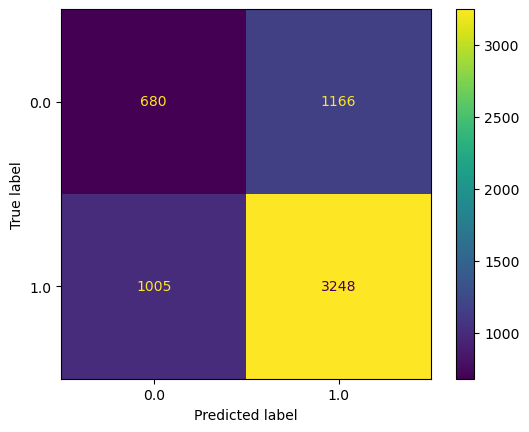

In [405]:
%matplotlib inline
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_train_pred_dogs = gnb_bin_dogs.predict(X_train_bin_nb_dogs)

cm_train = confusion_matrix(y_train_bin_nb_dogs, y_train_pred_dogs)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                              display_labels=gnb.classes_)
disp.plot()
print("Dogs train set:")
plt.show()

Cats train set:


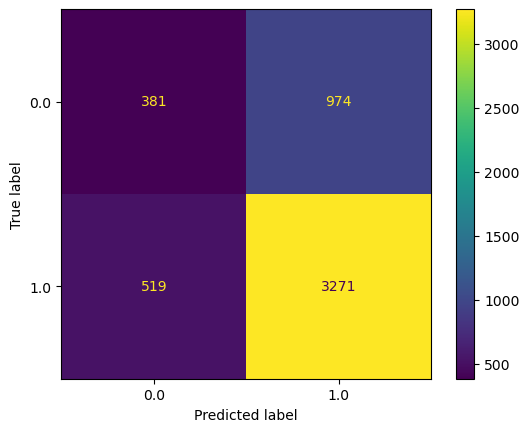

In [407]:
y_train_pred_cats = gnb_bin_cats.predict(X_train_bin_nb_cats)

cm_train = confusion_matrix(y_train_bin_nb_cats, y_train_pred_cats)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                              display_labels=gnb.classes_)
disp.plot()
print("Cats train set:")
plt.show()

For the train sets of both Cats and Dogs instance, we can see significant differences in Naive Bayes performance.

For dogs, the model correctly predicted **680 instances of the "Adopted = 0" class** and **3248 of the "Adopted = 1" class**. However, there were a high number of false negatives (**1166**) and false positives (**1005**), indicating some difficulty in separating the two classes. This reflects the lower training accuracy observed (**64.4%**) and suggests that the dog data has significant overlap between classes.

As for cats, the model performed best in the **"Adopted = 1" class**, correctly predicting **3271** instances, while for **"Adopted = 0"**, it correctly predicted **381** cases. Despite this, false negatives (**519**) and false positives (**974**) are also notable, although to a lesser extent than for dogs. This aligns with the highest accuracy in training for cats (**71%**), indicating that the cat data has characteristics that allow for a clearer separation of classes.

When comparing with the full dataset, the matrix shows that the model had more difficulty, with **890** hits for **"Adopted = 0"** and **6721** for **"Adopted = 1"**, but a very high number of false negatives (**2276**) and false positives (**1357**). This reflects the combined challenges of dog and cat data, resulting in intermediate performance. Comparatively, the cat data offers a more favorable scenario for the model, while the dogs contribute to the greatest difficulty in the combined dataset.

And now lets look at the **confusion matrices for the test sets as well**:

Dogs test set:


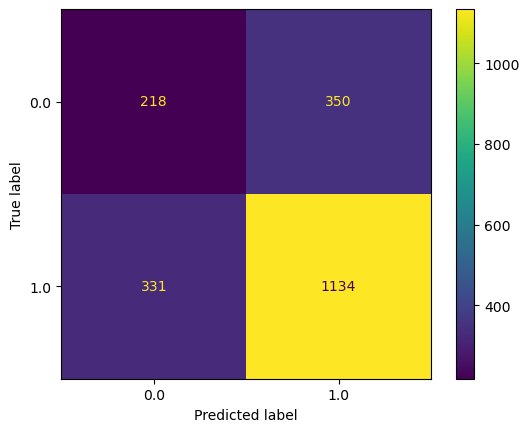

In [411]:
%matplotlib inline
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_test_pred_dogs = gnb_bin_dogs.predict(X_test_bin_nb_dogs)

cm_test = confusion_matrix(y_test_bin_nb_dogs, y_test_pred_dogs)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                              display_labels=gnb.classes_)
disp.plot()
print("Dogs test set:")
plt.show()

Cats test set:


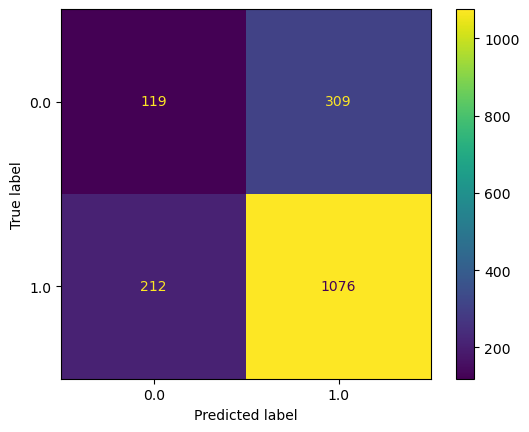

In [413]:
y_test_pred_cats = gnb_bin_cats.predict(X_test_bin_nb_cats)

cm_test = confusion_matrix(y_test_bin_nb_cats, y_test_pred_cats)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                              display_labels=gnb.classes_)
disp.plot()
print("Cats test set:")
plt.show()

The confusion matrices from the test sets reflect similar patterns to those observed in the train sets, but highlight additional challenges due to generalization. In the case of dogs, the model had **218** correct hits for **"Adopted = 0"** and **1134** for **Adopted = 1**, with **350 false positives and 331 false negatives**. These results indicate a notable difficulty in correctly distinguishing instances of the "Adopted = 0" class, similar to the behavior in the train set. High overlap between classes continues to limit performance.

For cats, the model demonstrated greater consistency, with **119** correct hits for **"Adopted = 0"** and **1076** for **Adopted = 1**, while it presented **309 false positives and 212 false negatives**. Compared to dogs, the cat dataset provides a less complex problem for the model, allowing for slightly more effective class separation. This trend is observed in both training and testing, suggesting that the model generalizes better for this group.

When considering the complete dataset, the overall performance is lower due to the combined challenges of the two subsets. The higher proportion of errors indicates that the merging of both groups exacerbates the difficulty of finding a balance between the classes, harming the generalization capacity of the model.

So, for the binary classification, the results of the test set confirm that the dog dataset presents greater difficulty in separating classes, while cats offer better conditions for the model. The complete dataset, in turn, inherits the limitations of both subsets, resulting in a less balanced and less generalizable performance.

##### Multiclass Classification

In [417]:
def load_and_process_data_nb_multiclass_dogs(fname):
    df = pd.read_csv(fname)
    df = df[df['Type'] == 1]
    #Colocar a coluna Name como categórico: 1 se tiver nome, 0 se não tem nome
    df['Name'] = df['Name'].notnull().astype(int)
    #Colocar a coluna Breed como categórico: 1 se tiver for puro, 2 se for misto
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    #Colocar a coluna Color como categórica: 1 se tiver apenas 1 cor, 2 se tiver 2 cores, 3 se tiver 3 cores
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)

    #Alterar os nomes das colunas
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    #Eliminar as colunas que não interessam
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])
    df['AdoptionSpeed'] = df['AdoptionSpeed'].replace({0: 0, 1: 0, 2: 1, 3: 1, 4: 2})
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In [419]:
def load_and_process_data_nb_multiclass_cats(fname):
    df = pd.read_csv(fname)
    df = df[df['Type'] == 2]
    #Colocar a coluna Name como categórico: 1 se tiver nome, 0 se não tem nome
    df['Name'] = df['Name'].notnull().astype(int)
    #Colocar a coluna Breed como categórico: 1 se tiver for puro, 2 se for misto
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    #Colocar a coluna Color como categórica: 1 se tiver apenas 1 cor, 2 se tiver 2 cores, 3 se tiver 3 cores
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)

    #Alterar os nomes das colunas
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    #Eliminar as colunas que não interessam
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])
    df['AdoptionSpeed'] = df['AdoptionSpeed'].replace({0: 0, 1: 0, 2: 1, 3: 1, 4: 2})
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In [421]:
df_mc_nb_dogs, table_X_mc_nb_dogs, table_y_mc_nb_dogs, features_mc_nb_dogs, target_name_mc_nb_dogs = load_and_process_data_nb_multiclass_dogs("PetFinder_dataset.csv")
df_mc_nb_cats, table_X_mc_nb_cats, table_y_mc_nb_cats, features_mc_nb_cats, target_name_mc_nb_cats = load_and_process_data_nb_multiclass_cats("PetFinder_dataset.csv")

In [422]:
gnb_mc2 = GaussianNB()
gnb_mc2

GaussianNB()

In [423]:
X_train_mc_nb_dogs, X_test_mc_nb_dogs, y_train_mc_nb_dogs, y_test_mc_nb_dogs = train_test_split(table_X_mc_nb_dogs, table_y_mc_nb_dogs, random_state=0)
X_train_mc_nb_cats, X_test_mc_nb_cats, y_train_mc_nb_cats, y_test_mc_nb_cats = train_test_split(table_X_mc_nb_cats, table_y_mc_nb_cats, random_state=0)

print("Dogs split: ")
print(X_train_mc_nb_dogs.shape)
print(X_test_mc_nb_dogs.shape)
print("###########################")
print("Cats split: ")
print(X_train_mc_nb_cats.shape)
print(X_test_mc_nb_cats.shape)

Dogs split: 
(6099, 16)
(2033, 16)
###########################
Cats split: 
(5145, 16)
(1716, 16)


In [427]:
gnb_mc_dogs = gnb_mc2.fit(X_train_mc_nb_dogs, y_train_mc_nb_dogs)
gnb_mc_cats = gnb_mc2.fit(X_train_mc_nb_cats, y_train_mc_nb_cats)

Lets look at the probabilites array:

In [430]:
gnb_mc_dogs.predict_proba(X_train_mc_nb_dogs)

array([[5.35697082e-01, 3.32299628e-01, 1.32003291e-01],
       [4.75888739e-01, 3.64710607e-01, 1.59400654e-01],
       [5.60015473e-01, 3.38838695e-01, 1.01145832e-01],
       ...,
       [6.39542521e-01, 1.14011661e-01, 2.46445818e-01],
       [1.60837856e-04, 1.78585904e-01, 8.21253258e-01],
       [2.56237244e-02, 9.11818137e-01, 6.25581391e-02]])

In [432]:
gnb_mc_cats.predict_proba(X_train_mc_nb_cats)

array([[0.60123004, 0.3359287 , 0.06284126],
       [0.74498167, 0.21461662, 0.04040171],
       [0.66309603, 0.24077274, 0.09613123],
       ...,
       [0.64536692, 0.28400141, 0.07063167],
       [0.5630187 , 0.31189586, 0.12508544],
       [0.15618795, 0.43298612, 0.41082594]])

The probabilities for Naive Bayes in multiclass classification show differences in the distribution of predictions between dogs and cats. In the dog dataset, there is a stronger bias towards the **"early adoption" (0)** and **"moderate adoption" (1)** classes, with generally lower probabilities for **"late adoption" (2)**, reflecting more concentrated adoption patterns . In the cats dataset, the chances are more balanced between the three classes, indicating greater diversity in predictions and more complex adoption patterns.

In [435]:
print("Dogs: ")
print("Accuracy on training set:",  gnb_mc_dogs.score(X_train_mc_nb_dogs, y_train_mc_nb_dogs))
print("Accuracy on test set:",  gnb_mc_dogs.score(X_test_mc_nb_dogs, y_test_mc_nb_dogs))
print("#################################")
print("Cats: ")
print("Accuracy on training set:",  gnb_mc_cats.score(X_train_mc_nb_cats, y_train_mc_nb_cats))
print("Accuracy on test set:",  gnb_mc_cats.score(X_test_mc_nb_cats, y_test_mc_nb_cats))

Dogs: 
Accuracy on training set: 0.3844892605345139
Accuracy on test set: 0.3718642400393507
#################################
Cats: 
Accuracy on training set: 0.40641399416909624
Accuracy on test set: 0.3956876456876457


The accuracy results for Naive Bayes in multiclass classification show that the model's performance is limited in all scenarios, but there are relevant differences between the dog and cat datasets and the full dataset, so lets go by parts. 

In the case of dogs, accuracy is the lowest among the three datasets, with **38.4% in training and 37.2% in testing**. This indicates that the model has difficulty capturing patterns in the dog data for the three adoption classes, possibly due to a greater overlap of characteristics between the classes or a less differentiated distribution in the data.

For cats, accuracies are slightly higher than for dogs, with **40.6% in training and 39.6% in testing**. This suggests that the model performs marginally better when dealing with cat data, possibly due to greater consistency in patterns across classes. However, the difference between training and testing accuracies is small, which points to a model that is not capable of generalizing significantly.

When compared to the full dataset, which presents **43.8% in training and 43% in testing**, it is evident that the combination of the two groups provides, somehow, a more robust data set, allowing the model to identify more patterns, even if the performance overall still be modest. Despite this, all accuracies are low, indicating that Naive Bayes may not be the best choice for this problem. The linearity assumed by the model and the complexity of the data may limit your ability to efficiently distinguish between the three adoption classes.

For the **confusion matrices for the train sets**:

Dogs train set:


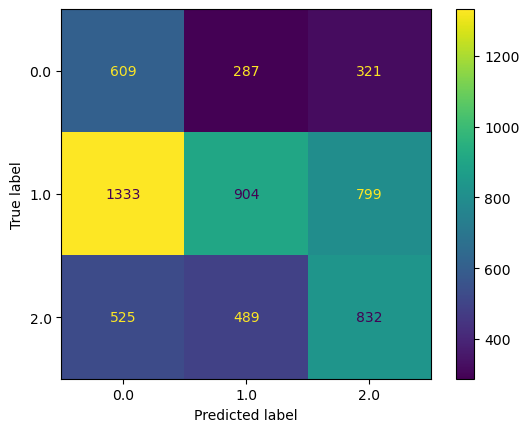

In [437]:
y_train_pred_nb_dogs = gnb_mc_dogs.predict(X_train_mc_nb_dogs)

cm_train = confusion_matrix(y_train_mc_nb_dogs, y_train_pred_nb_dogs)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                              display_labels=gnb_mc_dogs.classes_)
print("Dogs train set:")
disp.plot()
plt.show()

Cats train set:


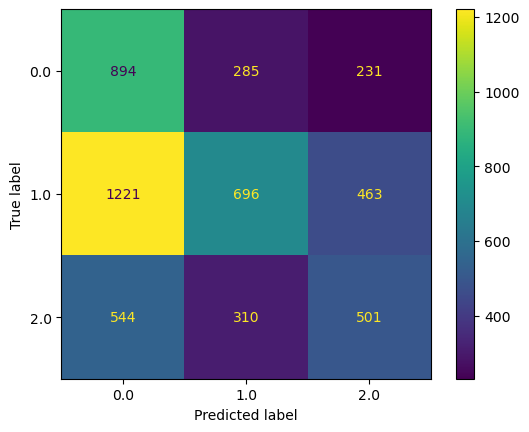

In [439]:
y_train_pred_nb_cats = gnb_mc_cats.predict(X_train_mc_nb_cats)

cm_train = confusion_matrix(y_train_mc_nb_cats, y_train_pred_nb_cats)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                              display_labels=gnb_mc_cats.classes_)
print("Cats train set:")
disp.plot()
plt.show()

For dogs, **AdoptionSpeed = 0** (early adoption) had 609 correctly classified instances, but 287 were confused with **AdoptionSpeed = 1** and 321 with **AdoptionSpeed = 2**. This suggests that the separation between early and other adoptions is not effective. Class 1 (moderate adoption) had 904 correct predictions, but was significantly confounded with class 0 (1,133 instances) as well as class 2 (799 instances). As for class 2 (no adoption), although it had 832 correct predictions, 525 instances were assigned to class 0 and 489 to class 1. These results indicate that the model has difficulties in capturing the specific characteristics of each class, especially for adjacent classes. .

For cats, the situation is similar, but with some differences. Class 0 had 894 instances correctly classified, while 285 were confused with class 1 and 231 with class 2. Class 1 had 696 instances correctly identified, but it also recorded many errors, with 1,221 and 463 incorrect predictions in classes 0 and 2 , respectively. Class 2 achieved 501 correct predictions, but saw 544 instances incorrectly assigned to class 0 and 310 to class 1. Although cats show greater overall accuracy in class 0 classification, the model still demonstrates significant difficulties in differentiating features between classes, especially between classes 1 and 2.

Comparing with the complete dataset, it is noted that the latter's confusion matrices present a similar pattern, but with slightly better performance in all classes. For example, in class 0, the model was able to correctly classify 1,141 instances, but still confused many with classes 1 (985) and 2 (490). In class 1, 2,663 instances were correctly assigned, but there was significant confusion with classes 0 (1,691) and 2 (1,108). Finally, for class 2, 1,125 predictions were correct, but the model confused 762 instances with class 0 and 1,279 with class 1.

In short, the analyzes show that, regardless of the data set, Naive Bayes faces substantial difficulties in separating the three adoption classes. This can be explained by overlapping characteristics between classes and the assumption of model independence, which does not always reflect the reality of the data. The lower performance on dog and cat datasets, when compared to the full dataset, suggests that a more diverse dataset may help the model capture clearer patterns.

Finally, for the **confusion matrices of the test sets**:

Dogs test set:


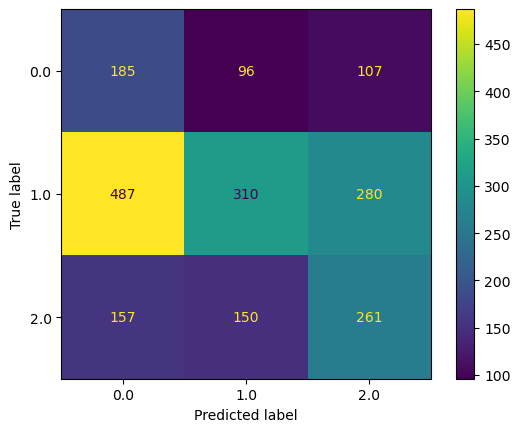

In [443]:
y_test_pred_nb_dogs = gnb_mc_dogs.predict(X_test_mc_nb_dogs)

cm_test = confusion_matrix(y_test_mc_nb_dogs, y_test_pred_nb_dogs)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                              display_labels=gnb_mc_dogs.classes_)
print("Dogs test set:")
disp.plot()
plt.show()

Cats test set:


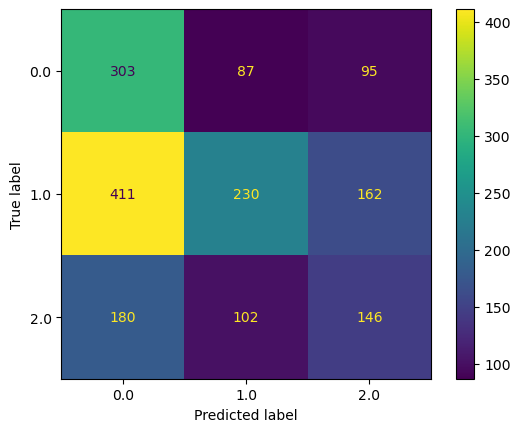

In [445]:
y_test_pred_nb_cats = gnb_mc_cats.predict(X_test_mc_nb_cats)

cm_test = confusion_matrix(y_test_mc_nb_cats, y_test_pred_nb_cats)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                              display_labels=gnb_mc_cats.classes_)
print("Cats test set:")
disp.plot()
plt.show()

The confusion matrices of the test sets reflect again the difficulties of Naive Bayes in distinguishing classes. 

For dogs, **AdoptionSpeed = 0** (early adoption) had 185 correct predictions, but presented significant confusion with **AdoptionSpeed = 1** and **AdoptionSpeed = 2**. Class 1 (moderate adoption) had 310 correct predictions, but high levels of error with adjacent classes, while class 2 (no adoption) had only 261 correct predictions. These errors indicate a strong feature overlap between classes.

In cats, similar patterns emerge: class 0 had 303 correct predictions, but significant confusions with classes 1 and 2. Class 1, with 230 hits, was the most problematic, and class 2 had only 146 correct predictions, also affected. for substantial confusion.

Compared to the full dataset, the pattern of errors is consistent, but the overall performance is slightly higher in the full set, indicating that the division by species may have reduced the model's ability to identify patterns. The results reinforce the limitations of Naive Bayes for multiclass scenarios with overlapping characteristics, suggesting the need for more advanced models.

## 1.3. Classification - Final Discussion and Conclusions 

In this phase, we will use the **cross-validation method**, implemented in the **Orange** tool, to systematically evaluate the performance of all models developed to date. Cross-validation allows dividing the dataset into multiple subsets (folds), where the model is trained on some of these and tested on the others, ensuring a more robust and generalizable evaluation of the results. This method is particularly useful for identifying consistent performance patterns and reducing the risk of overfitting or underfitting by providing reliable metrics to compare different models in terms of accuracy, robustness and suitability for the problem at hand.

Here are the results of the cross-validation, for **Decision Trees**, **Naive Bayes** and **KNN**

For **Binary Classification**:

<img src="imagens/cross-validation-binary.png" alt="cross-validation-binary"/>

For **Multiclass Classification**:

<img src="imagens/cross-validation-multiclass.png" alt="cross-validation-multiclass"/>

The results of the 10-fold cross-validation method, applied to models developed to predict animal adoption, provide detailed insights into the performance of different algorithms for binary and multi-class classification tasks. These results are particularly relevant considering the size of the dataset (almost 15,000 entries) and overall the various features used, which include characteristics related to the animal, as well as contextual information.

Let's first analyze the results of each classifier individually. About the **Binary Classification**:
* In the binary classification (adoption vs. no adoption), the **KNN model with K = 15 stood out with an accuracy of 72.1%**, presenting the **best performance** among the tested algorithms. The other KNN models **K = 3 and K = 7 also had solid performances (69.7% and 71.6%, respectively)**, which suggests that **KNN adapts well to this problem by taking advantage of the similarities between nearby data to predict the classes**.

* **Naive Bayes presented an accuracy of 70.5%, standing out for its ability to deal with multiple categorical features** and assume conditional independence between them. This approach proved to be competitive, considering the simplicity of the model.

* **Decision Trees, with an accuracy of 67.7%, were below other methods**. This performance can be explained by a **greater susceptibility to overfitting**, especially in datasets with many categorical attributes and complex interactions.

Overall, the results for binary classification reflect moderate performance, with accuracy above **67% across all models**. The use of detailed features such as `Age`, `MaturitySize` and `Health` appears to have contributed significantly to performance by capturing the most obvious differences between animals that are more or less likely to be quickly adopted.

About the **Multiclass Classification**:
* In multi-class classification (early, moderate and late adoption), **overall accuracy was considerably lower than in binary classification**, with **Naive Bayes leading with 49.6% accuracy**. This result reflects the additional difficulties associated with separating three classes, especially when they share overlapping characteristics.

* The **KNN models presented slightly lower results, with K = 15 achieving 48.8% accuracy**, followed by **K = 7 with 47.3%** and **K = 3 with 44.3%**. The reduction in accuracy for smaller K can be attributed to a greater sensitivity to outliers and variability in the data, while **K = 15 appears to better balance the relationship between bias and variance**.

* The Decision Trees, with an accuracy of **45.8%, again showed limited performance, possibly due to the complexity of the interactions between the features**. However, **the fact that no model exceeded 50% reflects the intrinsic difficulty of the problem**, where the factors that differentiate moderate from late adoption, for example, are more subtle and less easily captured by the available features.

In sum, the results indicate that **binary classification is significantly more accurate than multiclass, in full dataset**. This difference is not surprising given that the task of separating two classes (being and not being adopted) is simpler than differentiating between three levels of adoption. Overlap in the characteristics that define classes 1 (moderate adoption) and 2 (late adoption) appears to have been the main obstacle to the models.

Furthermore, the size of the dataset contributes to the moderate performance in both scenarios. Although the size is adequate for model generalization, the nature of the categorical features may have limited its ability to capture nuances between classes. Including more granular information or temporal metrics, such as average time to adoption, could improve performance.

Despite the limitations noted, the results obtained reflect a solid starting point for predicting animal adoption. Models such as KNN and Naive Bayes have shown competitive performances, but further improvements can be explored.

Lets now separate between Dogs and Cats:

For **Binary Classification with Dogs Instances**:

<img src="imagens/cross-validation-binary-dogs.png" alt="cross-validation-binary-dogs.png"/>

For **Binary Classification with Cats Instances**:

<img src="imagens/cross-validation-binary-cats.png" alt="cross-validation-binary-cats.png"/>

For **MultiClass Classification with Dogs Instances**:

<img src="imagens/cross-validation-multiclass-dogs.png" alt="cross-validation-multiclass-dogs.png"/>

For **MultiClass Classification with Cats Instances**:

<img src="imagens/cross-validation-multiclass-cats.png" alt="cross-validation-multiclass-cats.png"/>

When dividing the dataset between dogs and cats, it offers important insights into how different classification models behave when dealing with subsets of the original dataset. The split reveals interesting differences in accuracy for both binary and multiclass classification and allows a direct comparison with previous results using the full dataset. The analysis focuses on the performance of the models in predicting animal adoption, using the same detailed features and a dataset with relevant dimensions: **8,132 entries for dogs and 6,851 for cats**.

About the **Binary Classification for Dogs**:
* In the binary classification for dogs (adopted vs. no adoption), the **KNN model with K = 15 showed the best accuracy (71.1%)**, followed by **K = 7 (70.4%) and K = 3 (68.8%)**.
* **Naive Bayes also performed solidly (69.3%)**, beating **Decision Trees, which achieved 67.3%**. The results reflect **KNN's ability to explore local relationships in data**, with K = 15 being able to better balance the relationship between bias and variance by smoothing out the effects of outliers.
* Despite this, **Decision Trees lagged behind**, indicating limitations in their ability to generalize across a dataset that may contain more complex interactions between features. This may be particularly relevant for dogs, where factors such as size (`MaturitySize`), coat type (`FurLength`), and rate of vaccination or sterilization can vary widely between instances and impact chances of adoption.

Whem comparing with the full dataset, **the results for dogs are slightly lower than the best model** in the combined dataset (72.1% with K = 15), suggesting that the separation by species may have reduced the richness of information available for the models, but it also allowed for a greater focus on the specific characteristics of dogs.

Moving to **Binary Classification for Cats**:
* The **KNN with K = 15 was again the best model**, reaching 73.9% accuracy, followed by K = 7 (72.3%) and K = 3 (70.8%) .
* **Naive Bayes also performed remarkably well**, with 72.1%, outperforming the performance for dogs and the full dataset.
* **Decision Trees, however, came in last**, with just 67%.

These results indicate that specific cat characteristics, such as `MaturitySize` or `Color`, **may be more homogeneous or predictable in terms of impact on adoption**, which favors probabilistic methods such as Naive Bayes and proximity-based algorithms such as KNN. In contrast, **the performance of Decision Trees again reflects the difficulty in capturing subtle relationships between categorical variables in this context**.
The superiority of the results for cats compared to dogs, and also with the complete dataset, suggests that separation by species may be more beneficial for cats, **possibly because their characteristics and adoption patterns form better-defined clusters in the data**.

Now, for **MultiClass Classification for Dogs**:
* **Naive Bayes was the most accurate model (52.1%)**;
* Followed by **KNN with K = 15 (50.4%) and K = 7 (49.7%)**;
* **Decision Trees were again behind**, with 47.9%, indicating limited performance when dealing with the greater complexity of the multiclass problem.

The multiclass results for dogs are higher than those obtained in the full dataset (45.8% for Decision Trees and 49.6% for Naive Bayes), suggesting that **the division by species may have helped the models identify clearer patterns within classes**. However, **accuracy is still limited**, reflecting the **difficulty in distinguishing between moderate and late adoption, which likely share many characteristics in common**.

Finally, for **MultiClass Classification for Cats**:
* **Naive Bayes also led with 47.6%**;
* Followed by KNN with K = 15 (46.2%) and K = 7 (43.8%);
* **Decision Trees performed the worst (42.2%)**. As with the binary results, the multiclass models for cats presented lower accuracies than those for dogs, but close to those of the full dataset.

The lower performance for cats compared to dogs may reflect greater difficulty in capturing variation across adoption classes for cats, especially as their characteristics tend to be more homogeneous. This homogeneity, while beneficial for binary classification, can make it difficult to separate into three categories.


To conclude, when comparing the results of the two datasets (dogs and cats) with the full dataset, it is evident that **species segmentation brought benefits in binary classification, especially for cats**, but had a more **modest impact in multiclass classification**. This pattern reflects the importance of exploring subgroup-specific strategies, but also highlights the challenges of dealing with more complex classes.
One thing to notice is that none of the models tested managed to exceed 73.9% accuracy in binary classification or 52.1% in multiclass, indicating limitations in the chosen algorithms and in the representativeness of the features. Also, the choice of categorical resources and the possible existence of imbalances in adoption classes may have negatively influenced the results.

## Task 2 (Unsupervised Learning) - Charactering Pets and their Adoption Speed

In this task we will **use unsupervised learning to characterize pets and their adoption speed**. We will have 2 clustering:

1. **Clustering algorithms to find similar groups of adopted pets.** When animals are adopted, is it possible to find groups of pets with the same/similar adoption speed? Then, we will evaluate clustering results using **internal and external metrics**.
2. **We will also be creative and define and explore our own unsupervised learning task!**

## 2.1. Preprocessing Data for Clustering

Lets go back to our first preprocessing data (with numerical features) and use it to see if there are correlations or whether or not intervals in numerical categories influence clusters

In [470]:
def load_and_process_data(fname):
    df = pd.read_csv(fname)
    #Colocar a coluna Name como categórico: 1 se tiver nome, 0 se não tem nome
    df['Name'] = df['Name'].notnull().astype(int)
    #Colocar a coluna Breed como categórico: 1 se tiver for puro, 2 se for misto
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    #Colocar a coluna Color como categórica: 1 se tiver apenas 1 cor, 2 se tiver 2 cores, 3 se tiver 3 cores
    df['Color1'] = df.apply(lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                                      2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                                      3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0, axis=1)

    #Alterar os nomes das colunas
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    #Eliminar as colunas que não interessam
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'State', 'Breed2', 'Color2', 'Color3'])
    nc = df.shape[1]  # Number of columns
    matrix = df.values  # Convert dataframe to numpy array
    table_X = matrix[:, 0:nc-1]  # Get features
    table_y = matrix[:, nc-1]  # Get target (last column)
    features = df.columns.values[0:nc-1]  # Get feature names
    target = df.columns.values[nc-1]  # Get target name
    return df, table_X, table_y, features, target

In [472]:
new_df, new_table_X, new_table_y, updated_features, updated_target_name = load_and_process_data("PetFinder_dataset.csv")

## 2.2. Learning and Evaluating Clusterings

### 2.2.1. KMeans

With our data preprocessed, let’s use first **Kmeans** to explore the underlying structure of the dataset, by **clustering the animals into groups based on their features**. Kmeans is an unsupervised learning algorithm that partitions data into **K** clusters by minimizing the within-cluster variance. This approach will help identify patterns or similarities among the animals that could provide insights into their adoption profiles, such as shared characteristics influencing adoption speed.

Let's try with an **K equal to 7**, since there are 5 targets for our dataset and we should always choose an odd number for our K to avoid ties in cluster assignments. While **5** might seem like an obvious choice due to the number of targets, selecting 7 can help capture more nuance and variations within the data, especially if there are hidden patterns that could create additional natural groupings. We can also try with different values of K to determine the optimal number of clusters through methods like the silhouette score, but starting with a number like 7 allows us to capture a broader range of potential clusters.

We will also try the first preprocessed dataset (**load_and_process_data**) with the numerical features, to see the range of this classifiers

In [478]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=0, n_init='auto')
kmeans

KMeans(n_clusters=7, n_init='auto', random_state=0)

In [480]:
kmeans = kmeans.fit(new_table_X)

Let's now visualize the cluster's centers:

In [483]:
kmeans.cluster_centers_

array([[1.47011662e+00, 9.08244250e-01, 6.25016197e+00, 1.27421445e+00,
        1.80798510e+00, 2.01336249e+00, 1.84637188e+00, 1.42055394e+00,
        1.78425656e+00, 1.60301263e+00, 1.94954649e+00, 1.03393262e+00,
        1.64204730e+00, 5.83171364e-01, 5.63654033e-02, 3.91804341e+00],
       [1.60292683e+00, 9.53170732e-01, 9.07219512e+00, 1.33853659e+00,
        1.69951220e+00, 2.00682927e+00, 1.90926829e+00, 1.50439024e+00,
        1.53951220e+00, 1.32682927e+00, 1.82146341e+00, 1.02146341e+00,
        1.40390244e+00, 7.43580488e+01, 5.46341463e-02, 4.07512195e+00],
       [1.37351779e+00, 9.52569170e-01, 1.69861660e+01, 1.41699605e+00,
        1.61857708e+00, 1.91304348e+00, 1.88142292e+00, 1.84189723e+00,
        1.44071146e+00, 1.27075099e+00, 1.69762846e+00, 1.02964427e+00,
        1.23320158e+00, 1.91622530e+02, 1.06719368e-01, 4.21343874e+00],
       [1.30000000e+00, 9.20000000e-01, 1.60200000e+01, 1.29000000e+00,
        1.62000000e+00, 1.83000000e+00, 2.11000000e+00, 2.070

We know that each index of **kmeans.cluster_centers_** represents a cluster, and the values correspond to the **centroids** of that cluster in the feature space. Each centroid is essentially the mean value of all data points that belong to the respective cluster for each feature. By analyzing these centroids, we can gain insights into the general characteristics of each cluster.

For instance, lets analyse the first cluster of this array:

In [487]:
kmeans.cluster_centers_[0]

array([1.47011662, 0.90824425, 6.25016197, 1.27421445, 1.8079851 ,
       2.01336249, 1.84637188, 1.42055394, 1.78425656, 1.60301263,
       1.94954649, 1.03393262, 1.6420473 , 0.58317136, 0.0563654 ,
       3.91804341])

Here we can see that, for this cluster, the mean value of **Type** is 1.47. This means that we have probably the same number of Dogs and Cats on this cluster, but that's something we concluded on the Task 0. The mean **Age** of this group is about 6 months, the mean number of **Colors** of this group is 2 colors, etc.

Now, lets distribute the clusters, using **kmeans.labels_**.

The **kmeans.labels_** variable contains the cluster labels assigned to each pet.

In [491]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0])

Let's now see how each animal was assigned to a specific cluster:

In [494]:
for n in range(len(new_table_y)):
    print("label ", kmeans.labels_[n], " --> adoption speed: ", new_table_y[n])

label  1  --> adoption speed:  2.0
label  0  --> adoption speed:  0.0
label  0  --> adoption speed:  3.0
label  2  --> adoption speed:  2.0
label  0  --> adoption speed:  2.0
label  0  --> adoption speed:  2.0
label  5  --> adoption speed:  1.0
label  0  --> adoption speed:  3.0
label  0  --> adoption speed:  1.0
label  0  --> adoption speed:  4.0
label  0  --> adoption speed:  1.0
label  1  --> adoption speed:  1.0
label  0  --> adoption speed:  2.0
label  0  --> adoption speed:  1.0
label  0  --> adoption speed:  2.0
label  6  --> adoption speed:  4.0
label  0  --> adoption speed:  3.0
label  0  --> adoption speed:  4.0
label  0  --> adoption speed:  2.0
label  0  --> adoption speed:  4.0
label  0  --> adoption speed:  2.0
label  0  --> adoption speed:  4.0
label  0  --> adoption speed:  4.0
label  0  --> adoption speed:  4.0
label  0  --> adoption speed:  1.0
label  0  --> adoption speed:  2.0
label  0  --> adoption speed:  1.0
label  0  --> adoption speed:  2.0
label  0  --> adopti

Since there's almost 15000 animals, we can´t read almost 15000 lines in this format.

Lets create a DataFrame for that purpose:

In [496]:
cluster_labels = pd.DataFrame({'Cluster': kmeans.labels_, 'AdoptionSpeed': new_table_y})
cluster_distribution = cluster_labels.groupby('Cluster')['AdoptionSpeed'].value_counts().unstack()
cluster_distribution

AdoptionSpeed,0.0,1.0,2.0,3.0,4.0
Cluster,,,,,
0,347.0,2572.0,3385.0,2717.0,3327.0
1,20.0,205.0,250.0,202.0,348.0
2,12.0,102.0,125.0,102.0,165.0
3,5.0,22.0,35.0,18.0,20.0
4,NaN,1.0,NaN,1.0,NaN
5,6.0,54.0,61.0,48.0,55.0
6,20.0,134.0,181.0,171.0,282.0


With this, we can now draw some conclusions:

With this dataframe, we can see that it is on `Cluster 0` that the majority of animals are, with a total of **12 348** animals, distributed across all **AdoptionSpeed** categories, except a few on value **AdoptionSpeed = 0**, indicating a diverse representation within this cluster. `Cluster 1` and `Cluster 2` show a similar distribution pattern but on a much smaller scale, suggesting fewer animals in these clusters overall. 

`Cluster 3` has a very small representation across categories, with fewer total animals, highlighting it as a small group. `Cluster 4` stands out with **NaN** values in most categories, indicating that only a very limited subset of animals with **AdoptionSpeed = 1** and **3** is represented in this cluster. `Clusters 5` and `Cluster 6` show slightly more balanced distributions, but `Cluster 6` has a notably higher concentration in the **AdoptionSpeed** 4 category.

This distribution suggests that `Cluster 0` is the dominant group, while `Cluster 3` and `Cluster 4` are the most specialized or outlier-like in terms of **AdoptionSpeed**.

Lets take a closer look at `Cluster 0`, when the **Adoption Speed** is equal to **0** as well. Meaning, lets see if the animals on this Cluster, that are adopted day one, have the same features:

In [498]:
cluster_0_indices = cluster_labels[cluster_labels['Cluster'] == 0].index
cluster_0_data = new_df.iloc[cluster_0_indices]
cluster_0_speed_0_data = cluster_0_data[cluster_0_data['AdoptionSpeed'] == 0]

print("Cluster 0 and AdoptionSpeed = 0:")

for feature in cluster_0_speed_0_data.columns:
    if feature != 'AdoptionSpeed':  # Ignorar a coluna alvo
        feature_counts = cluster_0_speed_0_data[feature].value_counts()
        print(f"\n{feature}:")
        for value, count in feature_counts.items():
            print(f"{value}: {count} animals")

Cluster 0 and AdoptionSpeed = 0:

Type:
2: 216 animals
1: 131 animals

Name:
1: 325 animals
0: 22 animals

Age:
2: 109 animals
1: 46 animals
3: 39 animals
12: 30 animals
4: 22 animals
6: 17 animals
24: 12 animals
0: 10 animals
18: 7 animals
36: 7 animals
5: 6 animals
7: 6 animals
9: 5 animals
14: 4 animals
10: 4 animals
8: 4 animals
11: 3 animals
30: 2 animals
13: 2 animals
28: 2 animals
15: 2 animals
17: 2 animals
21: 1 animals
19: 1 animals
27: 1 animals
23: 1 animals
22: 1 animals
16: 1 animals

Breed:
1: 216 animals
2: 131 animals

Gender:
2: 168 animals
1: 135 animals
3: 44 animals

Color:
2: 139 animals
3: 119 animals
1: 89 animals

MaturitySize:
2: 196 animals
1: 116 animals
3: 33 animals
4: 2 animals

FurLength:
1: 175 animals
2: 128 animals
3: 44 animals

Vaccinated:
2: 188 animals
1: 108 animals
3: 51 animals

Dewormed:
1: 155 animals
2: 141 animals
3: 51 animals

Sterilized:
2: 235 animals
3: 61 animals
1: 51 animals

Health:
1: 333 animals
2: 13 animals
3: 1 animals

Quanti

Here, we see that on **Cluster 0 with AdoptionSpeed = 0**, its groups: 
* mostly Cats (216 cats);
* mostly with a name associated (Name = 1);
* mostly with an age below 4 months;
* mostly Healthy (Health = 1);
* almost everyone with Fee = 0;
* almost everyone with 0 videos uploaded;

So, it is safe to say that this cluster groups the animals with **Fee = 0** and with no videos uploaded **(VideoAmt = 0)**? 
Lets check the `Cluster 0` at all:

In [500]:
cluster_0_indices = cluster_labels[cluster_labels['Cluster'] == 0].index
cluster_0_data = new_df.iloc[cluster_0_indices]

print("Cluster 0:")

for feature in updated_features:
    feature_counts = cluster_0_data[feature].value_counts()
    print(f"\n{feature}:")
    for value, count in feature_counts.items():
        print(f"{value}: {count} animals")

Cluster 0:

Type:
1: 6543 animals
2: 5805 animals

Name:
1: 11215 animals
0: 1133 animals

Age:
2: 3182 animals
1: 2157 animals
3: 1728 animals
4: 942 animals
12: 852 animals
24: 540 animals
5: 515 animals
6: 476 animals
36: 338 animals
8: 253 animals
7: 233 animals
0: 172 animals
9: 157 animals
10: 134 animals
18: 131 animals
11: 77 animals
15: 66 animals
14: 63 animals
17: 44 animals
30: 43 animals
13: 35 animals
16: 33 animals
20: 26 animals
21: 22 animals
29: 18 animals
19: 18 animals
22: 16 animals
27: 15 animals
32: 12 animals
26: 10 animals
28: 9 animals
25: 7 animals
31: 7 animals
23: 6 animals
34: 4 animals
37: 3 animals
33: 2 animals
35: 1 animals
38: 1 animals

Breed:
1: 8962 animals
2: 3386 animals

Gender:
2: 5989 animals
1: 4365 animals
3: 1994 animals

Color:
2: 5073 animals
3: 3720 animals
1: 3555 animals

MaturitySize:
2: 8708 animals
1: 2779 animals
3: 840 animals
4: 21 animals

FurLength:
1: 7583 animals
2: 4337 animals
3: 428 animals

Vaccinated:
2: 6528 animals
1: 

`Cluster 0` groups **12 348 animals**, (about **82%** of the data), so, it means that most of our data belongs to this group, indicating it captures a broad range of features among the animals.

We can see that the dominant features, that have the most animals are:
* Name = 1
* Age <= 4 Months
* Breed = 1
* MaturitySize = 2
* FurLength = 1
* Sterilized = 2
* Health = 1
* Quantity < 2
* Fee = 0
* VideoAmt = 0

Lets look again at each one of the cluster centers and their average values:

### Cluster 0:

In [505]:
print("Cluster 0: ")
for i, feature in enumerate(updated_features):
    print(f"{feature} : {kmeans.cluster_centers_[0][i]}")

Cluster 0: 
Type : 1.4701166180758012
Name : 0.908244250080985
Age : 6.250161969549634
Breed : 1.2742144476838353
Gender : 1.8079850988014252
Color : 2.013362487852284
MaturitySize : 1.8463718820861674
FurLength : 1.4205539358600596
Vaccinated : 1.7842565597667652
Dewormed : 1.6030126336248798
Sterilized : 1.9495464852607711
Health : 1.0339326206673145
Quantity : 1.642047295108517
Fee : 0.5831713637834
VideoAmt : 0.056365403304178725
PhotoAmt : 3.9180434078393267


**Cluster 0:**
This cluster seems to have lower values in the majority of the features. For instance, it has a value 6.25 on the Age and 0.58 on the Fee feature, meaning that this cluster groups animals with an low age, no fee and no video amount

### Cluster 1:

In [509]:
print("Cluster 1: ")
for i, feature in enumerate(updated_features):
    print(f"{feature} : {kmeans.cluster_centers_[1][i]}")

Cluster 1: 
Type : 1.602926829268292
Name : 0.953170731707317
Age : 9.072195121951225
Breed : 1.3385365853658537
Gender : 1.6995121951219512
Color : 2.006829268292683
MaturitySize : 1.9092682926829267
FurLength : 1.504390243902439
Vaccinated : 1.5395121951219508
Dewormed : 1.326829268292684
Sterilized : 1.8214634146341466
Health : 1.0214634146341464
Quantity : 1.4039024390243906
Fee : 74.35804878048788
VideoAmt : 0.05463414634146348
PhotoAmt : 4.075121951219511


**Cluster 1:**
On this Cluster, we see immediately that the Age and Fee features are bigger than on the Cluster 0. This means that:
* This group contains animals slightly older, with an higher Fee;
* Also, the other Numerical features, such as the Video amount, Photo amount and Quantity stays pratically the same;
* We can also see that this cluster groups slightly more Cats than Dogs;
* More animals in this cluster are slightly more Dewormed than on Cluster 0;

### Cluster 2:

In [513]:
print("Cluster 2: ")
for i, feature in enumerate(updated_features):
    print(f"{feature} : {kmeans.cluster_centers_[2][i]}")

Cluster 2: 
Type : 1.3735177865612647
Name : 0.9525691699604744
Age : 16.986166007905148
Breed : 1.41699604743083
Gender : 1.6185770750988144
Color : 1.9130434782608694
MaturitySize : 1.8814229249011856
FurLength : 1.8418972332015815
Vaccinated : 1.4407114624505928
Dewormed : 1.270750988142293
Sterilized : 1.697628458498024
Health : 1.0296442687747036
Quantity : 1.2332015810276684
Fee : 191.62252964426884
VideoAmt : 0.10671936758893281
PhotoAmt : 4.213438735177865


**Cluster 2:**
Here, we can see that the Age features increases again, which means that this cluster groups animals even older that the previous cluster. Also, the Fee has increased as well for almost 200 (units).
For the rest of the numerical features, we see pratically no big changes. For the categorical features, we can see that:
* This cluster has more dogs than cats
* This cluster has more animals with Fur Length of 2 (Medium)

### Cluster 3:

In [517]:
print("Cluster 3: ")
for i, feature in enumerate(updated_features):
    print(f"{feature} : {kmeans.cluster_centers_[3][i]}")

Cluster 3: 
Type : 1.3
Name : 0.92
Age : 16.020000000000003
Breed : 1.29
Gender : 1.62
Color : 1.83
MaturitySize : 2.11
FurLength : 2.07
Vaccinated : 1.32
Dewormed : 1.16
Sterilized : 1.86
Health : 1.01
Quantity : 1.12
Fee : 577.6600000000001
VideoAmt : 0.010000000000000002
PhotoAmt : 3.58


**Cluster 3:**
Its very similar to Cluster 2, but instead, is has a lower average value on the Age feature, but with an increase Fee.

### Cluster 4:

In [521]:
print("Cluster 4: ")
for i, feature in enumerate(updated_features):
    print(f"{feature} : {kmeans.cluster_centers_[4][i]}")

Cluster 4: 
Type : 1.0
Name : 1.0
Age : 14.0
Breed : 1.0
Gender : 2.0
Color : 2.5
MaturitySize : 2.5
FurLength : 1.5
Vaccinated : 2.0
Dewormed : 2.0
Sterilized : 3.0
Health : 1.0
Quantity : 1.5
Fee : 2500.0
VideoAmt : 0.0
PhotoAmt : 4.0


**Cluster 4:** On cluster 4, we only have 2 animals, as checked on the dataframe above. Here, we can see that the 2 animals in this cluster are both Dogs, with a Name, not sure if Sterilized, Healthy and with a Fee of 2000 and 3000 (units).

### Cluster 5:

In [525]:
print("Cluster 5: ")
for i, feature in enumerate(updated_features):
    print(f"{feature} : {kmeans.cluster_centers_[5][i]}")

Cluster 5: 
Type : 1.2366071428571428
Name : 0.9553571428571429
Age : 23.111607142857153
Breed : 1.2767857142857144
Gender : 1.5937500000000002
Color : 1.7901785714285712
MaturitySize : 1.8973214285714286
FurLength : 1.90625
Vaccinated : 1.3482142857142858
Dewormed : 1.299107142857143
Sterilized : 1.6830357142857144
Health : 1.0491071428571428
Quantity : 1.1473214285714288
Fee : 333.58482142857144
VideoAmt : 0.03571428571428575
PhotoAmt : 3.8705357142857144


**Cluster 5:** 
This cluster groups the animals older than on all the previous Clusters. 
O índice 2 (23.11) e 13 (333.58) são mais baixos do que em Clusters 2 e 3, mas ainda altos em relação ao Cluster 0.

### Cluster 6:

In [529]:
print("Cluster 6: ")
for i, feature in enumerate(updated_features):
    print(f"{feature} : {kmeans.cluster_centers_[6][i]}")

Cluster 6: 
Type : 1.2106598984771568
Name : 0.9467005076142132
Age : 69.58121827411154
Breed : 1.2487309644670053
Gender : 1.5494923857868017
Color : 1.813451776649746
MaturitySize : 1.9898477157360406
FurLength : 1.7131979695431474
Vaccinated : 1.4961928934010151
Dewormed : 1.4746192893401018
Sterilized : 1.6903553299492389
Health : 1.1027918781725887
Quantity : 1.1662436548223354
Fee : 1.120558375634566
VideoAmt : 0.04568527918781733
PhotoAmt : 3.031725888324871


**Cluster 6:**
Here, we can see that the oldest of the animals are grouped in this Cluster, mas we can see as well that the Fee is the smallest of all clusters.

### Conclusion for K = 7:

By applying the KMeans algorithm with **K = 7**, the dataset of animals was partitioned into seven distinct clusters. The clustering revealed several insights about the dataset's structure and the characteristics of the animals in each cluster:
* `Cluster 0`  contains the vast majority of the animals, as described above. This cluster groups the younger animals (**Age** < 6 months) with a **Fee = 0**. These features may likely make animals being adopted more fast than others, as indicated by their higher representation in the data. The remaining Clusters (`Cluster 1`, `Cluster 2`, `Cluster 3`, `Cluster 4`, `Cluster 5` and `Cluster 6`) represent smaller and more specific subgroups of animals with varying attributes, such as older **Age**, higher **Fees**, or different **Health** and **Sterilization** statuses.

This also makes Numerical Features a more important factor in clustering. **Age**, **Quantity**, **Fee**, **VideoAmt**, and **PhotoAmt** have a significant impact on the clustering and this is evidenced by the distinct values of these features across clusters:
* For example, `Cluster 6` has animals with the highest average **Age** (approximately 69 months), indicating that older animals form a distinct group.
* Also, clusters with higher **Fee** values (e.g., `Cluster 4` that only has 2 animals, but the two of them have an average **Fee** of 2500) are distinct and represent a smaller portion of the dataset.
* The feature **Quantity** also plays a role, especially in differentiating clusters where animals are grouped in larger quantities, which could affect their adoption rates.

About the target (**AdoptionSpeed**), we can also see that:
* `Cluster 0`, which groups younger animals with no fees, shows a relatively balanced distribution across adoption speeds, with notable representation in the faster adoption categories (**AdoptionSpeed 0** and **1**).
* Clusters with older animals (e.g., `Cluster 6`) or higher fees (e.g., `Cluster 4`) tend to have fewer instances of faster adoption speeds, highlighting potential barriers to adoption.
* Finally, clusters with very small sizes (e.g., `Cluster 4` and `Cluster 5`) may not provide robust statistical insights but still underline specific groups in the data.

To conclude, `Cluster 0` domain indicates a possible bias in the dataset in favor of young and no-fee animals, which may limit the generalization of results to less common profiles. Numerical characteristics, such as **Age** and **Fee**, proved to be crucial factors in cluster formation and adoption speed, suggesting that they should be considered in future analyses.

### Evaluation of Kmeans

Now, lets evaluate the cohesion and separation of our clusters.

For this, we'll use the **Silhouette Score** of our clusters, with our chosen K. The Silhouette Score is a metric for evaluating the quality of a cluster model. It measures how well each point in a cluster is grouped by comparing the average intra-cluster distance with the average distance to the nearest cluster points, and the values varies between -1 and 1.

If the Silhouette Score is 1, it indicates that the clusters are well separated and compact.
If it is 0, it indicates overlap between clusters.
In the last case, which are negative values, it indicates that the points are possibly allocated to the wrong cluster.

In [536]:
from sklearn import metrics

print("Kmeans silhouette_score, with K = 7: ", metrics.silhouette_score(new_table_X, kmeans.labels_))

Kmeans silhouette_score, with K = 7:  0.7612844402489706


With **K = 7**, the Silhouette Score obtained was **0.761**, which suggests that the clusters are well defined, with good separation between groups and internal cohesion. This result indicates that the model managed to group the data in a meaningful way, capturing relevant differences between the animals in terms of their characteristics and AdoptionSpeed.

Lets now evaluate this model using external metrics. For this purpose, we'll evaluate:

* **homogeneity**: each cluster contains only members of a single class.
* **completeness**: all members of a given class are assigned to the same cluster.
* and heir harmonic mean called the **V-measure score** (https://scikit-learn.org/1.5/modules/clustering.html#homogeneity-completeness-and-v-measure).

In [539]:
print("Kmeans Homogeneity score", metrics.homogeneity_score(new_table_y, kmeans.labels_))
print("Kmeans Completeness score", metrics.completeness_score(new_table_y, kmeans.labels_))
print("Kmeans V-measure score", metrics.v_measure_score(new_table_y, kmeans.labels_))

Kmeans Homogeneity score 0.0016057846081896543
Kmeans Completeness score 0.0033147858614923126
Kmeans V-measure score 0.0021635020364510994


The results of KMeans' external evaluation metrics (Homogeneity, Completeness and V-measure) suggest that the model has significant limitations in its ability to group data in a way that is coherent with the underlying categories.
* **Homogeneity Score**: A value of 0.0016 indicates that the clusters contain very little internal homogeneity, that is, data with the same class label (AdoptionSpeed) are not well grouped.
* **Completeness Score**: With 0.0033, it is observed that the true classes are not completely captured within the generated clusters. In other words, the division into clusters does not reflect well the expected groups based on the known labels.
* **V-measure Score**: This value of 0.0022, which is the weighted harmonic mean of Homogeneity and Completeness, reflects the general inability of KMeans to identify the intrinsic structure of the dataset in relation to the objective of grouping real categories.

When we compare these external metrics to the **silhouette score** of 0.761, for **K = 7**, it is clear that KMeans produces clusters that are relatively well defined in terms of internal separation and cohesion (internal evaluation), but fails in capturing the semantic or informational structure of the data (external evaluation).

The value of 0.761 for K = 7 suggests that the clusters created are of high quality, but it is important to compare this result with other values of K to confirm that it is ideal for the data set and the problem at hand.

Next, we will try with other values of K, applying the Silhouette Score calculation again and observing the distribution of data within each cluster.

For that, we will use the Silhouette analysis, which can be used to study the separation distance between the resulting clusters and selected the best number of clusters (best K) when no domain knowledge about the number of groups is available (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py).

Let's test our `K` values from `3` to `15`, only with odd values, and testing the clustering with the features **Age** and **Fee**:

C:\Users\pedro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.8372680413095551


C:\Users\pedro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.7705486624594805


C:\Users\pedro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.7614098434645252


C:\Users\pedro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.741150943636413


C:\Users\pedro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 11 The average silhouette_score is : 0.693292015103406


C:\Users\pedro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 13 The average silhouette_score is : 0.6711263499069327


C:\Users\pedro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 15 The average silhouette_score is : 0.6703948917996693


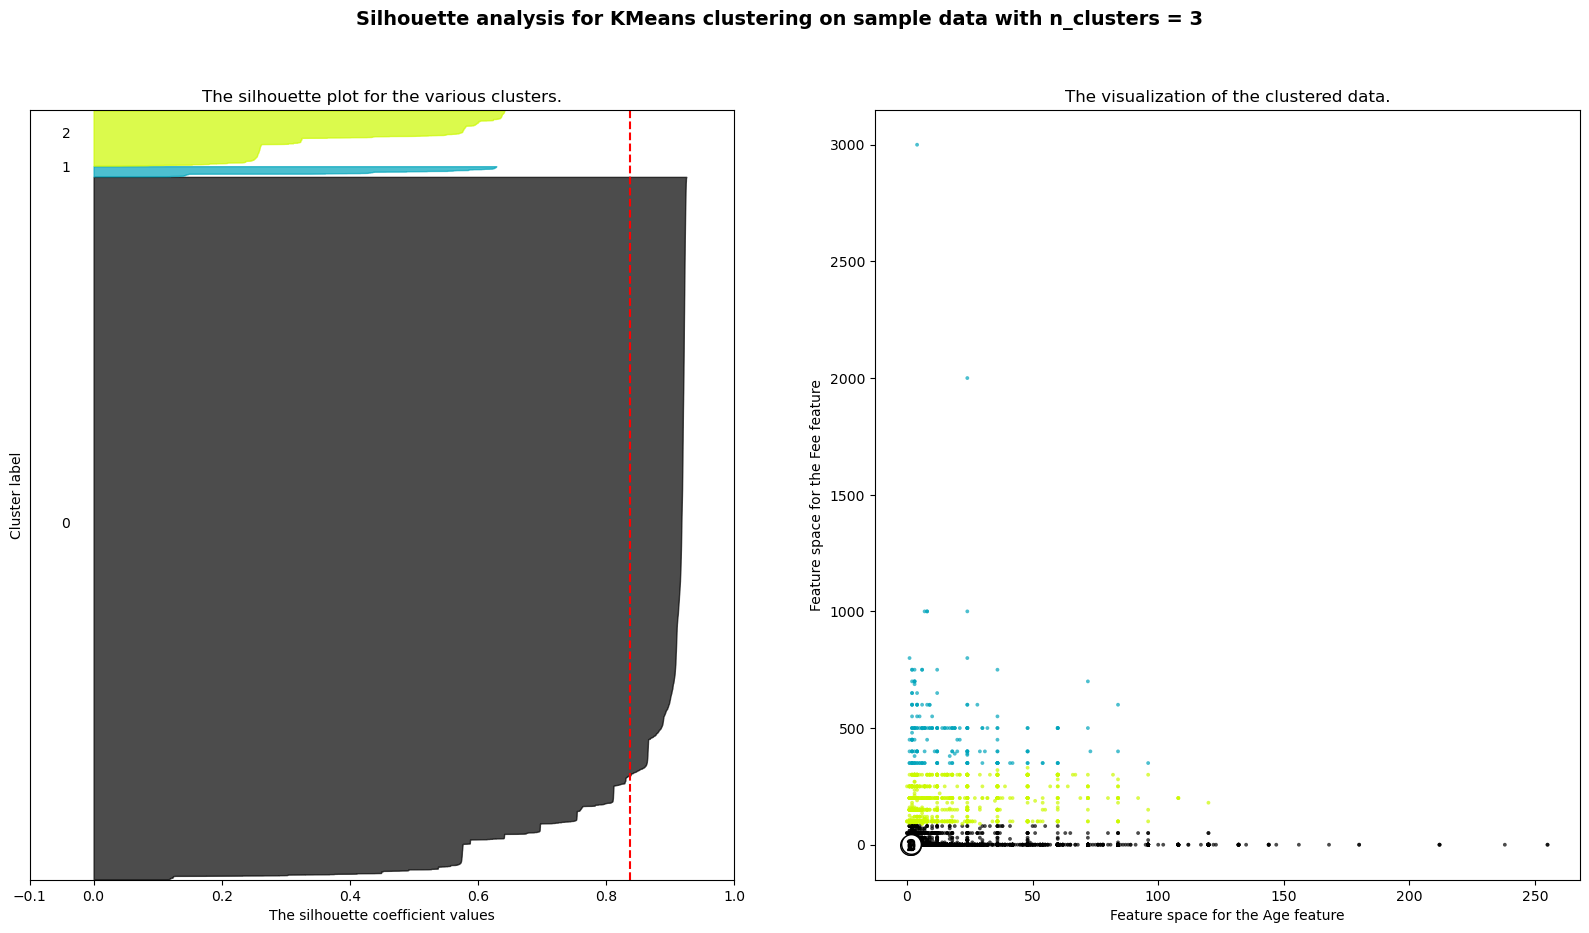

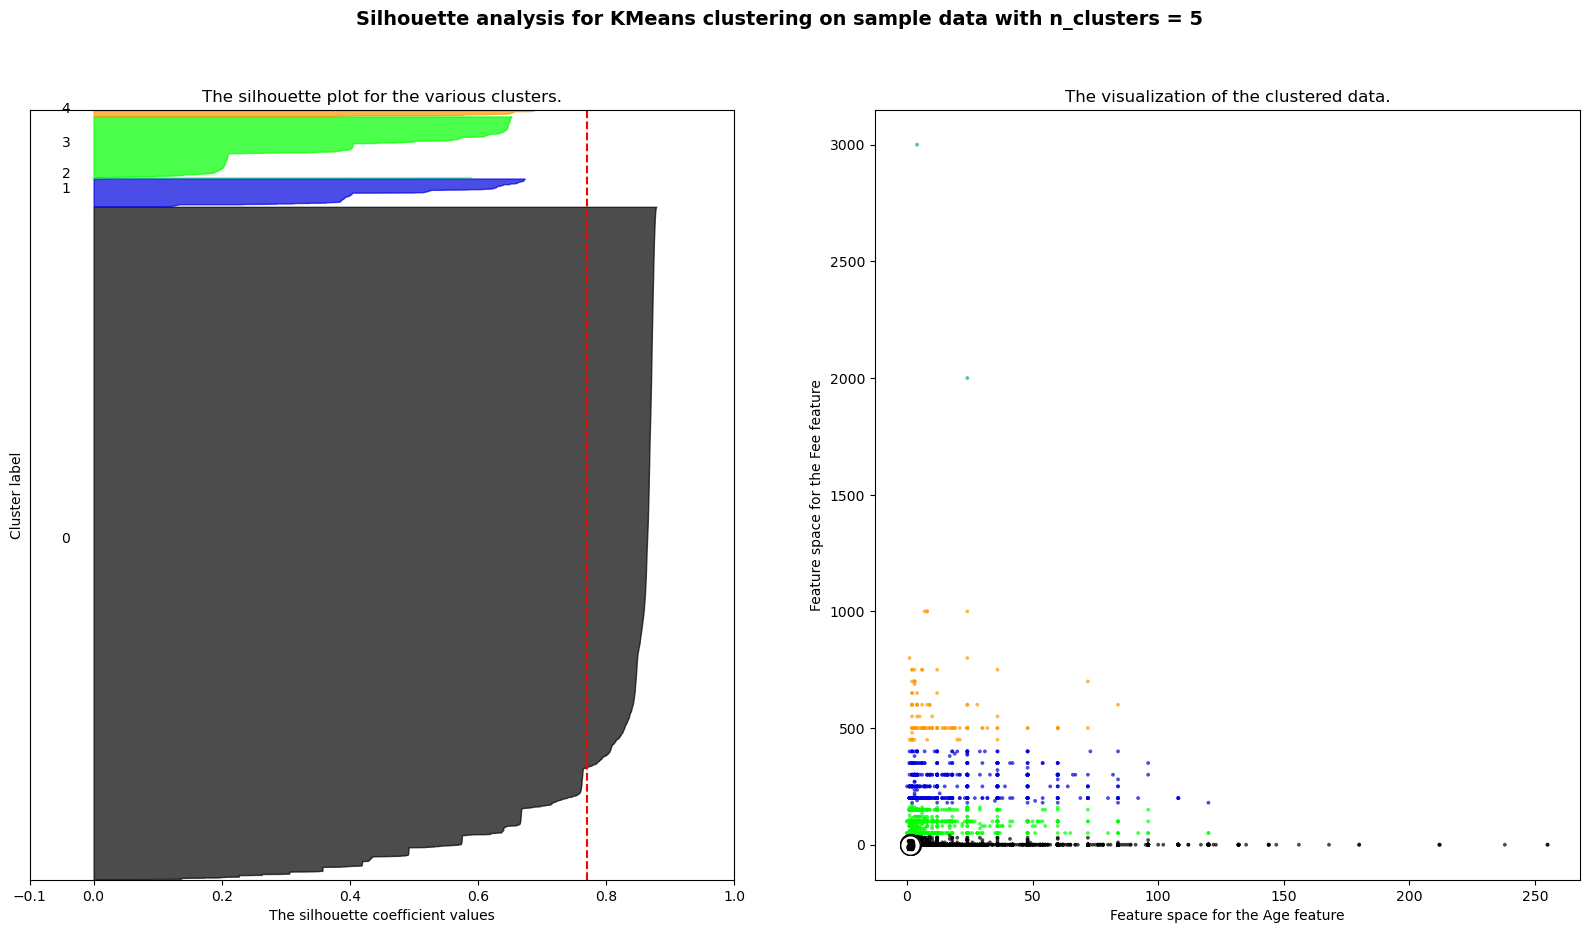

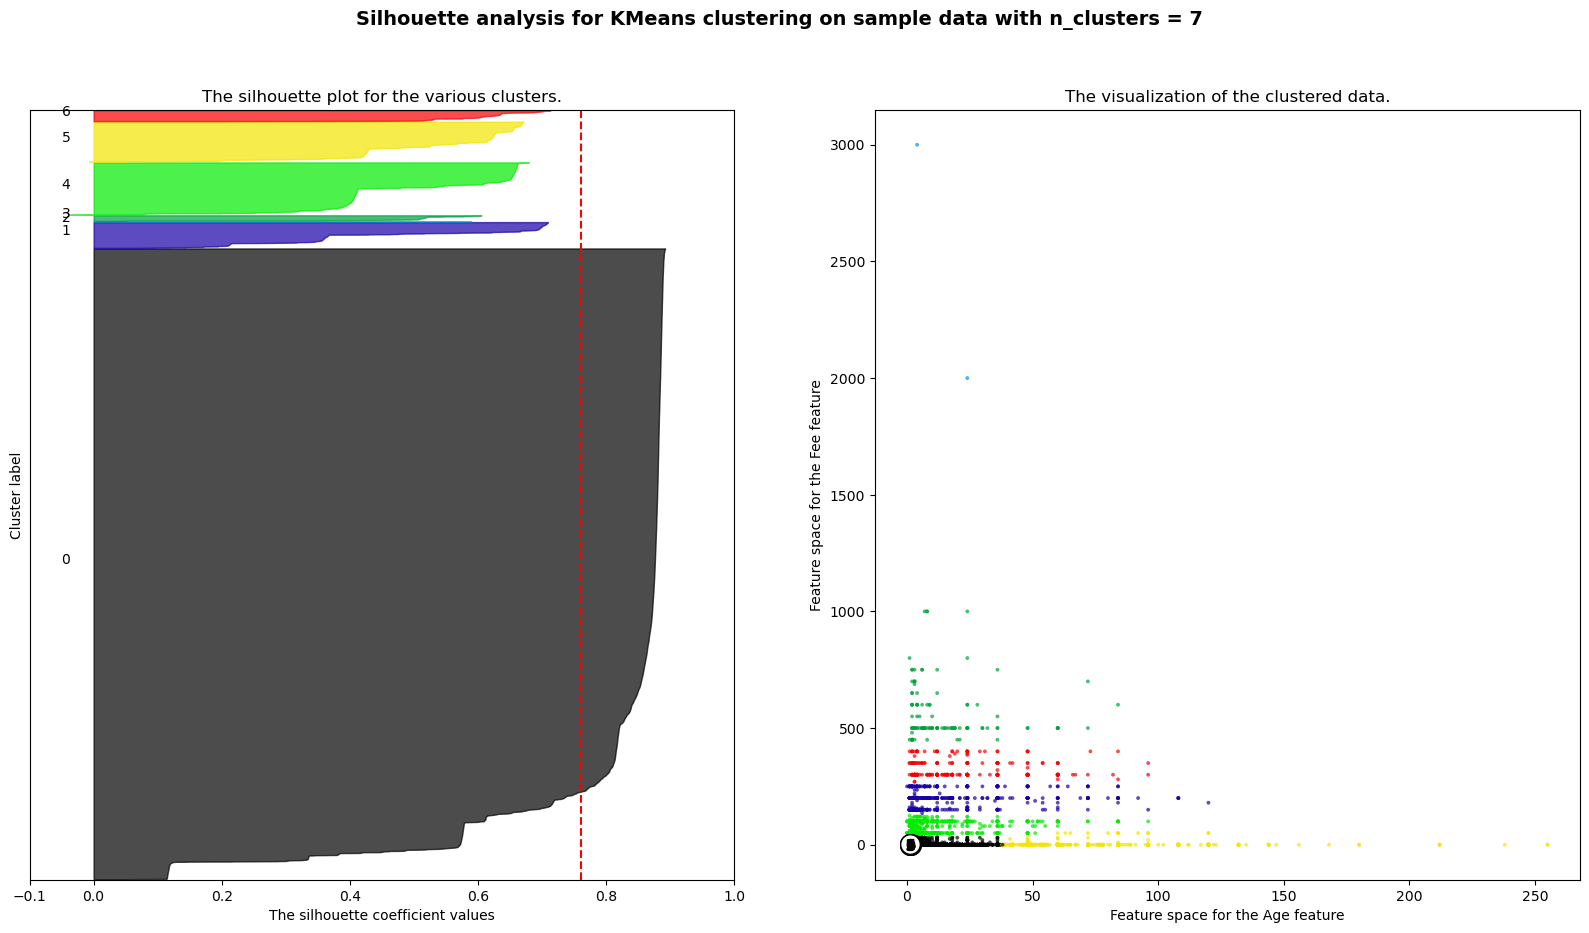

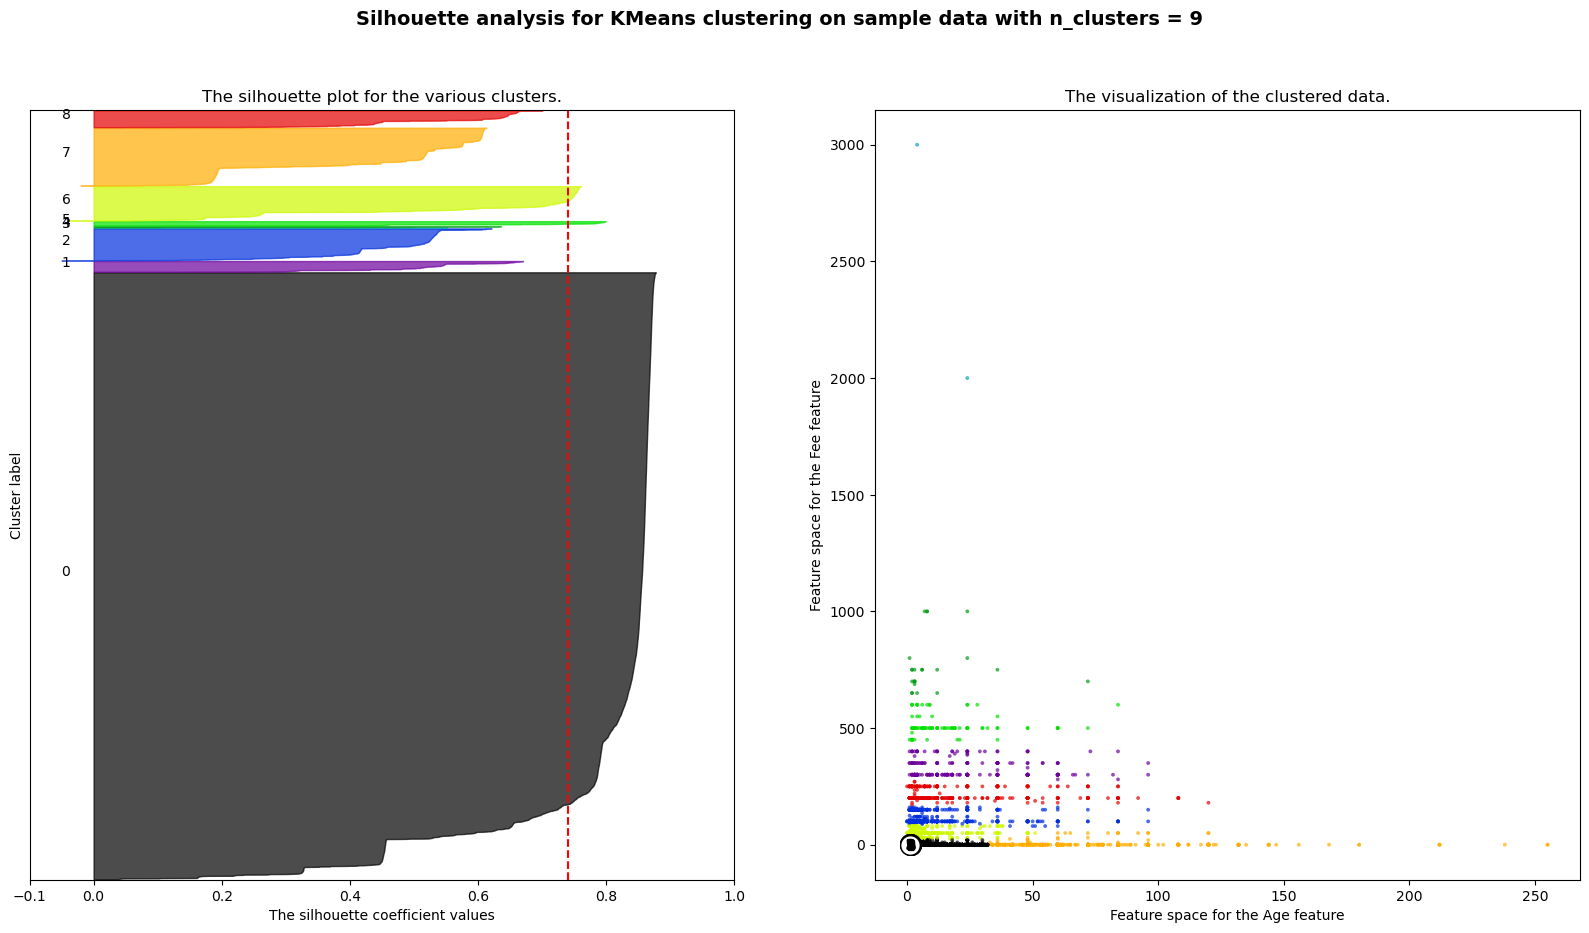

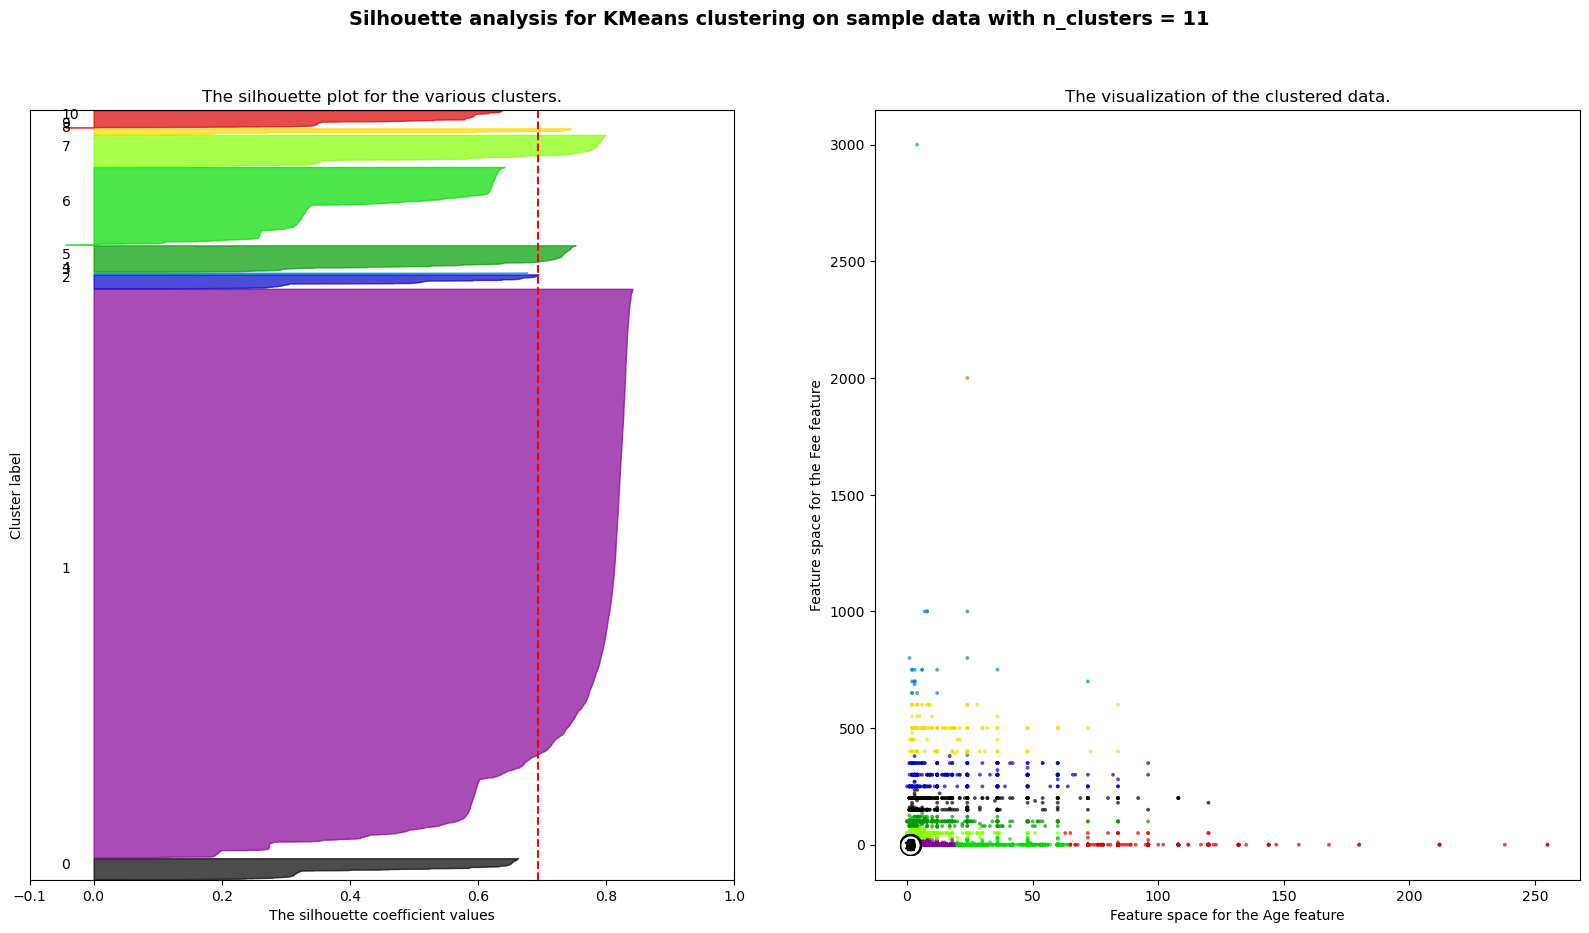

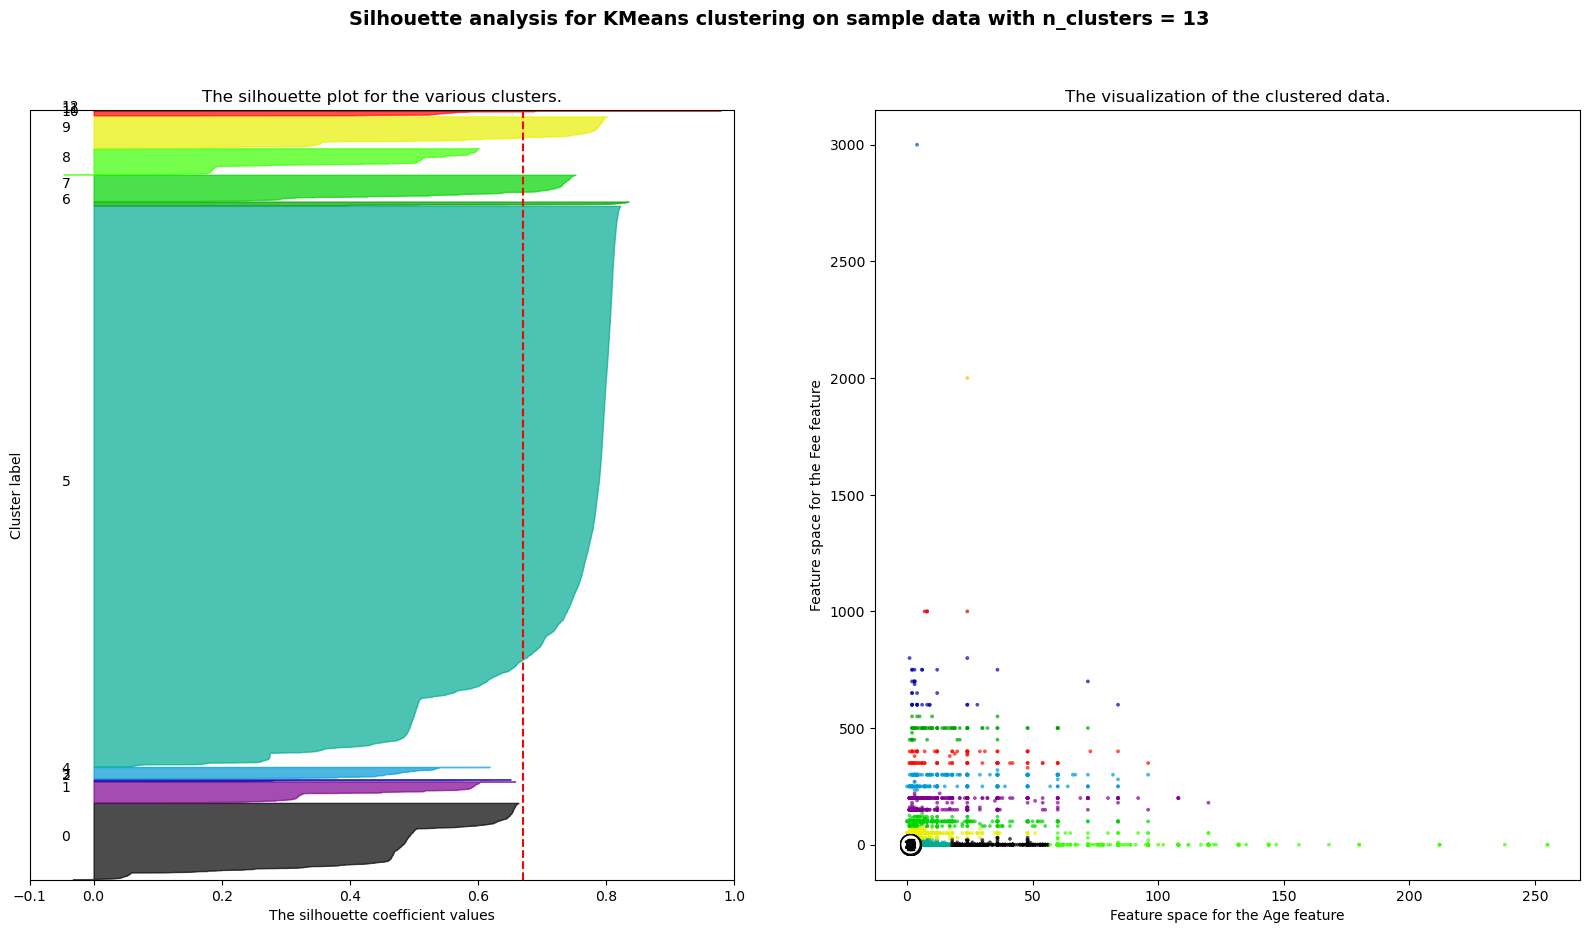

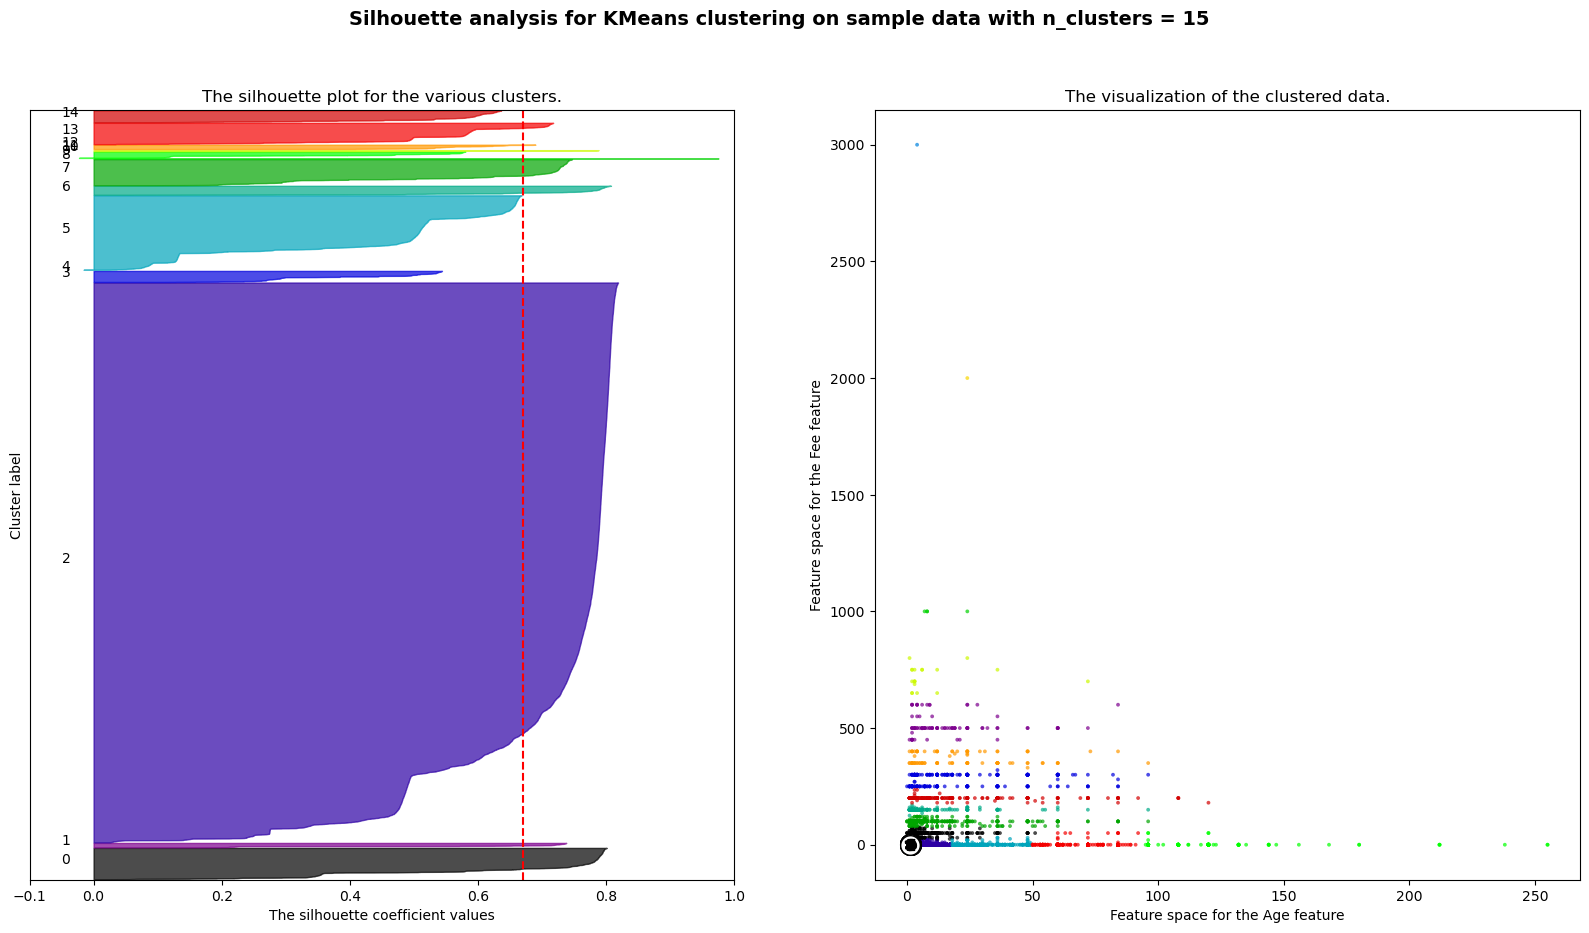

In [544]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = [3, 5, 7, 9, 11, 13, 15]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 10)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(new_table_X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(new_table_X)


    silhouette_avg = silhouette_score(new_table_X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(new_table_X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        new_table_X[:, 2], new_table_X[:, 13], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the Age feature")
    ax2.set_ylabel("Feature space for the Fee feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

We can see that with odd K values, between **3** and **9**, the silhouette score is always above 0.70, with a max of 0.837 when **K = 3**. But we can also see that for those numbers of K, they all cluster the vast majority of the data in `Cluster 0`.

But, in this plots, we see that with a **K = 11, 13** or **15**, the silhouette score is below 0.70, but the majority of animals are not all grouped in `Cluster 0`, as we saw on the previous values of K. Instead, we can see that the vast majority are clustered in one cluster, just like the other values of K, but not in the same Cluster. For instance: 
* When **K = 11**, the vast majority of animals are grouped in `Cluster 1`;
* When **K = 13**, the vast majority of animals are grouped in `Cluster 5`;
* When **K = 15**, the vast majority of animals are grouped in `Cluster 2`;

Also, we can see in this plots that those clusters with the vast majority of animals are indeed the animals with low values of **Age** and low values of **Fee**, as concluded above.
Finally, this means, that, despite the silhouette score below 0.70, the data distribution improves slightly, as the dominant cluster shifts. While this indicates some redistribution, the majority of the data still resides in a single cluster, suggesting that increasing (K) does not fully address the overconcentration issue but instead redistributes it among different clusters. 

### 2.2.2. HCA

Now, let’s switch to **hierarchical clustering (HCA)** to further analyze the structure of the dataset. HCA is an unsupervised learning method that **builds a hierarchy of clusters by iteratively merging or splitting them based on their similarity**. This approach provides a dendrogram, a tree-like diagram that reveals how individual animals or groups of animals are related. By examining different levels of the hierarchy, we can gain deeper insights into the relationships between features and identify potential patterns influencing adoption behavior.

We'll use the same `load_and_process_data` function we used on **Kmeans** but now lets buid more functions to evaluate our models, again with the **silhouette scores**:

In [550]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score, silhouette_samples, homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn import metrics

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Function to calculate silhouette scores for different numbers of clusters with **euclidean-ward** settings
def silhouette_scores(X, max_clusters=8):
    scores = []
    for n_clusters in range(2, max_clusters + 1):
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
        labels = clusterer.fit_predict(X)
        scores.append(silhouette_score(X, labels))
    return scores

# Function to plot silhouette scores
def plot_silhouette_scores(silhouette_avg):
    plt.figure(figsize=(5, 4))
    plt.plot(range(2, len(silhouette_avg) + 2), silhouette_avg, marker='o')
    plt.title('Silhouette Scores for Different Number of Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

# Function to draw silhouette plots for a given clustering
def draw_silhouette(X, labels, title):
    n_clusters = len(np.unique(labels))
    silhouette_vals = silhouette_samples(X, labels)

    y_lower = 10
    plt.figure(figsize=(5, 4))
    for i in range(n_clusters):
        cluster_silhouette_vals = silhouette_vals[labels == i]
        cluster_silhouette_vals.sort()
        size_cluster = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor='k', alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        y_lower = y_upper + 10

    plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    plt.title(title)
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster')
    plt.show()


In this step, first, we calculate the silhouette scores for different numbers of clusters **(from 2 to 8)** using the **euclidean-ward** setting, which combines the Euclidean distance metric with the Ward linkage method to minimize variance within clusters. 

Next, we visualize these scores using a plot to determine the optimal number of clusters where the silhouette score is maximized. Finally, we generate detailed silhouette plots for each clustering configuration, allowing us to analyze the distribution of points within the clusters and assess the clustering quality for different values of K to see as well which value of K is more suitable for this dataset.

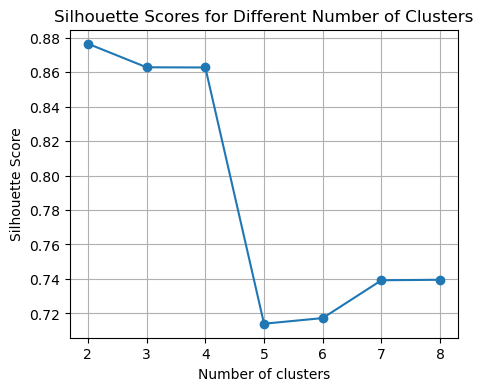

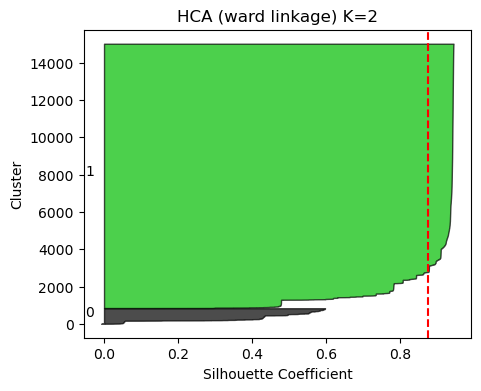

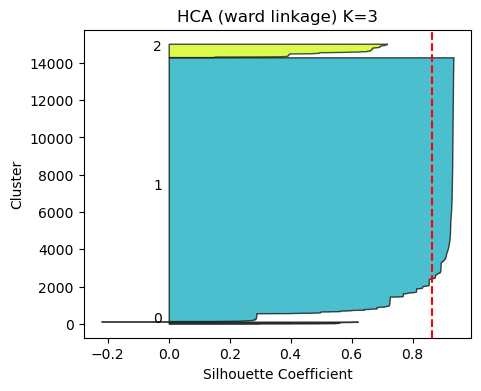

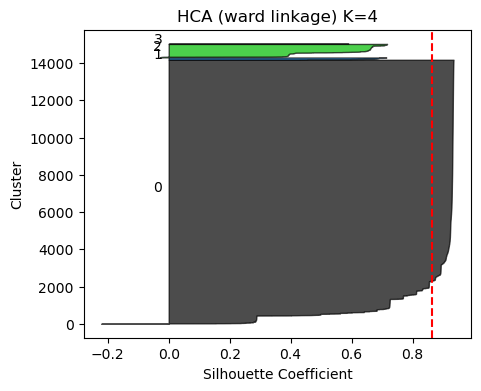

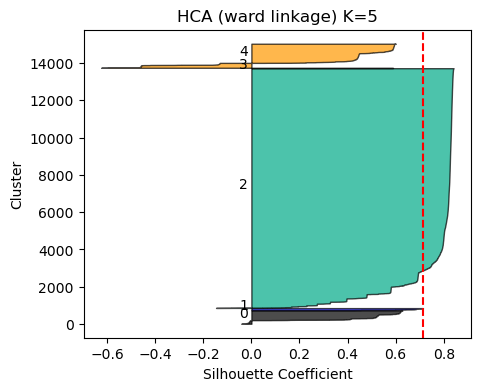

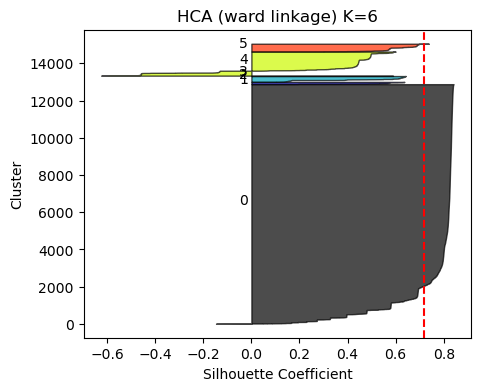

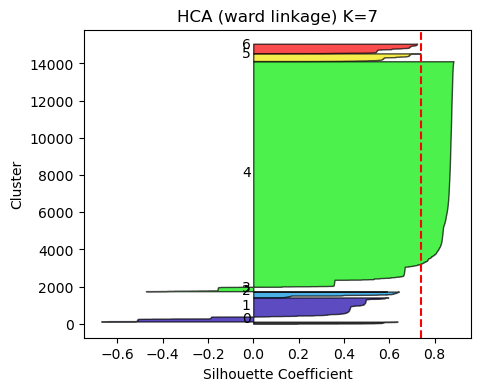

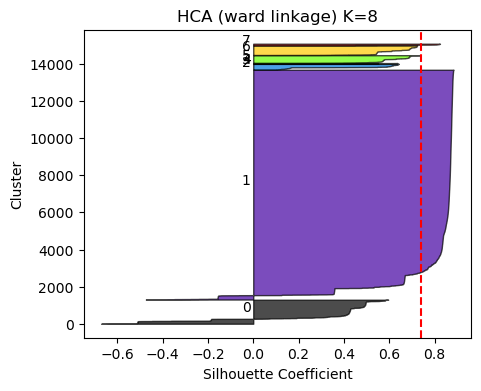

In [553]:
# Calculate silhouette scores
max_clusters = 8
silhouette_avg = silhouette_scores(new_table_X, max_clusters)

# Plot the silhouette scores
plot_silhouette_scores(silhouette_avg)

# Draw silhouette plots for different cluster numbers
for k in range(2, max_clusters + 1):
    clusterer = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = clusterer.fit_predict(new_table_X)
    draw_silhouette(new_table_X, labels, f"HCA (ward linkage) K={k}")

The **silhouette score results** for different numbers of clusters K offer relevant insights into the quality and cohesion of the clusters formed by the **Hierarchical Clustering Algorithm (HCA)** with **link ward**, but also raise questions about the uneven distribution of data across clusters:

* For **K = 2**, the silhouette score values vary between 0.87 and 0.88, indicating strong internal cohesion and good separation between the two groups. However, it is observed that approximately 14,000 of the almost 15,000 points cluster in cluster 1, leaving only a small fraction in the other cluster. This suggests that the identified binary structure may not reflect a significant split in the data, but rather an overwhelming predominance of similar characteristics in a large group.

* As the number of clusters increases to **K = 3** and **K = 4**, the silhouette score remains high, between 0.86 and 0.87, but starts to show signs of reducing. Even so, the data distribution remains strongly unbalanced: in K = 3, most of the data remains in cluster 1, with very few points allocated to clusters 0 and 2;

*  At **K = 4**, almost 14,000 data points are in cluster 0. While the score indicates some cohesion, the uneven distribution raises concerns about the model's ability to capture finer divisions in the data.

* For **K = 5**, the silhouette score drops significantly to values between 0.71 and 0.72, indicating a drop in the quality of the clusters. Here, the bulk of the data becomes grouped into cluster 2. This change in dominance suggests that the introduction of additional divisions begins to create less cohesive and possibly artificial clusters, although there may be slight refinement into smaller groups.

* With **K = 6**, the silhouette score remains close to 0.72, but does not compensate for the overall loss of cohesion observed for smaller clusters. Most of the data is grouped back into a single cluster, in this case cluster 0, which contains almost 13,000 points, reinforcing the tendency towards imbalance.

* For **K = 7** and **K = 8**, the silhouette score stabilizes at 0.74, suggesting a slight recovery compared to the results for K = 5 and K = 6. However, the distribution remains highly concentrated: around 12,000 points are in cluster 4 for K = 7, and in cluster 1 for K = 8. This dominance continues to indicate that clusters may not be adequately capturing the expected complexity or granularity in the data.

So, in sum, although K = 2 presents the best silhouette score, the extreme concentration of data in a single cluster limits the practical usefulness of this configuration. Similar results are observed for K = 3 and K = 4, which, despite having high scores, suffer from an equally unbalanced distribution. For K = 5 to K = 8, the stability of the silhouette scores suggests that the model is saturated, and introducing more clusters does not significantly improve the data representation. These results indicate the need to explore other approaches, such as additional preprocessing, removing outliers, or using methods other than clustering, to better capture the underlying complexity of the data.

Lets try a diffent approach and try to treat the different types of data appropriately, by using using pipelines to facilitate the workflow and to prepare the dataset.

In [555]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

def load_and_preprocess_data(fname):
    # Step 1: Load the dataset
    df = pd.read_csv(fname, delimiter=',')  
    # Step 2: Convert 'Name' column to binary (1 if present, 0 otherwise)
    df['Name'] = df['Name'].notnull().astype(int)
    # Step 3: Convert 'Breed1' to 1 for pure breeds, 2 for mixed breeds
    df['Breed1'] = df['Breed2'].apply(lambda x: 2 if not pd.isna(x) and x != 0 else 1)
    # Step 4: Convert 'Color' columns into a single categorical column
    df['Color1'] = df.apply(
        lambda row: 1 if row['Color1'] != 0 and row['Color2'] == 0 and row['Color3'] == 0 else
                    2 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] == 0 else
                    3 if row['Color1'] != 0 and row['Color2'] != 0 and row['Color3'] != 0 else 0,
        axis=1
    )
    # Rename columns
    df = df.rename(columns={'Color1': 'Color', 'Breed1': 'Breed'})
    # Drop unnecessary columns
    df = df.drop(columns=['RescuerID', 'PetID', 'Description', 'Breed2', 'Color2', 'Color3'], errors='ignore')
    # Step 5: Features and target extraction
    ordinal_cols = [
        'MaturitySize', 'FurLength', 'Health'
    ]
    nominal_cols = [
        'Type', 'Gender', 'Breed', 'Color', 'State', 'Vaccinated', 'Dewormed', 'Sterilized'
    ]
    continuous_cols = [
        'Age', 'Quantity', 'Fee', 'PhotoAmt', 'VideoAmt'
    ]

    # Initialize label encoders for ordinal columns
    label_encoders = {}
    for col in ordinal_cols:
        label_encoders[col] = LabelEncoder()
        df[col] = label_encoders[col].fit_transform(df[col].astype(str))
    
    # Create preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), continuous_cols),
            ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), nominal_cols),
            ('ord', 'passthrough', ordinal_cols),
            ('name', 'passthrough', ['Name'])
        ],
        remainder='drop'  # Drop any other columns not specified
    )

    # Fit and transform the data
    X = preprocessor.fit_transform(df)
    # Create feature names for the transformed dataset
    feature_names = (
        continuous_cols +  # Continuous features
        [f"{col}_{val}" for i, col in enumerate(nominal_cols)  # One-hot encoded features
            for val in preprocessor.named_transformers_['cat'].categories_[i]] +
        ordinal_cols +    # Label encoded features
        ['HasName']       # Binary name feature
    )
    # Get the target if it exists
    table_y = df['AdoptionSpeed'].values if 'AdoptionSpeed' in df.columns else None
    return df, X, table_y, feature_names, preprocessor

In [557]:
df_hca, table_X_hca, table_y_hca, feature_names_hca, preprocessor_hca = load_and_preprocess_data("PetFinder_dataset.csv")

This new function makes the additional transformations:
1. **Transformation of categorical columns:**
* This function classifies columns into ordinal, nominal and continuous.
* Uses LabelEncoder to transform ordinal columns.
* Uses a OneHotEncoder to transform nominal columns into dummy variables, increasing the number of features.

2. **Continuous data scaling:**
* Applies StandardScaler to the solid columns, scaling them to a standard normal distribution (mean = 0, standard deviation = 1).

3. **Preprocessing pipeline:**
* It uses the ColumnTransformer to combine multiple transformation steps (scaling, one-hot encoding, and label encoding) into a single pipeline, allowing it to apply different types of preprocessing to different columns.

4. **Optional column handling:**
* It uses errors = 'ignore' to avoid errors when deleting missing columns.

5. **Creating transformed feature names:**
* Generates a list of names for columns after transformation, essential for interpretable analysis of the model.

6. **Target generalization:**
* Includes the possibility that the AdoptionSpeed column is not present in the dataset and returns None as the target if this is the case.

In [559]:
df_hca

,Type,Name,Age,Breed,Gender,Color,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,2,1,3,1,1,2,0,0,2,2,2,0,1,100,41326,0,1.0,2
1,2,1,1,1,1,2,1,1,3,3,3,0,1,0,41401,0,2.0,0
2,1,1,1,1,1,2,1,1,1,1,2,0,1,0,41326,0,7.0,3
3,1,1,4,1,2,2,1,0,1,1,2,0,1,150,41401,0,8.0,2
4,1,1,1,1,1,1,1,0,2,2,2,0,1,0,41326,0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,0,2,1,3,1,1,1,2,2,2,0,4,0,41326,0,3.0,2
14989,2,1,60,2,3,3,1,1,1,1,1,0,2,0,41326,0,3.0,4
14990,2,1,2,2,3,3,2,1,2,1,3,0,5,30,41326,0,5.0,3
14991,2,1,9,1,2,2,0,0,1,1,1,0,1,0,41336,0,3.0,4


Lets now do the same steps as we did with the last column:

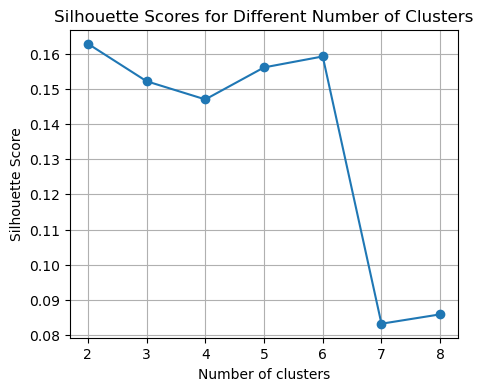

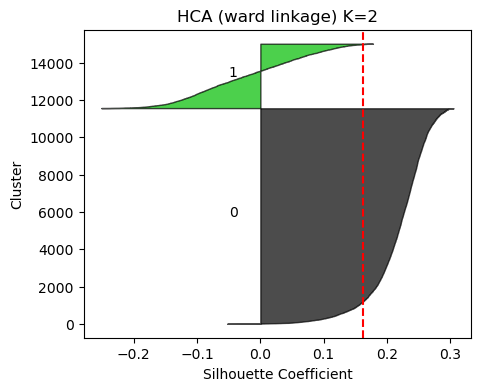

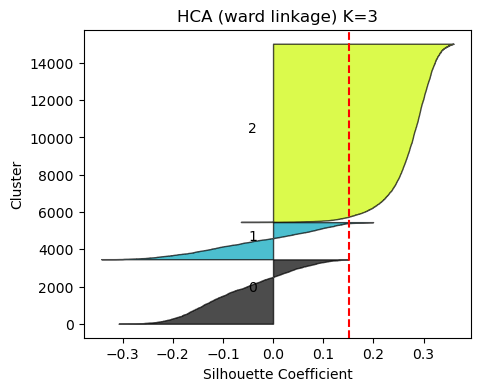

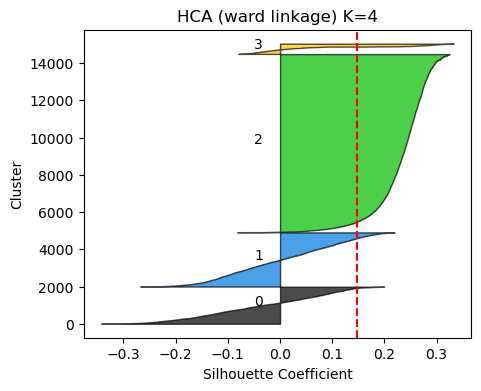

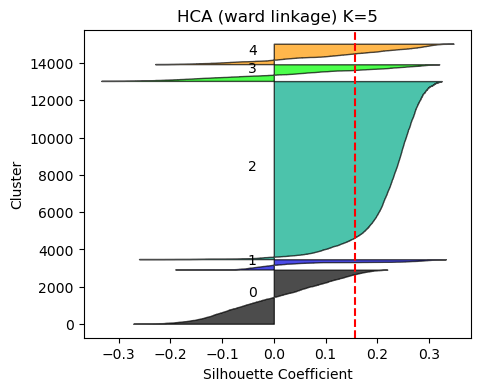

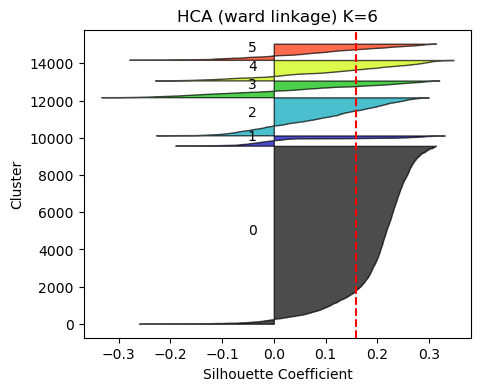

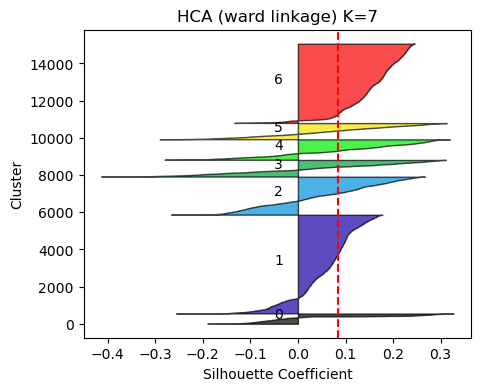

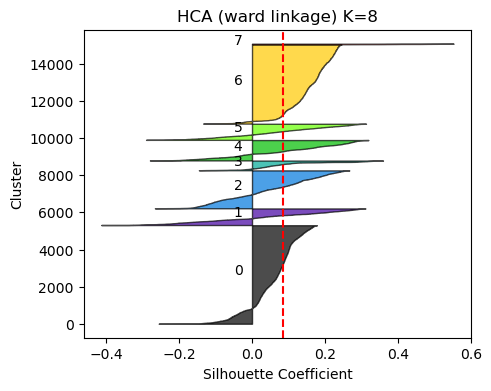

In [562]:
# Calculate silhouette scores
max_clusters = 8
silhouette_avg = silhouette_scores(table_X_hca, max_clusters)

# Plot the silhouette scores
plot_silhouette_scores(silhouette_avg)

# Draw silhouette plots for different cluster numbers
for k in range(2, max_clusters + 1):
    clusterer = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = clusterer.fit_predict(table_X_hca)
    draw_silhouette(table_X_hca, labels, f"HCA (ward linkage) K={k}")

The results obtained for the silhouette scores show a substantial difference between the latest and previous approaches. In the current case, for the **HCA method with linkage ward**, the silhouette values are relatively low, indicating weak separation between the clusters and little cohesion within each cluster. For example, with **k = 2**, the silhouette score was approximately 0.17, while for **k = 3**, the value dropped to approximately 0.153, showing that the increase in the number of clusters worsens the quality of the separation. Slightly better values are observed for **k = 5** and **k = 6**, with scores of 0.157 and 0.16, respectively, but these are still far from indicating high-quality segmentation. For **k = 7** and **k = 8**, the scores reduce drastically, reaching values around 0.083 and 0.086, suggesting that, with many clusters, the data becomes even more difficult to separate in a meaningful way.

In contrast, previously obtained results for the silhouette score showed significantly higher and more consistent values, even with different numbers of clusters. For k = 2, the scores were between 0.87 and 0.88, indicating a clear and well-defined separation between two main groups. This pattern continued for k = 3 and k = 4, where values were between 0.86 and 0.87, demonstrating that the segmentation was robust even with the division into three or four groups. Although there was a slight decrease for k=5 and k=6, the values still remained acceptable, around 0.71 and 0.72, before rising again to 0.74 with k = 7 and k = 8. This consistency suggests that the data in the previous analysis had a clearer structure and allowed for greater cohesion within the clusters.

The significant difference between the results of the two analyzes may be related to changes in data preparation. In the latest process, categorical columns were encoded with **OneHotEncoding**, while continuous variables were standardized. Although these are common practices, they may have introduced additional noise or created representations of the data that do not favor the HCA method. In contrast, the previous approach appears to have maintained a structure that favored greater cohesion and separation between groups.

In sum, the latest results reveal lower quality segmentation compared to previously obtained silhouette values. It is possible that the new preprocessing strategy has negatively affected the data representation, especially with regard to the model's ability to distinguish cohesive and well-defined clusters. This result reinforces the importance of carefully adjusting preprocessing to the characteristics of the data and the chosen clustering methods.

Since we got very low silhouette scores, lets go back again to the previous variables and dataset we got, but now lets compute the clusters scores:

In [564]:
def calculate_cluster_scores(X, table_y, max_clusters=8):
    results = {}
    for n_clusters in range(2, max_clusters + 1):
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
        labels = clusterer.fit_predict(X)
        
        # Calculate the scores
        
            #External
        homogeneity = homogeneity_score(table_y, labels)
        completeness = completeness_score(table_y, labels)
        v_measure = v_measure_score(table_y, labels)
        fmi = metrics.fowlkes_mallows_score(table_y, labels)
        cm = contingency_matrix(labels,table_y)
        
            #Internal
        calinski_harabasz = metrics.calinski_harabasz_score(X, labels)
        davies_bouldin = metrics.davies_bouldin_score(X, labels)
        
        # Store the results
        results[n_clusters] = {
            "Homogeneity": homogeneity,
            "Completeness": completeness,
            "V-measure": v_measure,
            "Fowlkes-Mallows Index": fmi,
            "Calinski Harabasz": calinski_harabasz,
            "Davies Bouldin": davies_bouldin,
            "Contingency Matrix": cm
        }
    return results,labels

# Calculate and print the homogeneity, completeness, and V-measure scores for each k
results, labels = calculate_cluster_scores(new_table_X, new_table_y, max_clusters)

In [565]:
for k in range(2, max_clusters + 1):
    print(f"Scores for k={k}:")
    print(f"  Homogeneity score: {results[k]['Homogeneity']}")
    print(f"  Completeness score: {results[k]['Completeness']}")
    print(f"  V-measure (V-score): {results[k]['V-measure']}")
    print(f"  Fowlkes-Mallows Index: {results[k]['Fowlkes-Mallows Index']}")
    print("-" * 40)

Scores for k=2:
  Homogeneity score: 3.391309475747872e-05
  Completeness score: 0.0002320137862012344
  V-measure (V-score): 5.917645849202794e-05
  Fowlkes-Mallows Index: 0.4647378893766595
----------------------------------------
Scores for k=3:
  Homogeneity score: 0.0002561858110264822
  Completeness score: 0.0015891716954220445
  V-measure (V-score): 0.00044124050567909004
  Fowlkes-Mallows Index: 0.4645614482485284
----------------------------------------
Scores for k=4:
  Homogeneity score: 0.0003373485564350837
  Completeness score: 0.002086718815491048
  V-measure (V-score): 0.0005808019927535943
  Fowlkes-Mallows Index: 0.46456108016429043
----------------------------------------
Scores for k=5:
  Homogeneity score: 0.0006662818057149218
  Completeness score: 0.0018584869111439245
  V-measure (V-score): 0.0009809025331992422
  Fowlkes-Mallows Index: 0.4232767872845883
----------------------------------------
Scores for k=6:
  Homogeneity score: 0.0007059284784741083
  Comple

The results of the cluster scores obtained using the old preprocessing function show a relatively low performance pattern, with consistently low values for all evaluated metrics (Homogeneity, Completeness, V-measure and Fowlkes-Mallows Index). This suggests that the clusters generated by the model have low internal cohesion and weak separation between groups, indicating that the data, even after preprocessing, does not have a clear structure for grouping.

For k = 2, the scores are particularly low, with a Homogeneity score of just 0.000339, indicating that the generated clusters are not homogeneous with respect to the target variable. The Completeness score, of 0.000232, reinforces this observation, showing that the totality of the data was not well explained by the clusters. The V measure, which combines Homogeneity and Completeness, is also low (0.000592), highlighting the general low quality of the clustering model. Despite this, the Fowlkes-Mallows Index (0.4647) presents a moderate value, which suggests that pairs of points in the same cluster present a reasonable hit rate, but without a clear correspondence to the data structure.

With the increase in the number of clusters (k = 3 to k = 8), the Homogeneity and Completeness scores show slight fluctuations, but remain at low values. For example, for k=3, the values are 0.000256 (Homogeneity) and 0.001589 (Completeness), while for k=8, the values increase slightly to 0.001196 and 0.002486, respectively. These results indicate that, even increasing the number of clusters, the model is not capable of capturing more significant patterns in the data. The V-measure follows the same trend, with values such as 0.000441 for k = 3 and 0.001615 for k = 8, showing a slight improvement in the combination of Homogeneity and Completeness, but still insufficient to justify the quality of the clustering.

The Fowlkes-Mallows Index presents moderate but decreasing values as the number of clusters increases. For k=5 and k=6, the indices are 0.4233 and 0.4230, respectively, while for k = 7 and k = 8, the values drop to around 0.4065. This suggests that introducing more clusters makes the groups less accurate in terms of correspondence between points in the same cluster and the true structure of the data.

So, the results reflect significant limitations in data segmentation with the current preprocessing and clustering approach. The low internal cohesion and weak separation between clusters indicate that the data, even after preprocessing, do not present sufficiently distinct characteristics to support clear segmentation.

Now, lets take a look to the Contingency Matrix:

In [570]:
# Contingency Matrix
for k in range(2, max_clusters + 1):
    print(f"Scores for k={k}:")
    print(f" Contingency Matrix: \n {results[k]['Contingency Matrix']}")
    print()

Scores for k=2:
 Contingency Matrix: 
 [[  23  179  220  169  240]
 [ 387 2911 3817 3090 3957]]

Scores for k=3:
 Contingency Matrix: 
 [[   5   29   38   19   22]
 [ 387 2911 3817 3090 3957]
 [  18  150  182  150  218]]

Scores for k=4:
 Contingency Matrix: 
 [[ 387 2911 3817 3090 3957]
 [   5   28   38   18   22]
 [  18  150  182  150  218]
 [   0    1    0    1    0]]

Scores for k=5:
 Contingency Matrix: 
 [[  18  150  182  150  218]
 [   5   28   38   18   22]
 [ 363 2652 3477 2832 3546]
 [   0    1    0    1    0]
 [  24  259  340  258  411]]

Scores for k=6:
 Contingency Matrix: 
 [[ 363 2652 3477 2832 3546]
 [   5   28   38   18   22]
 [   8   61   80   69   87]
 [   0    1    0    1    0]
 [  24  259  340  258  411]
 [  10   89  102   81  131]]

Scores for k=7:
 Contingency Matrix: 
 [[   5   28   38   18   22]
 [  24  259  340  258  411]
 [   8   61   80   69   87]
 [   0    1    0    1    0]
 [ 347 2574 3353 2709 3377]
 [  10   89  102   81  131]
 [  16   78  124  123  169]]

The **Contingency Matrices** reveal the correspondence between the clusters generated by the model and the true classes of the data. When analyzing these matrices for different values of k, it is possible to observe the distribution of points in each cluster in relation to the real categories, highlighting patterns or limitations in the grouping.

* For **k = 2**, the matrix shows that most of the data is assigned to the second cluster, with very high values (2911, 3817, 3090 and 3957) compared to the first cluster, which has significantly lower numbers (23, 179, 220, etc.). This suggests a marked imbalance, where one cluster dominates the distribution, indicating that the model was unable to segment the data in a meaningful way with just two clusters.

* When **k = 3**, a third cluster is introduced, but there is still a dominance of the second cluster, which maintains similar high values as **k = 2**. The new cluster captures some additional points (150, 182, 150, 218), but the separation remains weak, reflecting a limited redistribution of the data.

* With **k = 4**, the matrix gains a new cluster, but a similar pattern persists. The second cluster still dominates, while additional clusters capture only small fractions of the data (such as the cluster with 1 or 0 points in several categories). This suggests that introducing more clusters does not substantially improve segmentation, as the data does not present a clear structure that supports this division.

* For **k = 5**, additional clusters begin to capture more data, such as the fourth cluster with more substantial values (259, 340, 258, 411). However, the overall pattern still reflects a dominance of the largest cluster (2652, 3477, etc.), indicating that the separation remains unbalanced.

* With **k = 6**, the matrix reflects a more detailed breakdown, but additional clusters capture very small fractions of the data relative to the dominant cluster. For example, the new cluster captures values such as 89, 102, 81, and 131, but cannot compete with the main cluster, which holds values in the thousands. This reinforces that smaller clusters are not significant in terms of segmentation.

* As **k increases to 7 and 8**, the trend remains. Although the new clusters capture some additional data (such as the seventh cluster with values 78, 124, 123, 169 for **k = 7**), the dominance of the larger cluster still persists. For **k = 8**, a small increase in the distribution between clusters is observed, but the introduction of additional clusters appears to fragment the data into less significant groups, rather than revealing relevant patterns.

Contingency Matrices show overall that regardless of the number of clusters, a dominant group captures the majority of data, while smaller clusters have a marginal contribution. This suggests that the data does not have an inherent structure that favors clear segmentation, even with an increase in the number of clusters.

Lets measure the clusters using also **Internal Metrics**:

In [574]:
#Internal Metrics
for k in range(2, max_clusters + 1):
    print(f"Scores for k={k}:")
    print(f"  Calinski Harabasz score: {results[k]['Calinski Harabasz']}")
    print(f"  Davies Bouldin score: {results[k]['Davies Bouldin']}")

Scores for k=2:
  Calinski Harabasz score: 23901.073028594226
  Davies Bouldin score: 0.47540640111073895
Scores for k=3:
  Calinski Harabasz score: 22454.844097706733
  Davies Bouldin score: 0.4950198843710926
Scores for k=4:
  Calinski Harabasz score: 23598.96789527074
  Davies Bouldin score: 0.4108268132744005
Scores for k=5:
  Calinski Harabasz score: 26097.898824790253
  Davies Bouldin score: 0.5347272961489028
Scores for k=6:
  Calinski Harabasz score: 27860.821805823893
  Davies Bouldin score: 0.5599531330885233
Scores for k=7:
  Calinski Harabasz score: 33539.60053559196
  Davies Bouldin score: 0.5382052330649433
Scores for k=8:
  Calinski Harabasz score: 35308.40959784731
  Davies Bouldin score: 0.5324460446444285


Internal metrics results for clusters obtained with Ward Linkage in the Hierarchical Clustering Algorithm (HCA) show mixed trends. The **Calinski-Harabasz** score, which evaluates the compactness and separation of clusters, shows a constant growth as k increases, with higher values indicating better cluster quality. This increase suggests that, as the number of clusters grows, the model is able to partition the data in more detail, favoring separation. However, the continued growth of the score may also reflect the fact that additional clusters simply refine the boundaries within a data space already dominated by a large main cluster, as observed in Contingency Matrices.

On the other hand, the **Davies-Bouldin** score, which measures the proximity and overlap between clusters (lower values ​​are better), shows less consistent behavior. Although a reasonable value is obtained for k=2 (0.475), it worsens with k=3 (0.495) and fluctuates around higher values for more complex configurations such as k=5 (0.535) and k=6 (0.559). This trend suggests that with an increase in the number of clusters, there is either greater overlap between groups or a decrease in effective separation. Even with k=8, the slight improvement (0.532) is not significant, pointing to limitations in the model in identifying natural structures in the data.

These results indicate that although Ward Linkage benefits the incremental separation of clusters in terms of compactness (as evidenced by Calinski-Harabasz), it struggles to avoid overlap or create more balanced clusters (as demonstrated by Davies-Bouldin). This reinforces the hypothesis that the analyzed data may not have a clear inherent segmentation, and the clustering approach is capturing artificial divisions, possibly influenced by dominant variables or imbalances in the distribution of the data.

We will now try with **complete linkage** to see how this hierarchical clustering method impacts the grouping of our data, particularly in terms of cluster compactness and separation compared to previous methods.

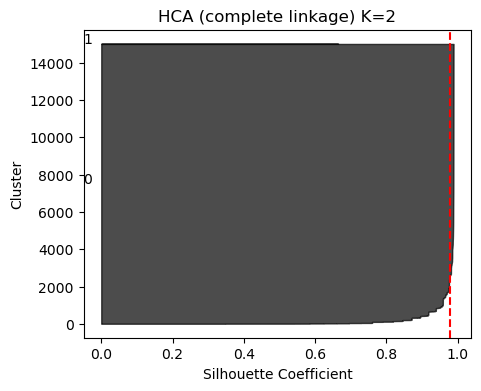

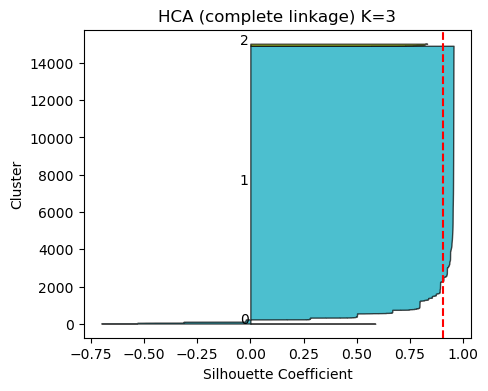

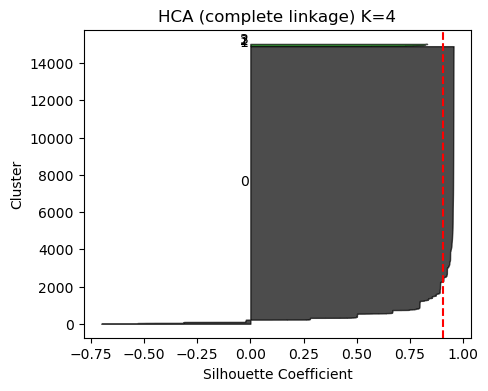

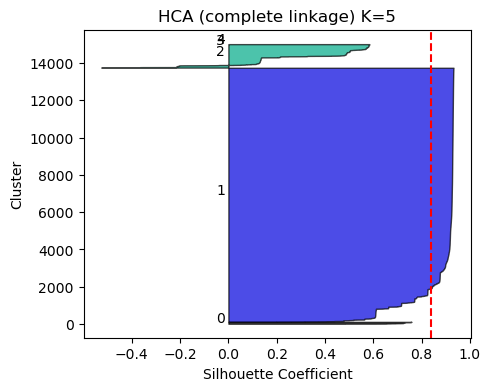

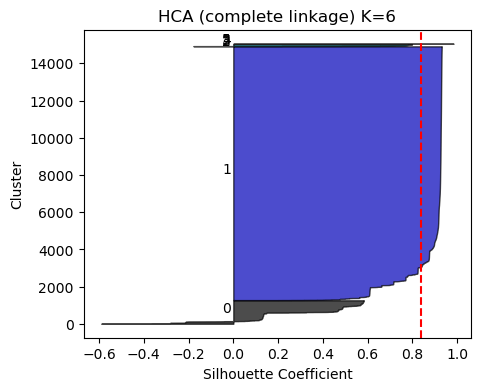

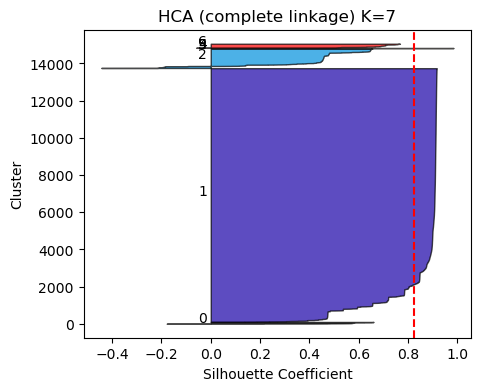

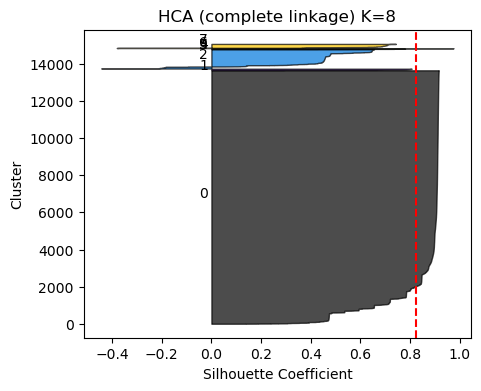

In [578]:
# Function to calculate silhouette scores for different numbers of clusters with **manhattan-complete** settings
def silhouette_scores(X, max_clusters=8):
    scores = []
    for n_clusters in range(2, max_clusters + 1):
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric='manhattan', linkage='complete')
        labels = clusterer.fit_predict(X)
        scores.append(silhouette_score(X, labels))
    return scores

# Draw silhouette plots for different cluster numbers
for k in range(2, max_clusters + 1):
    clusterer = AgglomerativeClustering(n_clusters=k, metric='manhattan', linkage='complete')
    labels = clusterer.fit_predict(new_table_X)
    draw_silhouette(new_table_X, labels, f"HCA (complete linkage) K={k}")

Even with **complete linkage** we see that the vast majority of data are clustered in just one clusters, with cluster 0 and cluster 1 having the vast majority. The fact that most of the data is concentrated in one or two main clusters (clusters 0 and 1) indicates that the model tends to group points that have greater relative proximity within large regions of the data space, even when the number of clusters k increases. This behavior is characteristic of **complete linkage**, which considers the maximum distance between points from different clusters, resulting in a more conservative approach in defining new groups and often leading to the formation of large dominant clusters.

The **Silhouette score**, which ranges from -1 to 1 and measures the separation between clusters and internal cohesion, can be negatively impacted by this imbalance. The presence of a dominant cluster means that other smaller clusters are likely to have less well-defined boundaries, with nearby points being assigned arbitrarily, although we can see still a high value of the Silhouette score. This is reflected in Silhouette values which, although they can be moderately high for dominant clusters, tend to be lower in smaller clusters, indicating a less ideal cluster structure.

Furthermore, the distance metric approach used (**Manhattan Distance**) can exacerbate the dominance of large clusters in data with high dimensionality or highly correlated features. Manhattan distance, which calculates distances based on the sum of absolute differences, is sensitive to outliers and can influence cluster formation, especially when combined with complete linkage behavior.

In sum, although **full linkage** can be useful for avoiding highly heterogeneous clusters, it does not appear to adequately capture the nuances of the data in this specific case. As a result, there is a disproportionate concentration of points in a few clusters, reducing the granularity of the model and affecting the representation of smaller clusters. A complementary analysis with different linkage methods (such as average linkage) or distance metrics (such as Euclidean or cosine) could help balance the distribution of clusters and improve the overall separation.

Lets evaluate the clusters again with external and internal metrics:

In [580]:
# Function to calculate homogeneity, completeness, and V-measure scores for different clusters in **manhattan-complete** settings
def calculate_cluster_scores(X, table_y, max_clusters=8):
    results = {}
    for n_clusters in range(2, max_clusters + 1):
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric='manhattan', linkage='complete')
        labels = clusterer.fit_predict(X)
        
        # Calculate the scores
        
            #External
        homogeneity = homogeneity_score(table_y, labels)
        completeness = completeness_score(table_y, labels)
        v_measure = v_measure_score(table_y, labels)
        fmi = metrics.fowlkes_mallows_score(table_y, labels)
        cm = contingency_matrix(labels,table_y)
        
            #Internal
        calinski_harabasz = metrics.calinski_harabasz_score(X, labels)
        davies_bouldin = metrics.davies_bouldin_score(X, labels)
        
        # Store the results
        results[n_clusters] = {
            "Homogeneity": homogeneity,
            "Completeness": completeness,
            "V-measure": v_measure,
            "Fowlkes-Mallows Index": fmi,
            "Calinski Harabasz": calinski_harabasz,
            "Davies Bouldin": davies_bouldin,
            "Contingency Matrix": cm
        }
    return results,labels

# Calculate and print the homogeneity, completeness, and V-measure scores for each k
results, labels = calculate_cluster_scores(new_table_X, new_table_y, max_clusters)

In [582]:
#External Metrics

# Print the scores for each k
for k in range(2, max_clusters + 1):
    print(f"Scores for k={k}:")
    print(f"  Homogeneity score: {results[k]['Homogeneity']}")
    print(f"  Completeness score: {results[k]['Completeness']}")
    print(f"  V-measure (V-score): {results[k]['V-measure']}")
    print(f"  Fowlkes-Mallows Index: {results[k]['Fowlkes-Mallows Index']}")
    print("-" * 40)

Scores for k=2:
  Homogeneity score: 7.826283002355102e-05
  Completeness score: 0.08664791539097644
  V-measure (V-score): 0.00015638440925780318
  Fowlkes-Mallows Index: 0.4911565067201774
----------------------------------------
Scores for k=3:
  Homogeneity score: 0.00023923135300255157
  Completeness score: 0.00847040402643455
  V-measure (V-score): 0.00046532056221466347
  Fowlkes-Mallows Index: 0.48803461904334716
----------------------------------------
Scores for k=4:
  Homogeneity score: 0.00030232973226746644
  Completeness score: 0.010680650655803318
  V-measure (V-score): 0.0005880149356760457
  Fowlkes-Mallows Index: 0.48803462124430985
----------------------------------------
Scores for k=5:
  Homogeneity score: 0.000721483808800204
  Completeness score: 0.003211101944675801
  V-measure (V-score): 0.0011782365124232376
  Fowlkes-Mallows Index: 0.4478952060285718
----------------------------------------
Scores for k=6:
  Homogeneity score: 0.0008379271053169619
  Complete

In [584]:
#Internal Metrics
for k in range(2, max_clusters + 1):
    print(f"Scores for k={k}:")
    print(f"  Calinski Harabasz score: {results[k]['Calinski Harabasz']}")
    print(f"  Davies Bouldin score: {results[k]['Davies Bouldin']}")

Scores for k=2:
  Calinski Harabasz score: 2164.8445752910884
  Davies Bouldin score: 0.21787960205074824
Scores for k=3:
  Calinski Harabasz score: 6048.470869412725
  Davies Bouldin score: 0.2838256215866316
Scores for k=4:
  Calinski Harabasz score: 4116.618244425725
  Davies Bouldin score: 0.14251502349934914
Scores for k=5:
  Calinski Harabasz score: 16400.05150287762
  Davies Bouldin score: 0.3180580387134765
Scores for k=6:
  Calinski Harabasz score: 13808.808850801519
  Davies Bouldin score: 0.28797315904684845
Scores for k=7:
  Calinski Harabasz score: 20190.789172751785
  Davies Bouldin score: 0.33017721103293496
Scores for k=8:
  Calinski Harabasz score: 18437.963211618204
  Davies Bouldin score: 0.3193697491403017


The results obtained with the **complete linkage** method in HCA, evaluated by both external and internal metrics, reveal some significant limitations in the structuring of clusters. In external metrics, such as Homogeneity, Completeness and V-measure, the values are extremely low for all k, indicating that the clusters formed do not reflect well the real classes present in the data. The Fowlkes-Mallows Index, although higher for k=2, also decreases as the number of clusters increases, reinforcing the idea that the method struggles to capture intrinsic relationships between points.

In internal metrics, the **Calinski-Harabasz** values ​​are quite inconsistent. Although high for k=3, k=5 and k=7, they fluctuate significantly in other cases. This behavior may indicate that the method tends to form clusters of unequal sizes or with structures that maximize intercluster separation to the detriment of intracluster cohesion. However, the **Davies-Bouldin** metric presents generally low values, especially for k=4 and k=6, suggesting good separation in some scenarios, but without consistency as the number of clusters increases.

The joint analysis of the metrics suggests that the **complete linkage** method, combined with the Manhattan distance, is not ideal for this dataset. It fails to capture the true heterogeneity of the data, resulting in either dominant or highly fragmented clusters, depending on the value of k. This approach can be particularly problematic in datasets where density varies considerably between regions.

## 3. Final Comments and Conclusions

This analysis of supervised and unsupervised models applied to predict animal AdoptionSpeed reveals important insights into the effectiveness of the tested methods, the intrinsic challenges of the problem, and opportunities for improvement. Below, we summarize the results and offer additional comments.

Lets look first at the **Supervised Models** overall:
* The supervised models showed varying results in terms of effectiveness, depending on the task (binary or multiclass classification) and the type of dataset (total, dogs or cats).

#### **Binary Classification**:
- **KNN** was consistently the most effective model, especially with K = 15, achieving an accuracy of up to 73.9% (cats). This performance reflects the algorithm's ability to capture relevant local patterns in the data.
- **Naive Bayes** proved to be competitive, with accuracies close to KNN, particularly in cats, due to the simplicity of the model and the ability to deal with categorical attributes.
- **Decision Trees** fell short of other models, due to their propensity for overfitting and the difficulty of capturing complex interactions in data.

#### **Multiclass Classification**
- **Naive Bayes** led in all scenarios, but with moderate accuracy (maximum 52.1% in dogs). The difficulty in separating overlapping classes, such as moderate and late adoption, was evident.
- **KNN** performed close to Naive Bayes, but accuracy decreased for smaller values of K, reflecting greater sensitivity to outliers.
- **Decision Trees** again presented the lowest performance, highlighting limitations in generalization capacity.

#### **Division by Species**
- Separation by species was beneficial, especially in cats for binary classification, indicating that specific characteristics can be better captured when analyzed separately.
- The split also revealed differences in adoption patterns between dogs and cats, suggesting the need for specific approaches for each group.

Then, lets look  at the **Unsupervised Models** overall:
* Clustering methods brought important insights into data structure and the challenges of unsupervised clustering.

#### **KMeans**
- The **Silhouette Score** above 0.70 for K = 3 to K = 9 indicated good internal cohesion and separation between clusters. However, the predominance of data in a single cluster (Cluster 0) revealed limitations in KMeans' ability to capture the complexity of the data set.
- With K = 11, 13, 15, the data distribution improved slightly, but excessive concentration in a single cluster still persisted, showing that the increase in K redistributes the data without solving the fundamental problem .

#### **HCA (Hierarchical Clustering Analysis)**
- Detailed analyzes indicated that HCA can provide richer information about subgroups in the data, but its applicability depends on approaches that consider the dimensionality and heterogeneity of characteristics.


To Conclude:
 - Multiclass classification presented significant challenges due to overlapping characteristics between classes. Introducing more detailed or temporal variables, such as average adoption time, could improve results.
 - The clusters generated by the unsupervised methods did not capture the actual adoption categories well, reflecting the complexity of the adoption patterns and the possible inadequacy of the algorithms chosen to represent these patterns.

 - Analysis separated by species brought clear benefits to binary classification, especially for cats. Species-specific strategies should be considered in future studies.

 - The predominance of categorical attributes and the lack of more granular information (such as time history) limited the models' performance. Richer data could enable more accurate analyzes and more robust models.

**Final Comments**
 - Exploring more advanced models such as ensembles (e.g. Random Forest, Gradient Boosting) for supervised classification can overcome the identified limitations.
 - In clustering, alternative approaches like DBSCAN or density-based methods can better deal with overconcentration of data in a single cluster.
 - Incrementing the dataset with additional variables or applying feature engineering techniques can improve the representativeness of the features and the performance of the models.

The analysis performed represents a significant advance in understanding the factors that influence animal adoption, providing a solid foundation for future farms and improvements in predictive models.